In [1]:
library('wordbankr')
library('plyr')
library('dplyr')
library('ggplot2')
library('reshape2')
library('dotwhisker')
library('gplots')
library('MASS')
source('CDI_ELSSP.R')
source("https://gist.githubusercontent.com/benmarwick/2a1bb0133ff568cbe28d/raw/fb53bd97121f7f9ce947837ef1a4c65a73bffb3f/geom_flat_violin.R")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



In [8]:
elssp = read.csv("data/ELSSP_SubjectInfo_02042020.csv", stringsAsFactors=F) %>% mutate(InSample=as.factor(InSample)) %>% filter(VisitNumber==1)	
elssp$AgeAtEvaluationMonths = elssp$Age #for clarity
elssp$subject_id = unlist(lapply(strsplit(elssp$SubjectNumber,'_'), function(x){as.numeric(x[2])}))
elssp$admin_id = elssp$SubjectNumber
summary(elssp)

   VIHI_ID          SubjectNumber       VisitNumber   VisitTotal   InSample
 Length:100         Length:100         Min.   :1    Min.   :1.00   no : 8  
 Class :character   Class :character   1st Qu.:1    1st Qu.:1.00   yes:92  
 Mode  :character   Mode  :character   Median :1    Median :1.00           
                                       Mean   :1    Mean   :1.62           
                                       3rd Qu.:1    3rd Qu.:2.00           
                                       Max.   :1    Max.   :4.00           
                                                                           
      Age          HearingAge       Gender            Meets136        
 Min.   : 4.20   Min.   : 0.00   Length:100         Length:100        
 1st Qu.:14.49   1st Qu.: 6.50   Class :character   Class :character  
 Median :19.43   Median :13.93   Mode  :character   Mode  :character  
 Mean   :21.30   Mean   :13.99                                        
 3rd Qu.:30.45   3rd Qu.:20.76       

In [11]:
source('../CDI_ELSSP.R')
elssp_datasets = lapply(c('WG','WS'), function(x){
	prepare_elssp_df(x, constants, verbose=T)
})

[1] "Processing WG..."
[1] "Number of items:"
[1] 398


Warning message in .local(conn, statement, ...):
“Decimal MySQL column 6 imported as numeric”Warning message in .local(conn, statement, ...):
“Decimal MySQL column 6 imported as numeric”

[1] "Computing counts..."
# A tibble: 2,435 x 4
# Groups:   age [11]
     age data_id num_true num_false
   <int>   <dbl>    <int>     <int>
 1     8  146176        1       395
 2     8  146208        5       391
 3     8  146214        0       396
 4     8  146262        0       396
 5     8  146271        2       394
 6     8  146288        6       390
 7     8  146386        6       390
 8     8  146391        1       395
 9     8  146392        2       394
10     8  146395        0       396
# … with 2,425 more rows
[1] "Fitting model..."

Call:
stats::glm(formula = cbind(num_true, num_false) ~ age, family = "binomial", 
    data = counts)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-13.804   -3.872   -1.939    1.100   41.377  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.651567   0.034711  -249.2   <2e-16 ***
age          0.417076   0.002247   185.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 

Warning message in file(file, "rt"):
“cannot open file 'data/vocabulary_norms_table_WG_Prod.csv': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


In [5]:
wg_elssp <- elssp_datasets[[1]]$elssp_df %>% mutate(Gender=as.factor(Gender), Laterality=as.factor(Laterality), 
                                                    Meets136=as.factor(Meets136), meets13=as.factor(meets13), 
                                                    meets6=as.factor(meets6), Etiology=as.factor(Etiology), 
                                                    Side=as.factor(Side), ANSD=as.factor(ANSD), 
                                                    Amplification=as.factor(Amplification), 
                                                    Communication=as.factor(Communication), 
                                                    IsPremature=as.factor(IsPremature), 
                                                    HealthIssues=as.factor(HealthIssues), 
                                                    CDIversion=as.factor(CDIversion), 
                                                    Monolingual_English=as.factor(Monolingual_English), 
                                                    InSample=as.factor(InSample)) %>% filter(VisitNumber==1)


ws_elssp <- elssp_datasets[[2]]$elssp_df %>% mutate(Gender=as.factor(Gender), Laterality=as.factor(Laterality), 
                                                    Meets136=as.factor(Meets136), meets13=as.factor(meets13), 
                                                    meets6=as.factor(meets6), Etiology=as.factor(Etiology), 
                                                    Side=as.factor(Side), ANSD=as.factor(ANSD), 
                                                    Amplification=as.factor(Amplification), 
                                                    Communication=as.factor(Communication), 
                                                    IsPremature=as.factor(IsPremature), 
                                                    HealthIssues=as.factor(HealthIssues), 
                                                    CDIversion=as.factor(CDIversion), 
                                                    Monolingual_English=as.factor(Monolingual_English), 
                                                    InSample=as.factor(InSample)) %>% filter(VisitNumber==1)
summary(wg_elssp)
summary(ws_elssp)
full_elssp <- rbind(wg_elssp, ws_elssp)

ERROR: Error in eval(lhs, parent, parent): object 'elssp_datasets' not found


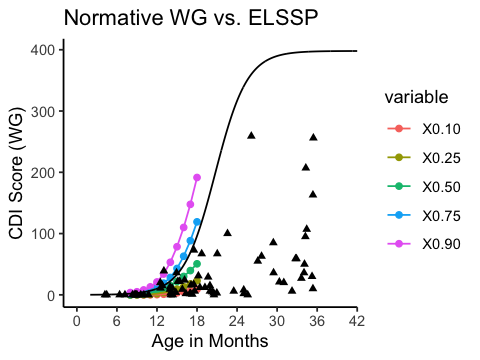

In [7]:
source('CDI_ELSSP.R')
plot_elssp_df(elssp_datasets[[1]])

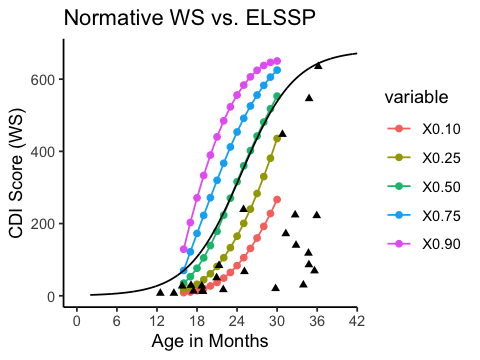

In [8]:
plot_elssp_df(elssp_datasets[[2]])

# Categorical Contrasts

In [9]:
wilcox.test(diff_age_from_expected ~ Gender, data=wg_elssp)


	Wilcoxon rank sum test

data:  diff_age_from_expected by Gender
W = 394, p-value = 0.8925
alternative hypothesis: true location shift is not equal to 0


[1] female male  
Levels: female male
  Gender     mean    median         lb       ub  n
1 female 147.2386 133.59302   6.942917 287.5343 30
2   male 130.7571  71.34941 -10.762186 272.2764 43


Coordinate system already present. Adding new coordinate system, which will replace the existing one.


  Gender mean   median  lb  ub  n
1 female  Inf 11.37257 NaN NaN 30
2   male  Inf 13.36373 NaN NaN 43


Coordinate system already present. Adding new coordinate system, which will replace the existing one.
Warning message:
“Removed 16 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 16 rows containing non-finite values (stat_boxplot).”

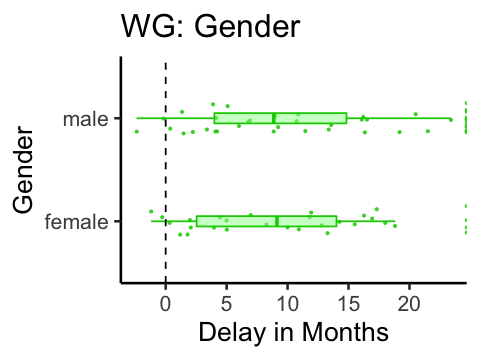

In [30]:
source('CDI_ELSSP.R')
wg_gender <- plot_elssp_df(elssp_datasets[[1]], 'Gender')
print(wg_gender)

In [13]:
wilcox.test(diff_age_from_expected ~ Gender, data=ws_elssp)


	Wilcoxon rank sum test

data:  diff_age_from_expected by Gender
W = 20, p-value = 0.0009688
alternative hypothesis: true location shift is not equal to 0


[1] female male  
Levels: female male
  Gender     mean   median        lb       ub  n
1 female 143.2012 113.7445  14.51491 271.8875 13
2   male 348.6369 440.7172 134.80096 562.4729 12


Coordinate system already present. Adding new coordinate system, which will replace the existing one.


  Gender      mean    median       lb        ub  n
1 female  6.333472  4.881624 2.861809  9.805135 13
2   male 13.664443 13.866109 8.340065 18.988822 12


Coordinate system already present. Adding new coordinate system, which will replace the existing one.


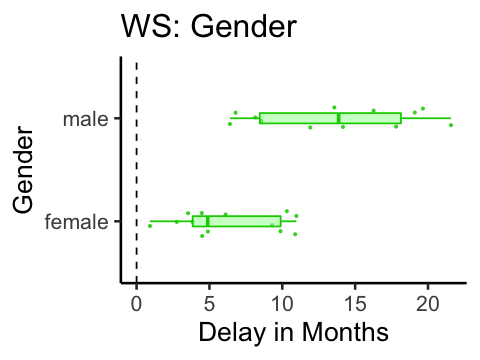

In [32]:
source('CDI_ELSSP.R')
ws_gender <- plot_elssp_df(elssp_datasets[[2]], 'Gender')
print(ws_gender)

Warning message:
“Removed 16 rows containing non-finite values (stat_boxplot).”

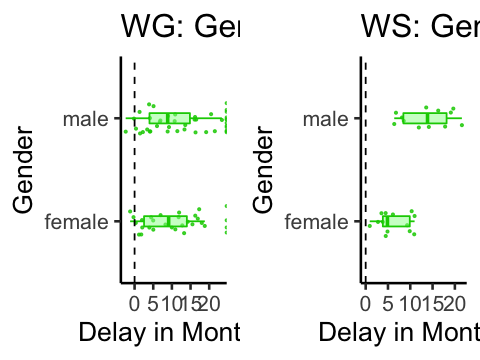

In [35]:
library(gridExtra)
grid.arrange(wg_gender, ws_gender, nrow=1)

In [66]:
summary(wg_elssp$Laterality)
wilcox.test(diff_age_from_expected ~ Laterality, data=(wg_elssp %>% filter(
    Laterality=="Bilateral"|Laterality=="Unilateral") ))

Bilateral Unilateral 
         2         55         16


	Wilcoxon rank sum test

data:  diff_age_from_expected by Laterality
W = 328, p-value = 0.3559
alternative hypothesis: true location shift is not equal to 0


[1] Bilateral  Unilateral
Levels: Bilateral Unilateral
  Laterality     mean   median        lb       ub  n
1  Bilateral 128.6204  67.8354 -9.472007 266.7128 55
2 Unilateral 140.8850 102.8771  1.328566 280.4414 16
  Laterality mean    median  lb  ub  n
1  Bilateral  Inf 11.457776 NaN NaN 55
2 Unilateral  Inf  5.971133 NaN NaN 16


Coordinate system already present. Adding new coordinate system, which will replace the existing one.


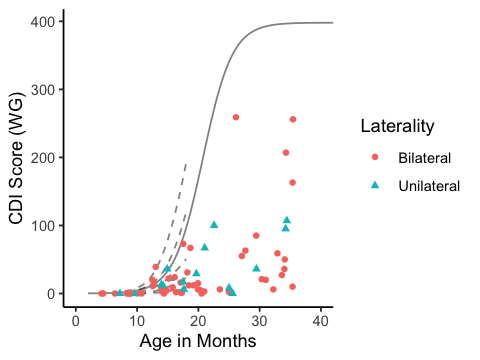

Warning message:
“Removed 15 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 15 rows containing non-finite values (stat_boxplot).”

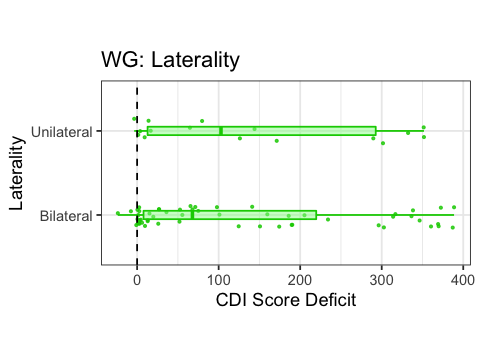

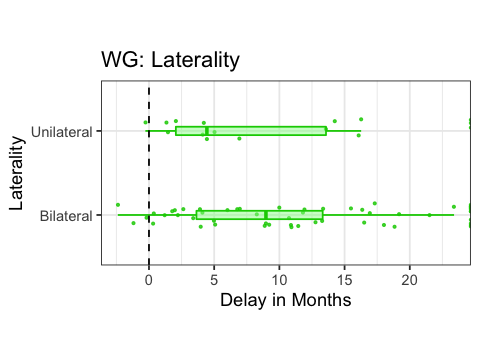

In [18]:
source('CDI_ELSSP.R')
plot_elssp_df(elssp_datasets[[1]], 'Laterality')

In [67]:
summary(ws_elssp$Laterality)
wilcox.test(diff_age_from_expected ~ Laterality, data=ws_elssp%>%filter(Laterality=="Bilateral"|Laterality=="Unilateral"))

Bilateral Unilateral 
         0         16          9


	Wilcoxon rank sum test

data:  diff_age_from_expected by Laterality
W = 89, p-value = 0.3574
alternative hypothesis: true location shift is not equal to 0


[1] Bilateral  Unilateral
Levels: Bilateral Unilateral
  Laterality     mean   median       lb       ub  n
1  Bilateral 277.6957 206.1191 49.55734 505.8340 16
2 Unilateral 178.0142 118.1186 51.95976 304.0687  9
  Laterality      mean   median       lb       ub  n
1  Bilateral 11.055285 9.589756 4.539105 17.57147 16
2 Unilateral  7.713766 6.799810 4.348469 11.07906  9


Coordinate system already present. Adding new coordinate system, which will replace the existing one.


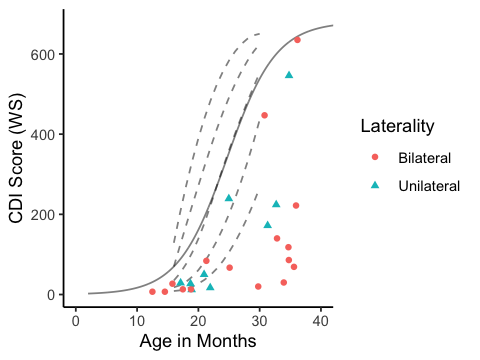

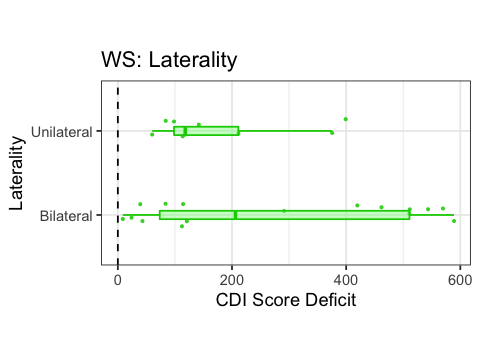

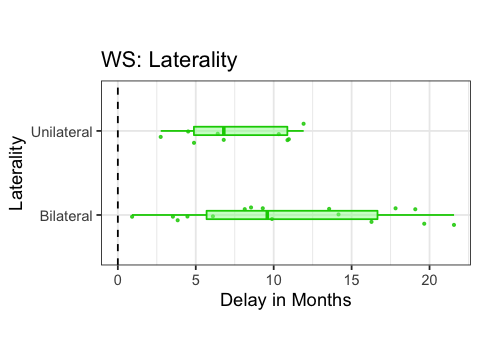

In [23]:
source('CDI_ELSSP.R')
plot_elssp_df(elssp_datasets[[2]], 'Laterality')

In [55]:
kruskal.test(diff_age_from_expected ~ Amplification, data = wg_elssp)


	Kruskal-Wallis rank sum test

data:  diff_age_from_expected by Amplification
Kruskal-Wallis chi-squared = 8.4166, df = 3, p-value = 0.03814


[1] HA   none CI  
Levels: CI HA none
  Amplification     mean    median        lb       ub  n
1            CI 129.8959  68.40782  4.026145 255.7656 22
2            HA 129.8822  71.41739 -7.945317 267.7098 50
3          none 226.6841 301.57164 70.349161 383.0190 19
  Amplification mean    median  lb  ub  n
1            CI  Inf  7.117589 NaN NaN 22
2            HA  Inf 11.350484 NaN NaN 50
3          none  Inf 16.348805 NaN NaN 19


Coordinate system already present. Adding new coordinate system, which will replace the existing one.


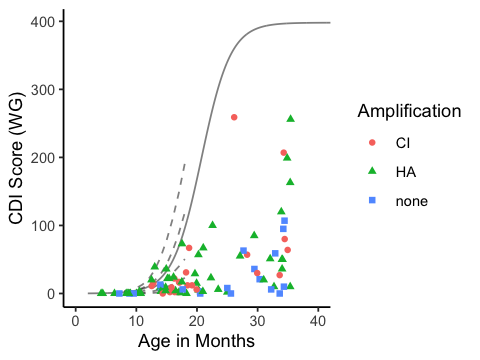

Warning message:
“Removed 17 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 17 rows containing non-finite values (stat_boxplot).”

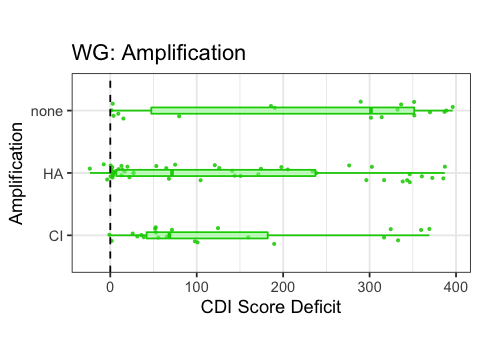

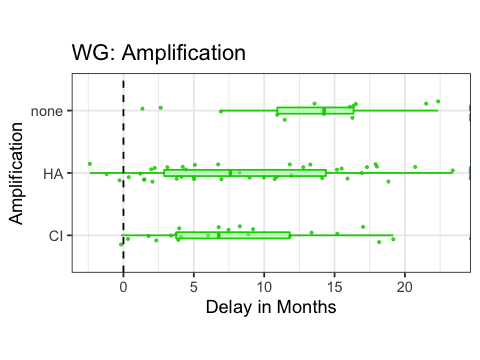

In [52]:
source('CDI_ELSSP.R')
plot_elssp_df(elssp_datasets[[1]], 'Amplification')

In [56]:
kruskal.test(diff_age_from_expected ~ Amplification, data = ws_elssp)


	Kruskal-Wallis rank sum test

data:  diff_age_from_expected by Amplification
Kruskal-Wallis chi-squared = 5.8022, df = 2, p-value = 0.05496


[1] HA   none CI  
Levels: CI HA none
  Amplification     mean   median         lb       ub  n
1            CI 566.2112 566.2112 534.074551 598.3479  2
2            HA 193.9900 114.1267   1.668411 386.3116 14
3          none 244.1085 211.1833  70.668276 417.5486  9
  Amplification      mean    median        lb       ub  n
1            CI 19.699397 19.699397 17.049490 22.34930  2
2            HA  8.135963  6.602039  2.661477 13.61045 14
3          none 10.334020 10.315271  5.890863 14.77718  9


Coordinate system already present. Adding new coordinate system, which will replace the existing one.


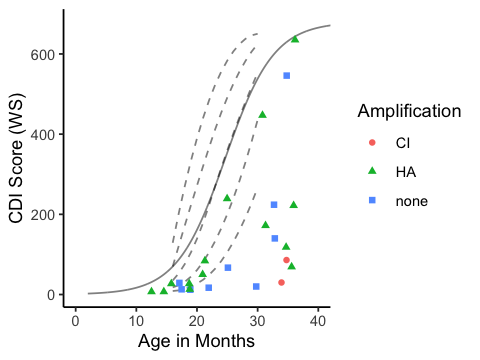

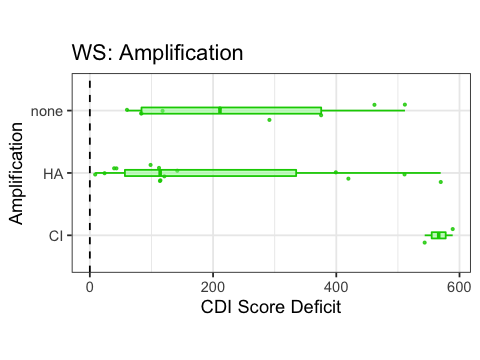

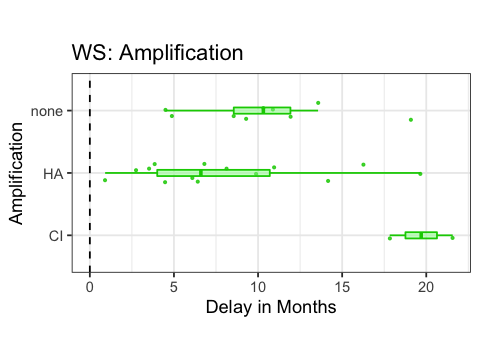

In [25]:
source('CDI_ELSSP.R')
plot_elssp_df(elssp_datasets[[2]], 'Amplification')

In [58]:
wilcox.test(diff_age_from_expected ~ HealthIssues, data=wg_elssp)


	Wilcoxon rank sum test

data:  diff_age_from_expected by HealthIssues
W = 252, p-value = 0.02525
alternative hypothesis: true location shift is not equal to 0


[1] 1 0
Levels: 0 1
  HealthIssues     mean   median        lb       ub  n
1            0 101.2026  53.2502 -19.42241 221.8275 41
2            1 185.1922 185.9083  36.48483 333.8996 41
  HealthIssues mean    median  lb  ub  n
1            0  Inf  6.765846 NaN NaN 41
2            1  Inf 15.200567 NaN NaN 41


Coordinate system already present. Adding new coordinate system, which will replace the existing one.


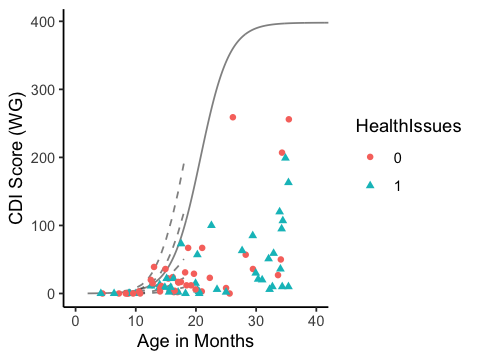

Warning message:
“Removed 15 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 15 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 15 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 15 rows containing non-finite values (stat_boxplot).”

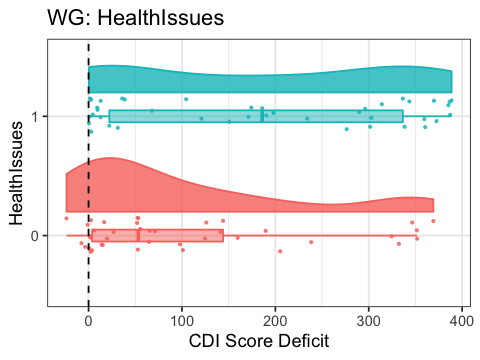

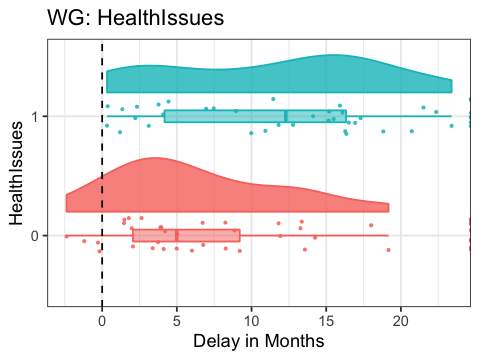

In [13]:
plot_elssp_df(elssp_datasets[[1]], 'HealthIssues')

In [60]:
wilcox.test(diff_age_from_expected ~ HealthIssues, data=ws_elssp)


	Wilcoxon rank sum test

data:  diff_age_from_expected by HealthIssues
W = 53, p-value = 0.8284
alternative hypothesis: true location shift is not equal to 0


In [62]:
wilcox.test(diff_age_from_expected ~ DevelopmentalConcerns, data=wg_elssp)


	Wilcoxon rank sum test

data:  diff_age_from_expected by DevelopmentalConcerns
W = 81, p-value = 0.0003076
alternative hypothesis: true location shift is not equal to 0


[1] no  yes
Levels: no yes
  DevelopmentalConcerns     mean    median        lb       ub  n
1                    no 116.1482  60.10464 -11.08952 243.3858 68
2                   yes 250.4671 313.99623 107.51927 393.4150 23
  DevelopmentalConcerns mean    median  lb  ub  n
1                    no  Inf  8.569333 NaN NaN 68
2                   yes  Inf 16.936000 NaN NaN 23


Coordinate system already present. Adding new coordinate system, which will replace the existing one.


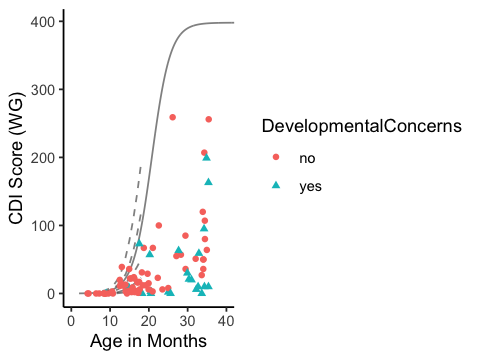

Warning message:
“Removed 17 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 17 rows containing non-finite values (stat_boxplot).”

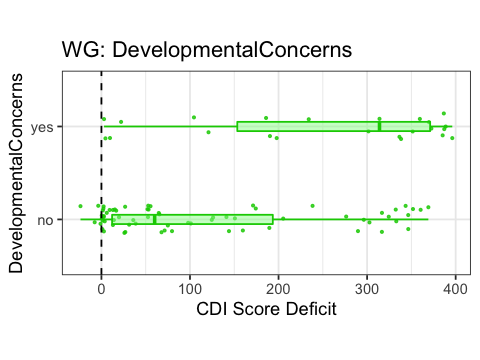

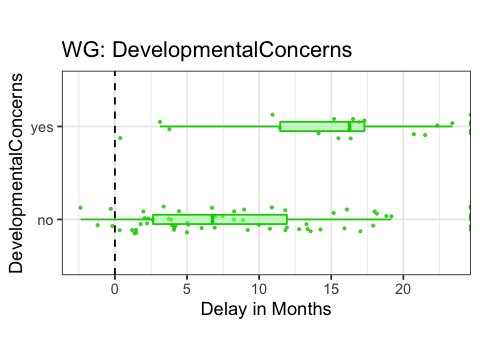

In [61]:
source('CDI_ELSSP.R')
plot_elssp_df(elssp_datasets[[1]], 'DevelopmentalConcerns')

In [63]:
wilcox.test(diff_age_from_expected ~ DevelopmentalConcerns, data=ws_elssp)


	Wilcoxon rank sum test

data:  diff_age_from_expected by DevelopmentalConcerns
W = 19, p-value = 0.48
alternative hypothesis: true location shift is not equal to 0


[1] 0 1
Levels: 0 1
  DevelopmentalConcerns     mean   median        lb       ub  n
1                     0 208.2201 177.2549  28.37994 388.0603 52
2                     1 401.3115 464.3456 184.08037 618.5427  6
  DevelopmentalConcerns      mean    median       lb       ub  n
1                     0  7.785689  7.323032 1.302704 14.26868 52
2                     1 12.830448 13.919844 5.330842 20.33005  6


Coordinate system already present. Adding new coordinate system, which will replace the existing one.
Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

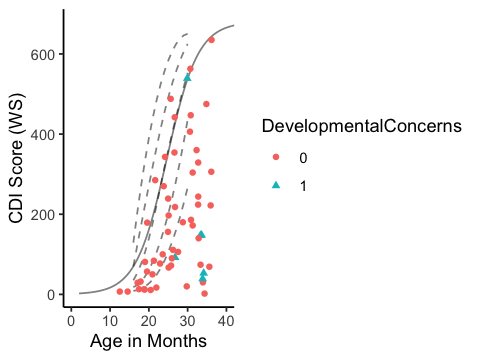

Warning message:
“Removed 1 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

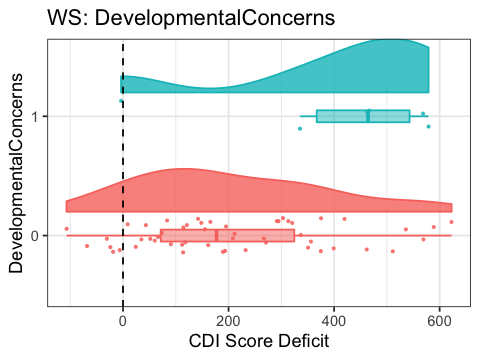

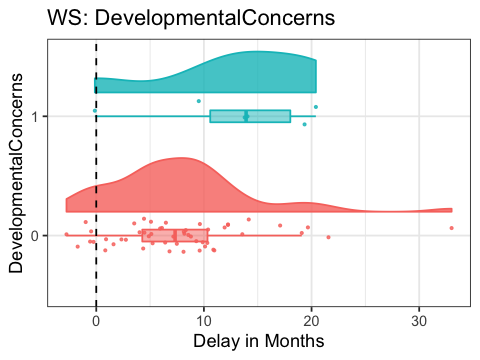

In [15]:
source('CDI_ELSSP.R')
plot_elssp_df(elssp_datasets[[2]], 'DevelopmentalConcerns')

In [87]:
wilcox.test(diff_age_from_expected ~ IsPremature, data=wg_elssp)


	Wilcoxon rank sum test

data:  diff_age_from_expected by IsPremature
W = 114, p-value = 0.02872
alternative hypothesis: true location shift is not equal to 0


[1] 0 1
Levels: 0 1
  IsPremature     mean    median        lb       ub  n
1           0 137.8885  68.40782 -5.373737 281.1507 76
2           1 211.9528 190.28852 82.036911 341.8688 15
  IsPremature mean   median  lb  ub  n
1           0  Inf 10.36637 NaN NaN 76
2           1  Inf 15.92076 NaN NaN 15


Coordinate system already present. Adding new coordinate system, which will replace the existing one.


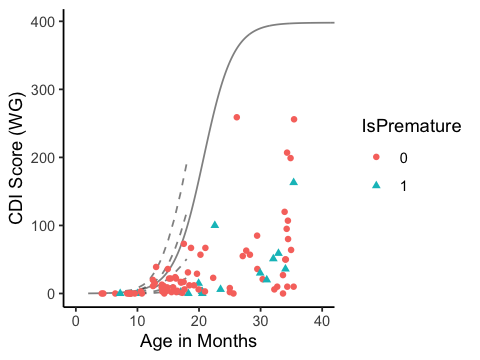

Warning message:
“Removed 17 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 17 rows containing non-finite values (stat_boxplot).”

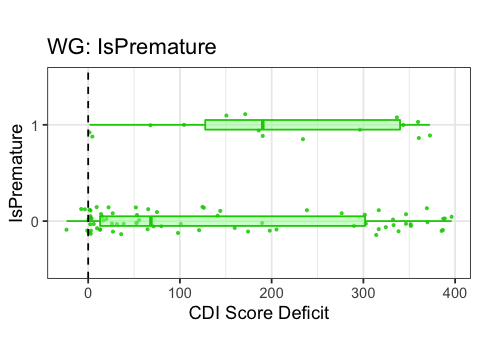

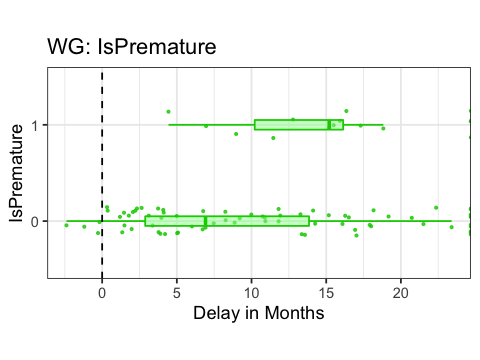

In [91]:
source('CDI_ELSSP.R')
plot_elssp_df(elssp_datasets[[1]], 'IsPremature')

In [89]:
summary(ws_elssp$IsPremature)
wilcox.test(diff_age_from_expected ~ IsPremature, data=ws_elssp)

0  1 
22  3


	Wilcoxon rank sum test

data:  diff_age_from_expected by IsPremature
W = 33, p-value = 1
alternative hypothesis: true location shift is not equal to 0


[1] 0 1
Levels: 0 1
  IsPremature     mean   median        lb       ub  n
1           0 213.7236 177.2549  21.88588 405.5613 58
2           1 337.8237 338.6636 111.22494 564.4226  6
  IsPremature      mean   median       lb       ub  n
1           0  7.725831  6.98340 1.082823 14.36884 58
2           1 13.424756 12.98873 7.496621 19.35289  6


Coordinate system already present. Adding new coordinate system, which will replace the existing one.


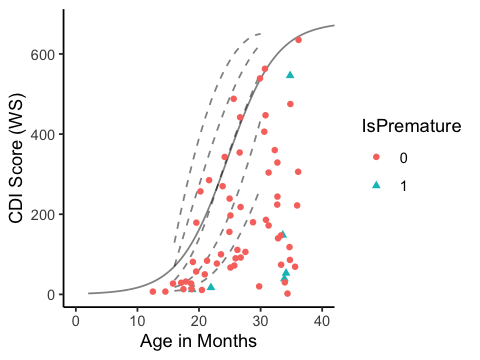

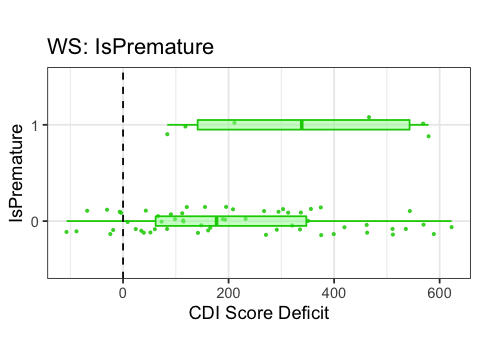

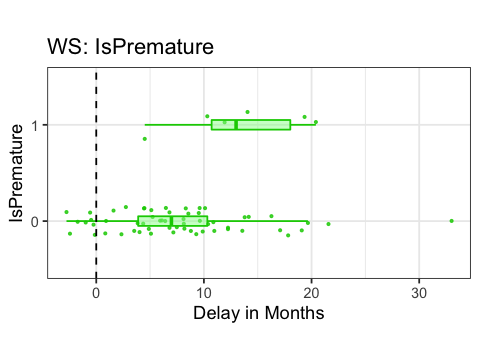

In [90]:
source('CDI_ELSSP.R')
plot_elssp_df(elssp_datasets[[2]], 'IsPremature')

In [71]:
summary(wg_elssp$Meets136)
wilcox.test(diff_age_from_expected ~ Meets136, data=wg_elssp%>%filter(Meets136=="yes"|Meets136=="no"))

no yes 
  5  42  26


	Wilcoxon rank sum test

data:  diff_age_from_expected by Meets136
W = 526, p-value = 0.0002993
alternative hypothesis: true location shift is not equal to 0


[1] no  yes
Levels: no yes
  Meets136      mean    median        lb       ub  n
1       no 182.73504 180.09488  35.16660 330.3035 42
2      yes  55.30914  38.96189 -17.43241 128.0507 26
  Meets136 mean    median  lb  ub  n
1       no  Inf 13.469642 NaN NaN 42
2      yes  Inf  5.516848 NaN NaN 26


Coordinate system already present. Adding new coordinate system, which will replace the existing one.


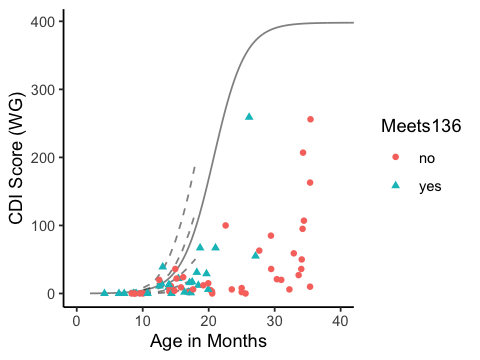

Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”

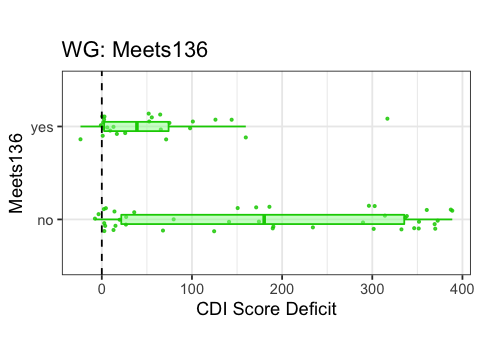

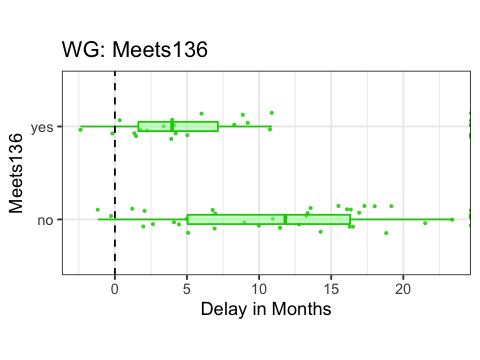

In [26]:
source('CDI_ELSSP.R')
plot_elssp_df(elssp_datasets[[1]], 'Meets136')

In [72]:
summary(ws_elssp$Meets136)
wilcox.test(diff_age_from_expected ~ Meets136, data=ws_elssp%>%filter(Meets136=="yes"|Meets136=="no"))

no yes 
  0  17   8


	Wilcoxon rank sum test

data:  diff_age_from_expected by Meets136
W = 57, p-value = 0.5486
alternative hypothesis: true location shift is not equal to 0


[1] no  yes
Levels: no yes
  Meets136     mean   median       lb       ub  n
1       no 239.0580 120.8407 40.07668 438.0393 17
2      yes 247.6592 130.0428 30.15430 465.1641  8
  Meets136      mean    median       lb       ub  n
1       no  9.428397  8.555687 3.543371 15.31342 17
2      yes 10.753214 10.102145 5.044309 16.46212  8


Coordinate system already present. Adding new coordinate system, which will replace the existing one.


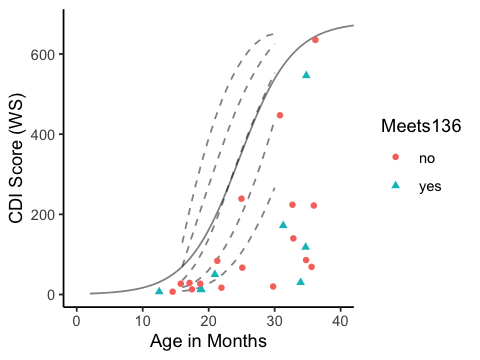

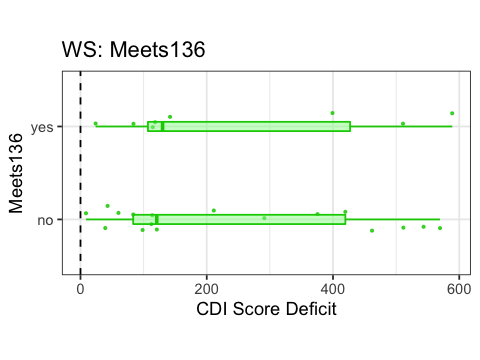

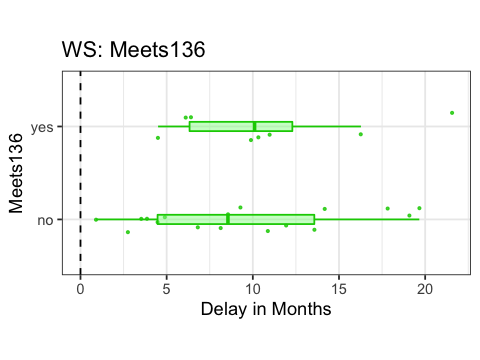

In [27]:
source('CDI_ELSSP.R')
plot_elssp_df(elssp_datasets[[2]], 'Meets136')

In [76]:
summary(wg_elssp$Communication)
wilcox.test(diff_age_from_expected ~ Communication, data=wg_elssp%>%
            filter(Communication=="spoken"|Communication=="total communication"))

cued speech              spoken total communication 
                  2                   1                  56                  14


	Wilcoxon rank sum test

data:  diff_age_from_expected by Communication
W = 186, p-value = 0.2467
alternative hypothesis: true location shift is not equal to 0


[1] spoken              total communication cued speech        
Levels: cued speech spoken total communication
        Communication      mean    median        lb      ub  n
1         cued speech  55.45093  55.45093        NA      NA  1
2              spoken 113.72260  66.65081 -12.19880 239.644 56
3 total communication 207.45461 253.52703  43.97822 370.931 14
        Communication     mean    median  lb  ub  n
1         cued speech 3.963937  3.963937  NA  NA  1
2              spoken      Inf 10.436530 NaN NaN 56
3 total communication      Inf 14.962178 NaN NaN 14


Coordinate system already present. Adding new coordinate system, which will replace the existing one.


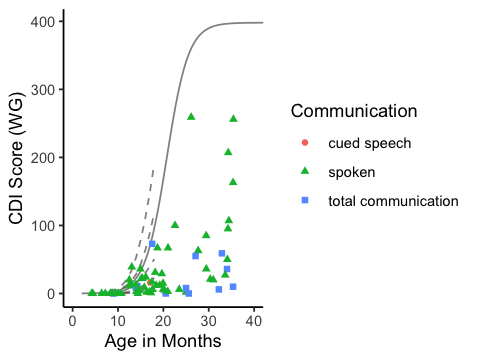

Warning message:
“Removed 15 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 15 rows containing non-finite values (stat_boxplot).”

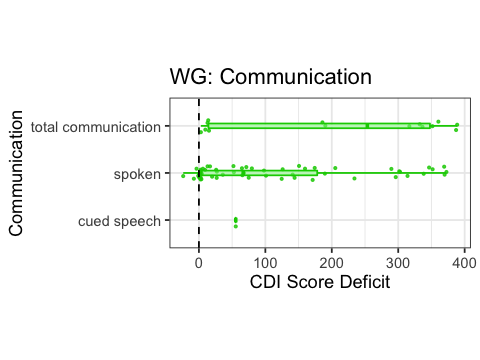

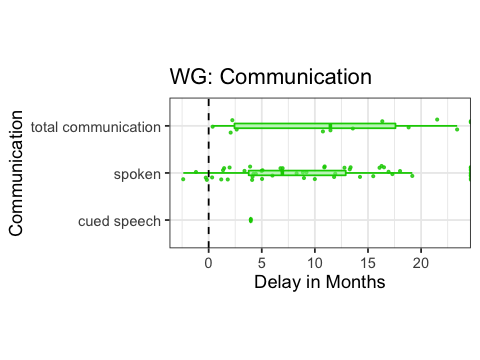

In [21]:
source('CDI_ELSSP.R')
plot_elssp_df(elssp_datasets[[1]], 'Communication')

In [75]:
summary(ws_elssp$Communication)
wilcox.test(diff_age_from_expected ~ Communication, data=ws_elssp%>%
            filter(Communication=="spoken"|Communication=="total communication"))

cued speech              spoken total communication 
                  0                   0                  23                   2


	Wilcoxon rank sum test

data:  diff_age_from_expected by Communication
W = 34, p-value = 0.3267
alternative hypothesis: true location shift is not equal to 0


[1] spoken              total communication
Levels: spoken total communication
        Communication     mean   median       lb       ub  n
1              spoken 245.2225 120.8407 37.86569 452.5793 23
2 total communication 202.5710 202.5710 76.95129 328.1908  2
        Communication      mean   median       lb       ub  n
1              spoken 10.185517 9.889020 4.391599 15.97944 23
2 total communication  6.020784 6.020784 1.396717 10.64485  2


Coordinate system already present. Adding new coordinate system, which will replace the existing one.


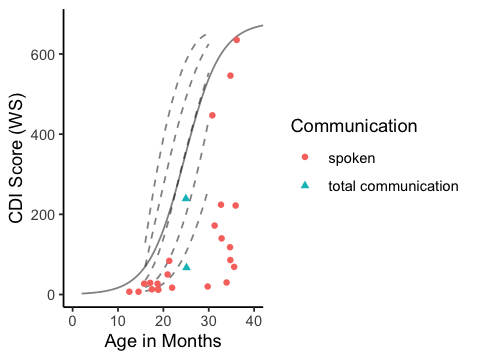

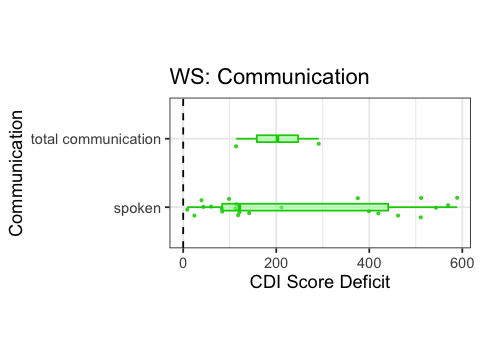

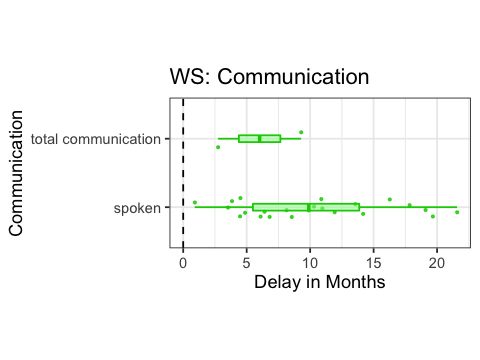

In [22]:
source('CDI_ELSSP.R')
plot_elssp_df(elssp_datasets[[2]], 'Communication')

In [93]:
kruskal.test(diff_age_from_expected ~ Etiology, data=wg_elssp)


	Kruskal-Wallis rank sum test

data:  diff_age_from_expected by Etiology
Kruskal-Wallis chi-squared = 1.2969, df = 3, p-value = 0.7299


[1] conductive Conductive SNHL       Mixed     
Levels: conductive Conductive Mixed SNHL
    Etiology     mean    median        lb       ub  n
1 conductive 346.4293 346.42927        NA       NA  1
2 Conductive 151.3602 126.99121  13.35908 289.3613 14
3      Mixed 101.7060  15.14633 -38.90045 242.3124  7
4       SNHL 161.4921 124.59421  15.33189 307.6523 61
    Etiology     mean    median  lb  ub  n
1 conductive 17.91314 17.913139  NA  NA  1
2 Conductive      Inf 10.436530 NaN NaN 14
3      Mixed      Inf  3.778928 NaN NaN  7
4       SNHL      Inf 12.777575 NaN NaN 61


Coordinate system already present. Adding new coordinate system, which will replace the existing one.


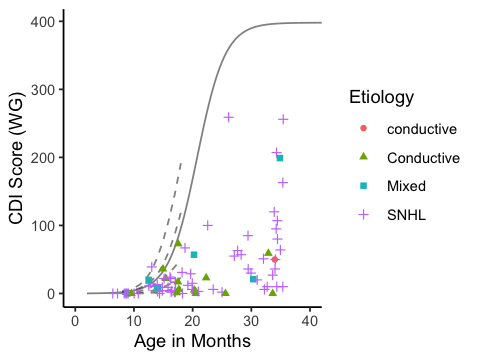

Warning message:
“Removed 15 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 15 rows containing non-finite values (stat_boxplot).”

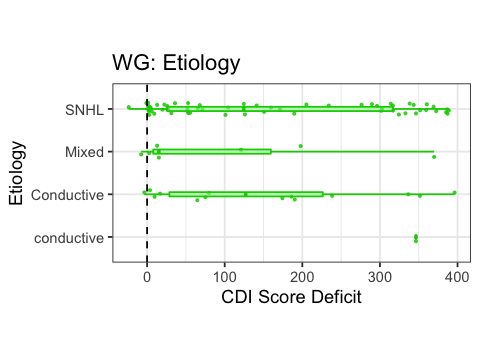

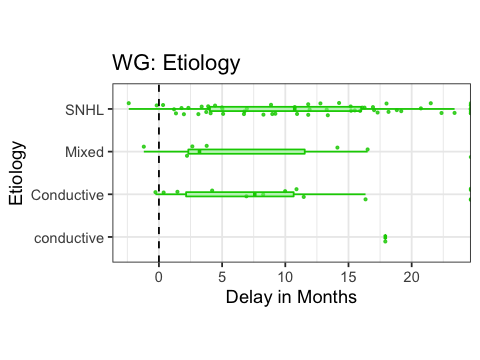

In [95]:
source('CDI_ELSSP.R')
plot_elssp_df(elssp_datasets[[1]], 'Etiology')

In [94]:
kruskal.test(diff_age_from_expected ~ IsPremature, data=wg_elssp)


	Kruskal-Wallis rank sum test

data:  diff_age_from_expected by IsPremature
Kruskal-Wallis chi-squared = 3.0883, df = 1, p-value = 0.07886


[1] SNHL       Conductive Mixed     
Levels: Conductive Mixed SNHL
    Etiology     mean   median        lb       ub  n
1 Conductive 247.6495 141.9670 25.350675 469.9483 11
2      Mixed 311.3348 335.2362 98.926727 523.7429  7
3       SNHL 177.0395 151.7752 -3.243756 357.3227 38
    Etiology      mean    median        lb       ub  n
1 Conductive  9.048834  9.889020 2.1825108 15.91516 11
2      Mixed 12.170147 12.237904 6.0692089 18.27108  7
3       SNHL  6.398564  5.668808 0.7564587 12.04067 38


Coordinate system already present. Adding new coordinate system, which will replace the existing one.


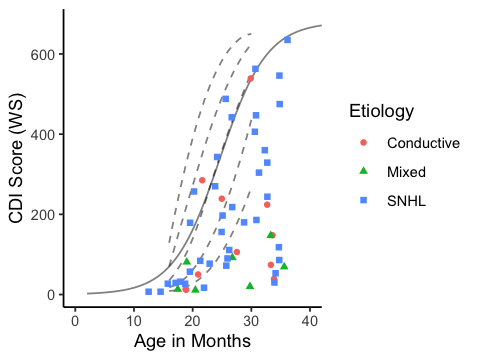

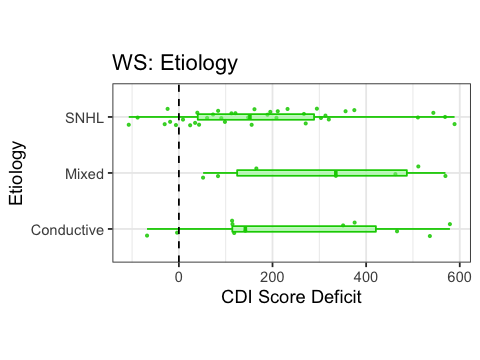

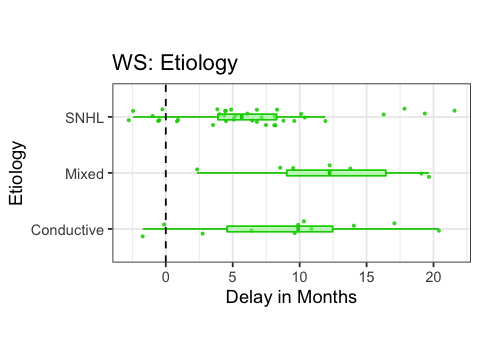

In [96]:
source('CDI_ELSSP.R')
plot_elssp_df(elssp_datasets[[2]], 'Etiology')

In [83]:
cor.test(wg_elssp$HLworse, y=wg_elssp$diff_age_from_expected, method="kendall")
cor.test(ws_elssp$HLworse, y=ws_elssp$diff_age_from_expected, method="kendall")


	Kendall's rank correlation tau

data:  wg_elssp$HLworse and wg_elssp$diff_age_from_expected
z = -0.13745, p-value = 0.8907
alternative hypothesis: true tau is not equal to 0
sample estimates:
        tau 
-0.01226747 


Warning message in cor.test.default(ws_elssp$HLworse, y = ws_elssp$diff_age_from_expected, :
“Cannot compute exact p-value with ties”


	Kendall's rank correlation tau

data:  ws_elssp$HLworse and ws_elssp$diff_age_from_expected
z = 0.14195, p-value = 0.8871
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
0.02464913 


In [92]:
cor.test(wg_elssp$HLbetter, y=wg_elssp$diff_age_from_expected, method="kendall")
cor.test(ws_elssp$HLbetter, y=ws_elssp$diff_age_from_expected, method="kendall")


	Kendall's rank correlation tau

data:  wg_elssp$HLbetter and wg_elssp$diff_age_from_expected
z = 0.1691, p-value = 0.8657
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
0.01494798 


Warning message in cor.test.default(ws_elssp$HLbetter, y = ws_elssp$diff_age_from_expected, :
“Cannot compute exact p-value with ties”


	Kendall's rank correlation tau

data:  ws_elssp$HLbetter and ws_elssp$diff_age_from_expected
z = 1.7118, p-value = 0.08693
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.2597754 


Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

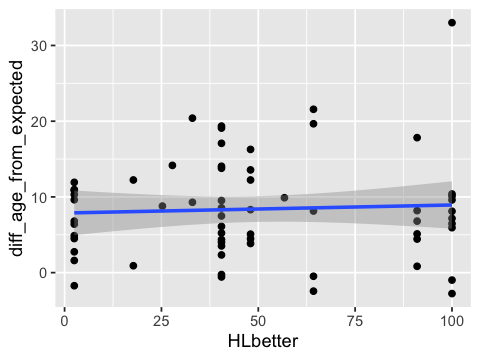

In [84]:
ggplot(data=elssp_datasets[[1]]$elssp_df, aes(x=HLbetter, y=diff_age_from_expected))+
  geom_point() + geom_smooth(method='lm')

Warning message:
“Removed 21 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 4 rows containing missing values (geom_point).”

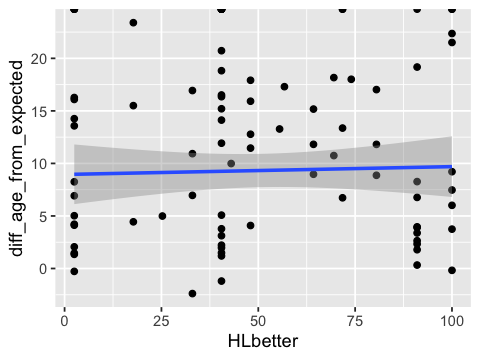

In [85]:
ggplot(data=elssp_datasets[[2]]$elssp_df, aes(x=HLbetter, y=diff_age_from_expected))+
  geom_point() + geom_smooth(method='lm')

In [86]:
cor.test(wg_elssp$ServicesReceivedPerMonth, y=wg_elssp$diff_age_from_expected, method="kendall")
cor.test(ws_elssp$ServicesReceivedPerMonth, y=ws_elssp$diff_age_from_expected, method="kendall")


	Kendall's rank correlation tau

data:  wg_elssp$ServicesReceivedPerMonth and wg_elssp$diff_age_from_expected
z = 2.4429, p-value = 0.01457
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.2083767 


Warning message in cor.test.default(ws_elssp$ServicesReceivedPerMonth, y = ws_elssp$diff_age_from_expected, :
“Cannot compute exact p-value with ties”


	Kendall's rank correlation tau

data:  ws_elssp$ServicesReceivedPerMonth and ws_elssp$diff_age_from_expected
z = 1.3921, p-value = 0.1639
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.2141456 


Warning message:
“Removed 19 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

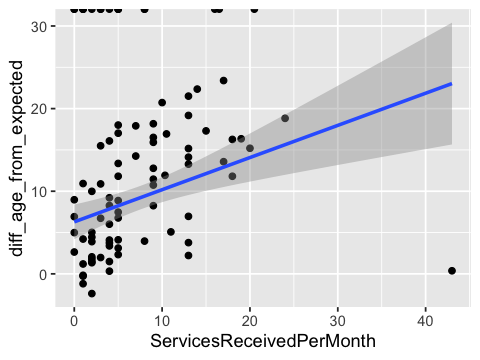

In [81]:
ggplot(data=elssp_datasets[[1]]$elssp_df, aes(x=ServicesReceivedPerMonth, y=diff_age_from_expected))+
  geom_point() + geom_smooth(method='lm')

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

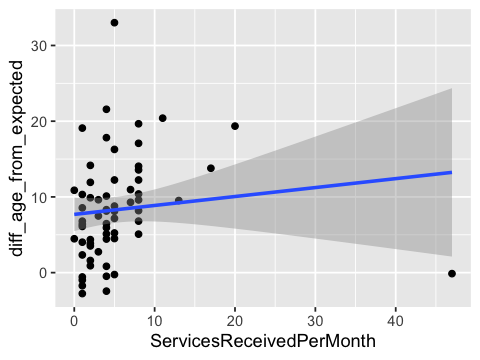

In [82]:
ggplot(data=elssp_datasets[[2]]$elssp_df, aes(x=ServicesReceivedPerMonth, y=diff_age_from_expected))+
  geom_point() + geom_smooth(method='lm')

# Relationships Between Variables


	Pearson's Chi-squared test with Yates' continuity correction

data:  Gender_DevConcerns
X-squared = 1.3479e-30, df = 1, p-value = 1


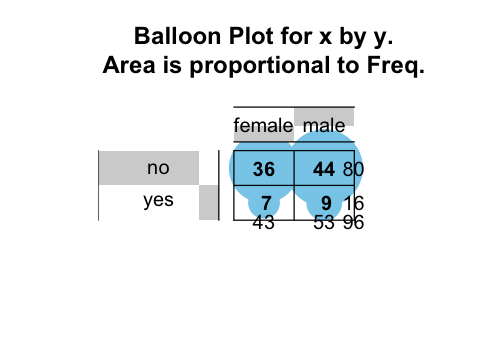

In [116]:
Gender_DevConcerns <- table(full_elssp$Gender, full_elssp$DevelopmentalConcerns)
chisq.test(Gender_DevConcerns)
balloonplot(Gender_DevConcerns)


	Pearson's Chi-squared test with Yates' continuity correction

data:  Gender_HealthIssues
X-squared = 0.66041, df = 1, p-value = 0.4164


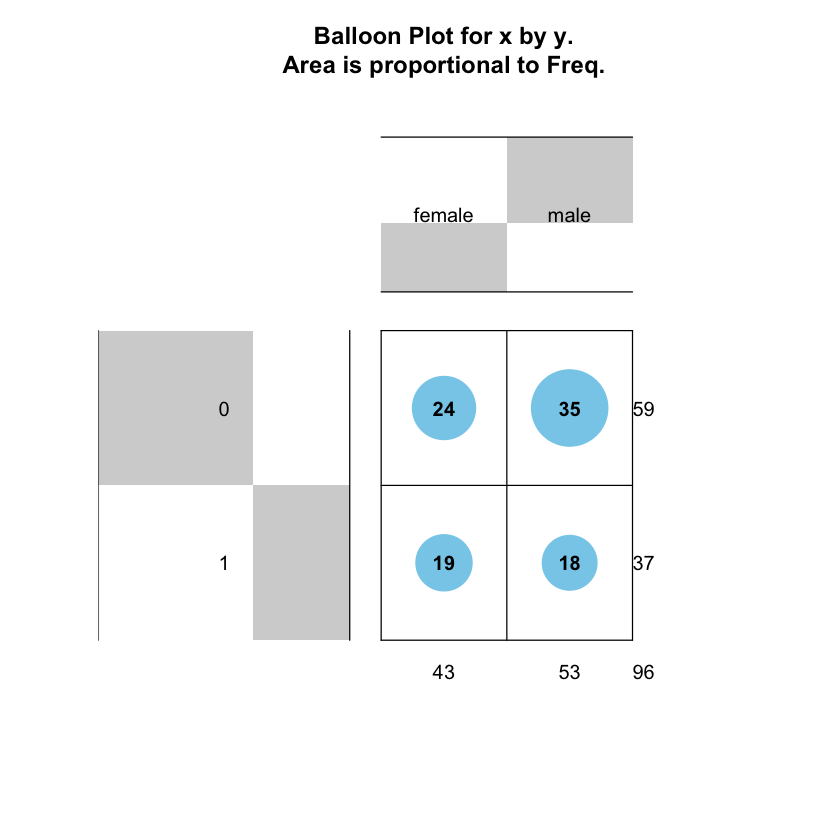

In [10]:
Gender_HealthIssues <- table(full_elssp$Gender, full_elssp$HealthIssues)
chisq.test(Gender_HealthIssues)
balloonplot(Gender_HealthIssues)


	Pearson's Chi-squared test with Yates' continuity correction

data:  Gender_Premature
X-squared = 0.19502, df = 1, p-value = 0.6588


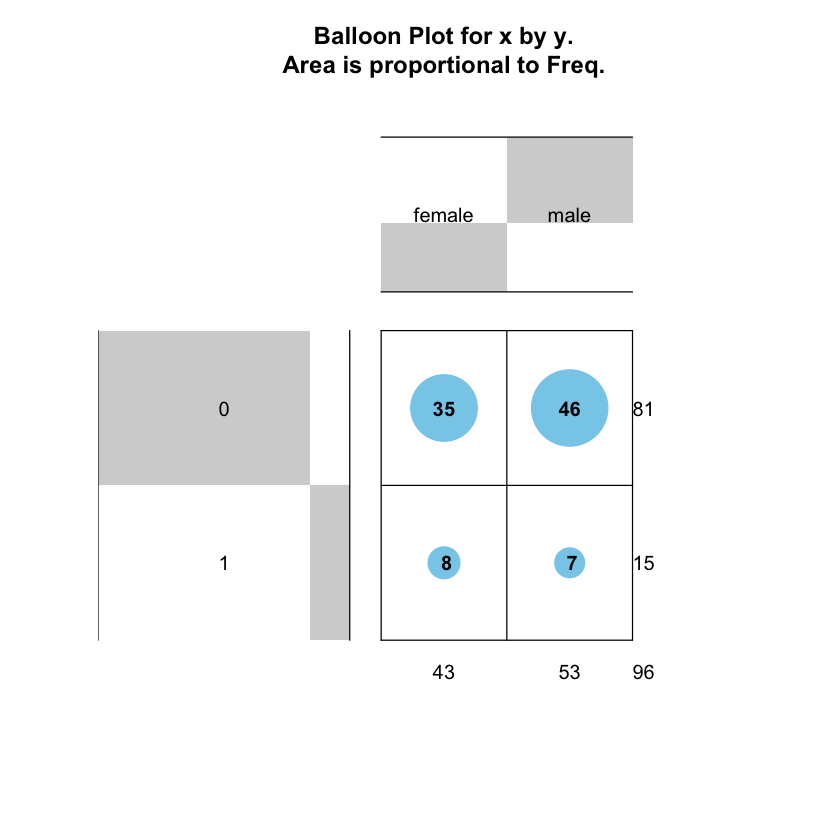

In [15]:
Gender_Premature <- table(full_elssp$Gender, full_elssp$IsPremature)
chisq.test(Gender_Premature)
balloonplot(Gender_Premature)


	Pearson's Chi-squared test with Yates' continuity correction

data:  Gender_Laterality
X-squared = 0.019958, df = 1, p-value = 0.8877


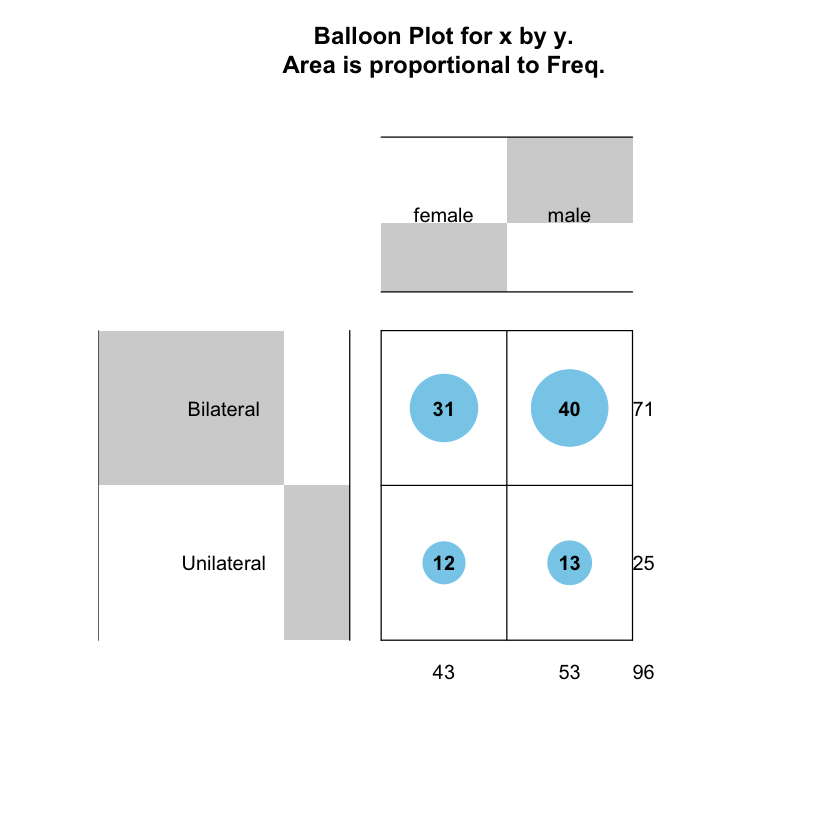

In [29]:
Gender_Laterality <- table(full_elssp$Gender, full_elssp$Laterality)
Gender_Laterality <- Gender_Laterality[, c("Bilateral", "Unilateral")]
chisq.test(Gender_Laterality)
balloonplot(Gender_Laterality)

        
         no yes
  female 28  13
  male   31  21


	Pearson's Chi-squared test with Yates' continuity correction

data:  Gender_Meets136
X-squared = 0.41712, df = 1, p-value = 0.5184


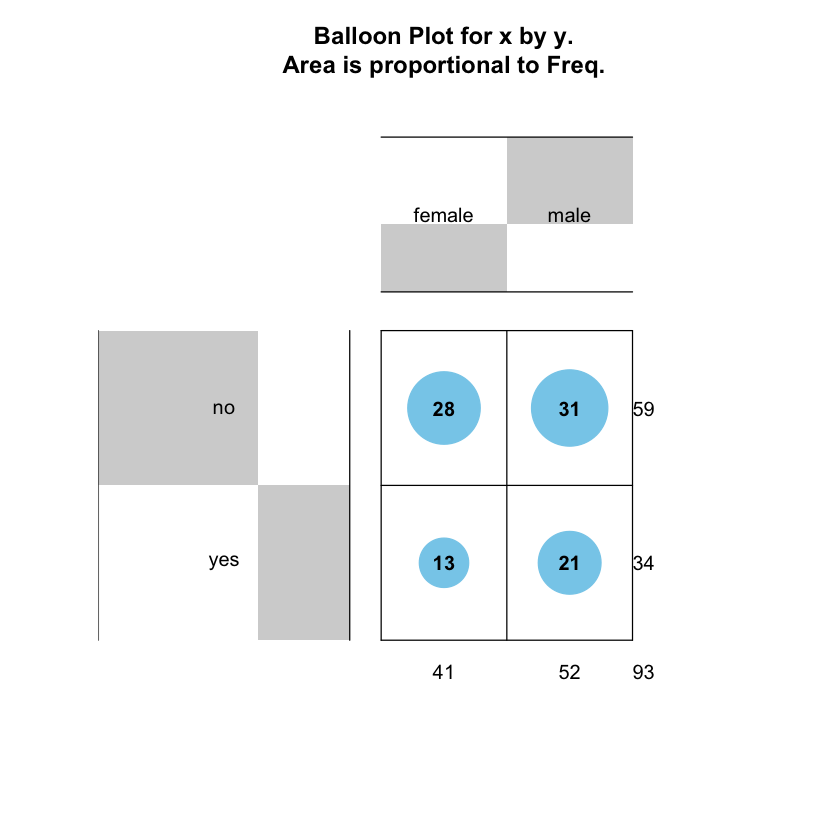

In [46]:
Gender_Meets136 <- table(full_elssp$Gender, full_elssp$Meets136)
Gender_Meets136 <- Gender_Meets136[, -1]
Gender_Meets136
chisq.test(Gender_Meets136)
balloonplot(Gender_Meets136)

        
         CI HA none
  female  4 31    8
  male   13 22   18


	Pearson's Chi-squared test

data:  Gender_Amp
X-squared = 9.1973, df = 2, p-value = 0.01007


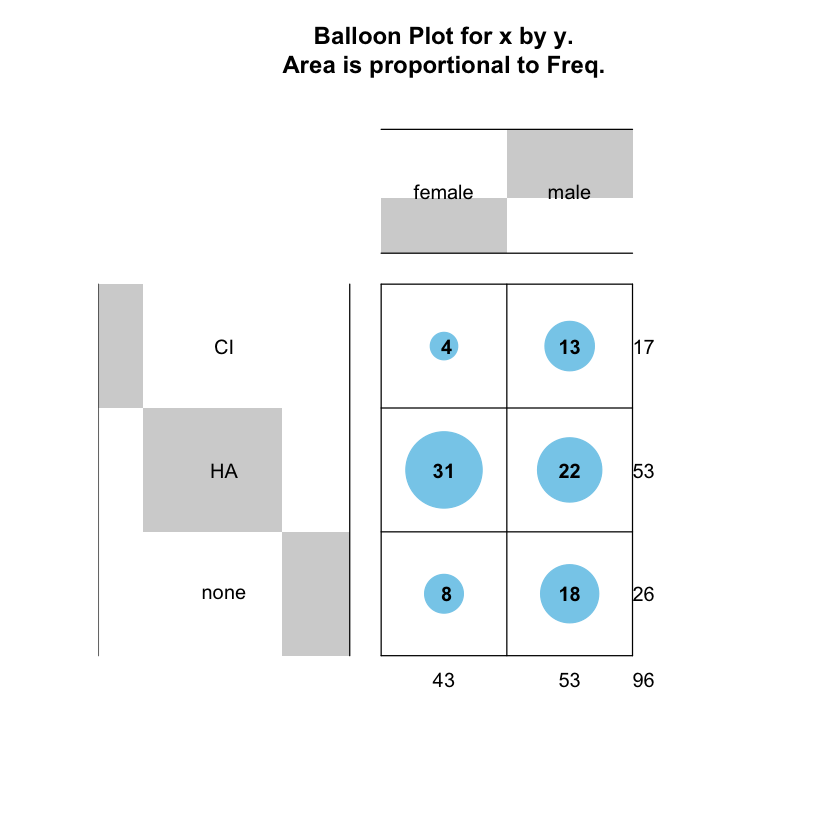

In [49]:
Gender_Amp <- table(full_elssp$Gender, full_elssp$Amplification)
Gender_Amp <- Gender_Amp[, -1]
Gender_Amp
chisq.test(Gender_Amp)
balloonplot(Gender_Amp)

        
         Conductive Mixed SNHL
  female          6     1   31
  male           11     7   30

Warning message in chisq.test(Gender_Etiology):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  Gender_Etiology
X-squared = 4.8903, df = 2, p-value = 0.08671


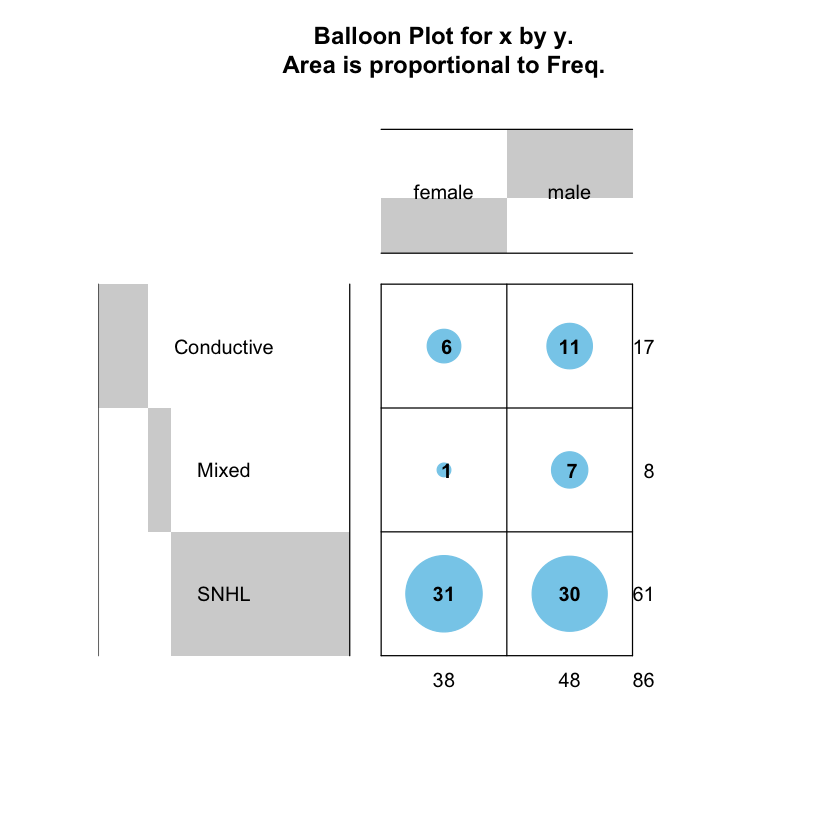

In [51]:
Gender_Etiology <- table(full_elssp$Gender, full_elssp$Etiology)
Gender_Etiology <- Gender_Etiology[, -1]
Gender_Etiology
chisq.test(Gender_Etiology)
balloonplot(Gender_Etiology)

        
         cued speech spoken total communication
  female           1     37                   5
  male             0     42                  11

Warning message in chisq.test(Gender_Communication):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  Gender_Communication
X-squared = 2.5525, df = 2, p-value = 0.2791


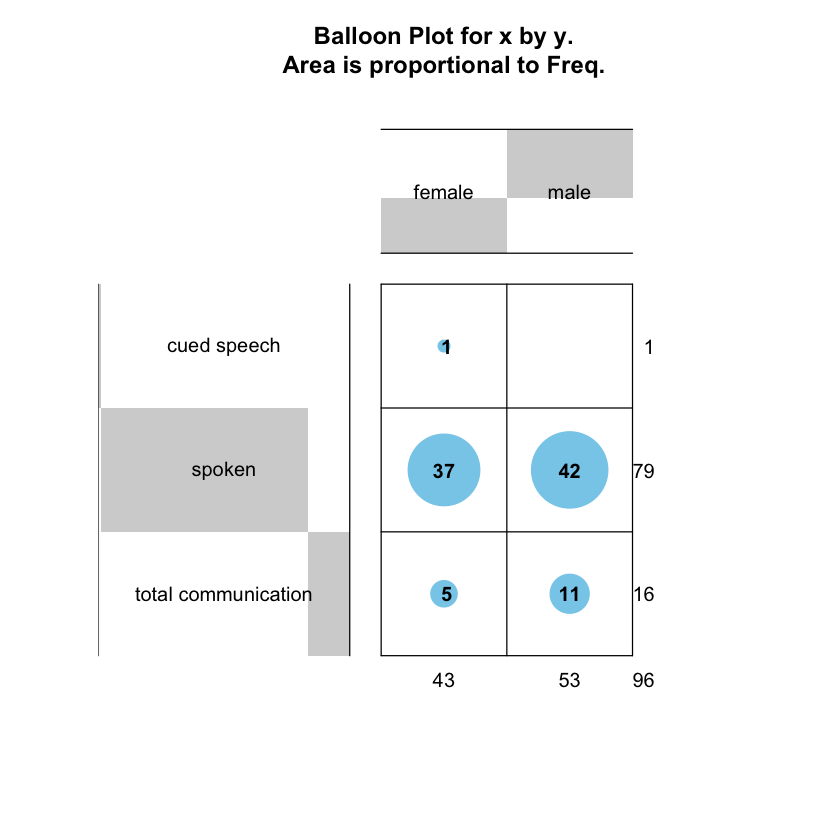

In [56]:
Gender_Communication <- table(full_elssp$Gender, full_elssp$Communication)
Gender_Communication <- Gender_Communication[, -1]
Gender_Communication
chisq.test(Gender_Communication)
balloonplot(Gender_Communication)


	Pearson's Chi-squared test with Yates' continuity correction

data:  HealthIssues_Premature
X-squared = 19.874, df = 1, p-value = 8.273e-06


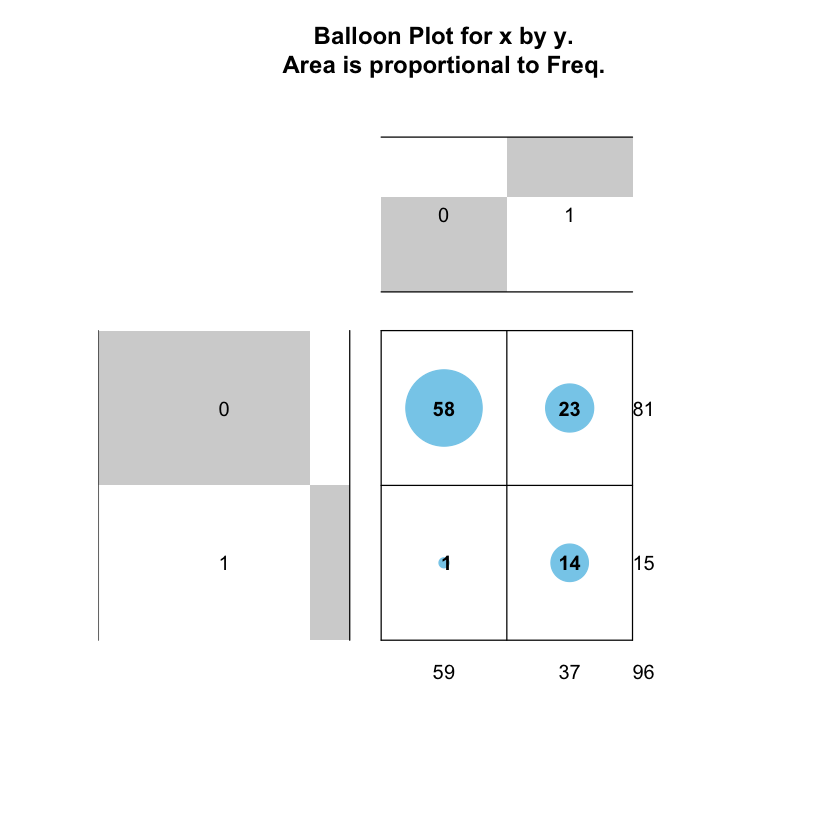

In [57]:
HealthIssues_Premature <- table(full_elssp$HealthIssues, full_elssp$IsPremature)
chisq.test(HealthIssues_Premature)
balloonplot(HealthIssues_Premature)


	Pearson's Chi-squared test with Yates' continuity correction

data:  HealthIssues_Laterality
X-squared = 0.004187, df = 1, p-value = 0.9484


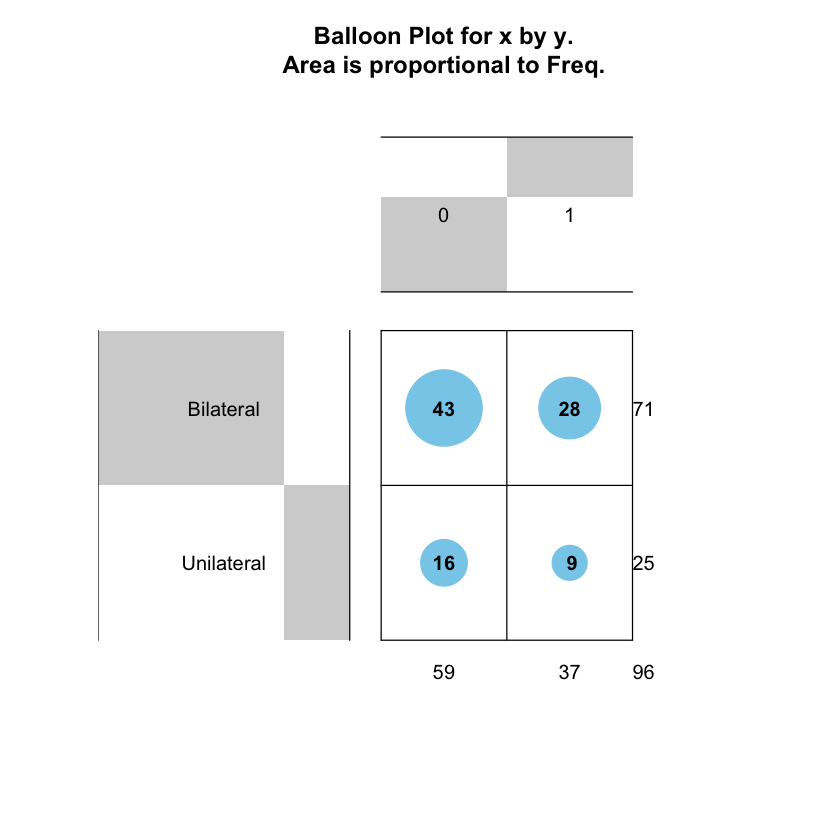

In [59]:
HealthIssues_Laterality <- table(full_elssp$HealthIssues, full_elssp$Laterality)
HealthIssues_Laterality <- HealthIssues_Laterality[, c("Bilateral", "Unilateral")]
chisq.test(HealthIssues_Laterality)
balloonplot(HealthIssues_Laterality)


	Pearson's Chi-squared test with Yates' continuity correction

data:  HealthIssues_Meets136
X-squared = 4.2457, df = 1, p-value = 0.03935


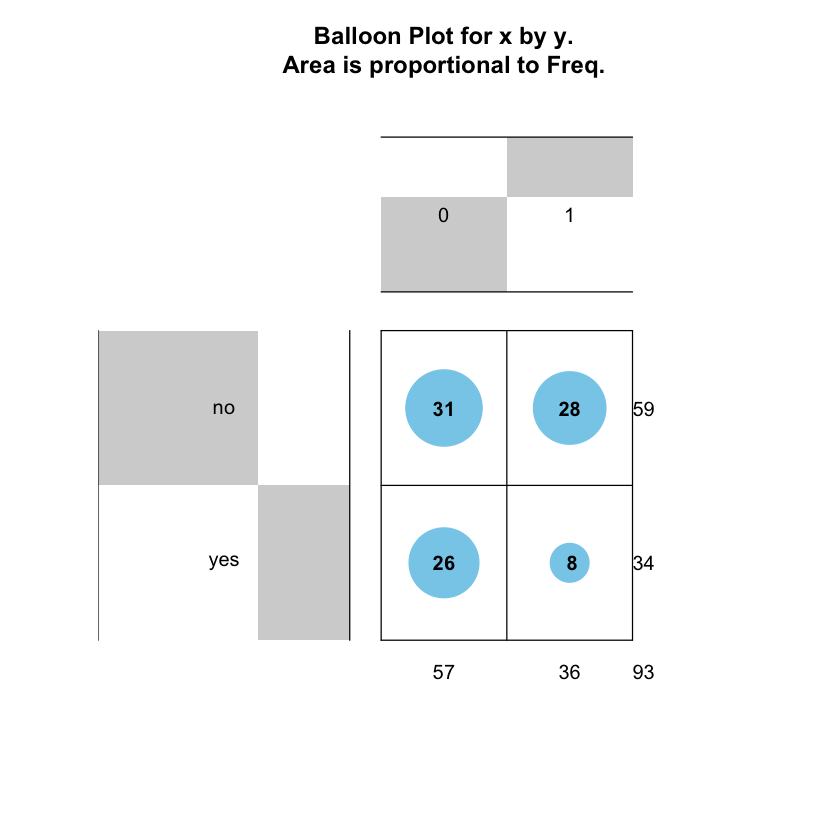

In [60]:
HealthIssues_Meets136 <- table(full_elssp$HealthIssues, full_elssp$Meets136)
HealthIssues_Meets136 <- HealthIssues_Meets136[, -1]
chisq.test(HealthIssues_Meets136)
balloonplot(HealthIssues_Meets136)

Warning message in chisq.test(HealthIssues_DevDelay):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test with Yates' continuity correction

data:  HealthIssues_DevDelay
X-squared = 9.1022, df = 1, p-value = 0.002553


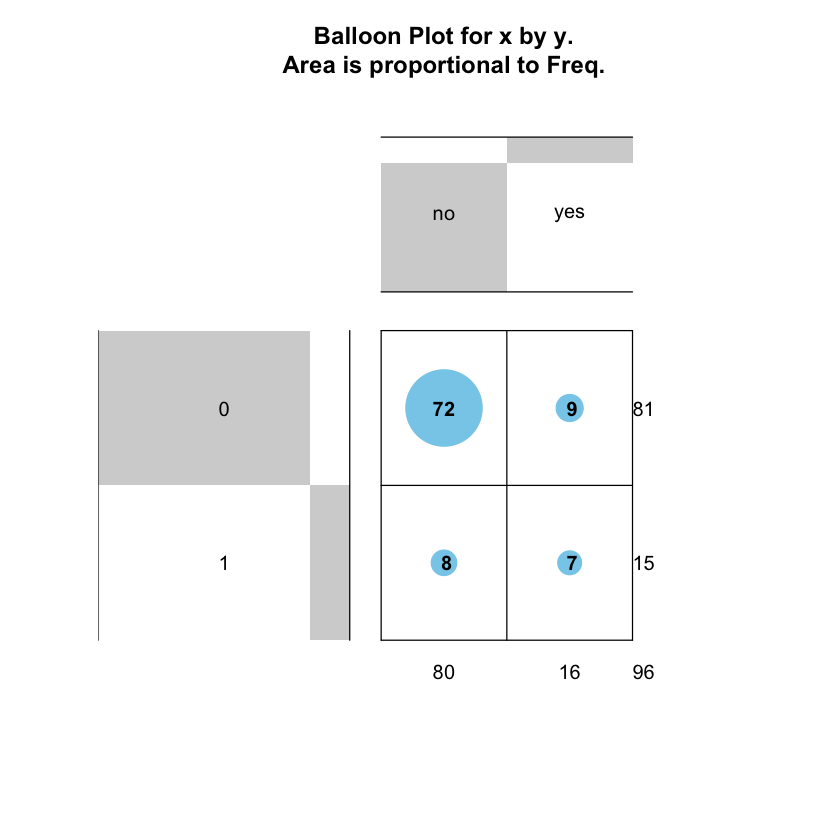

In [58]:
HealthIssues_DevDelay <- table(full_elssp$DevelopmentalConcerns, full_elssp$IsPremature)
chisq.test(HealthIssues_DevDelay)
balloonplot(HealthIssues_DevDelay)


	Pearson's Chi-squared test

data:  HealthIssues_Amplification
X-squared = 13.524, df = 2, p-value = 0.001157


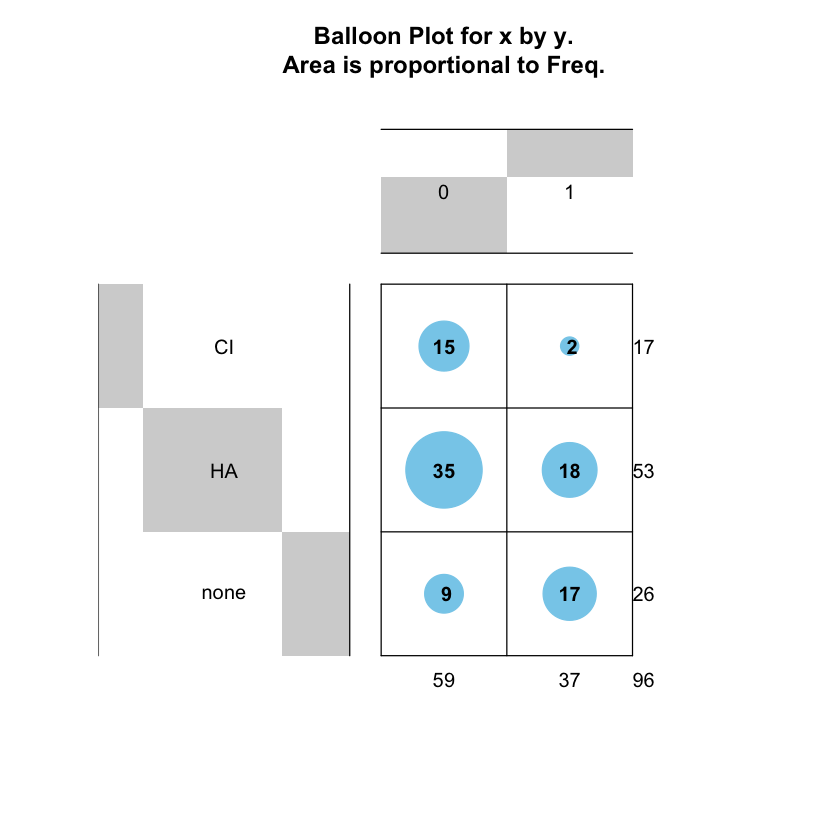

In [62]:
HealthIssues_Amplification <- table(full_elssp$HealthIssues, full_elssp$Amplification)
HealthIssues_Amplification <- HealthIssues_Amplification[, -1]
chisq.test(HealthIssues_Amplification)
balloonplot(HealthIssues_Amplification)

Warning message in chisq.test(HealthIssues_Etiology):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  HealthIssues_Etiology
X-squared = 0.33475, df = 2, p-value = 0.8459


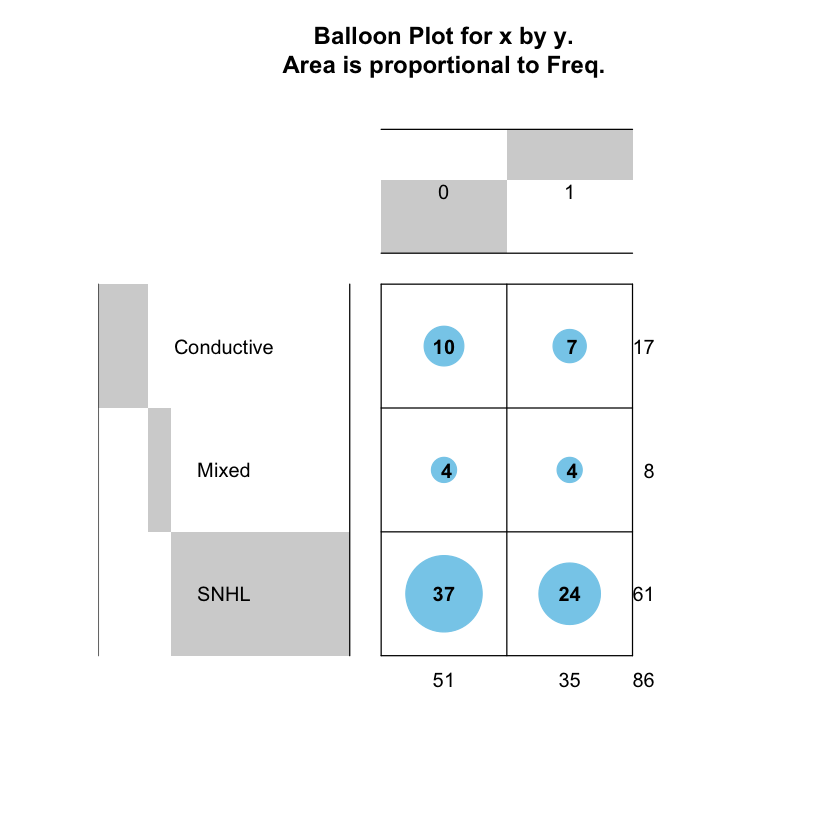

In [61]:
HealthIssues_Etiology <- table(full_elssp$HealthIssues, full_elssp$Etiology)
HealthIssues_Etiology <- HealthIssues_Etiology[, -1]
chisq.test(HealthIssues_Etiology)
balloonplot(HealthIssues_Etiology)


	Pearson's Chi-squared test with Yates' continuity correction

data:  HealthIssues_Communication
X-squared = 3.3765, df = 1, p-value = 0.06613


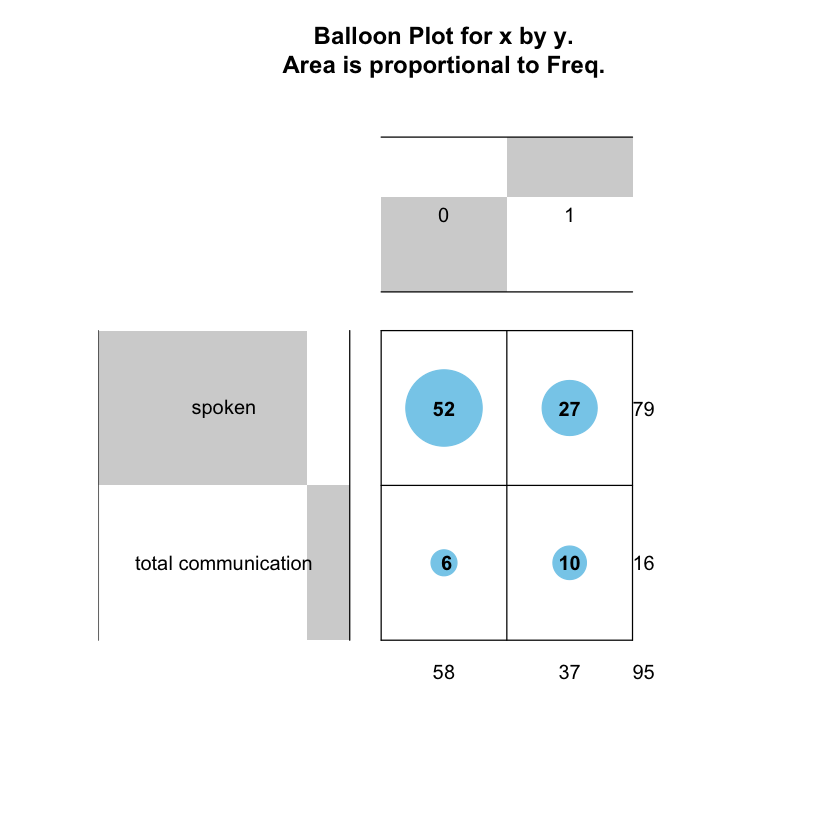

In [65]:
HealthIssues_Communication <- table(full_elssp$HealthIssues, full_elssp$Communication)
HealthIssues_Communication <- HealthIssues_Communication[, -1]
chisq.test(HealthIssues_Communication)
balloonplot(HealthIssues_Communication)

Warning message in chisq.test(Prematurity_Laterality):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test with Yates' continuity correction

data:  Prematurity_Laterality
X-squared = 0.14463, df = 1, p-value = 0.7037


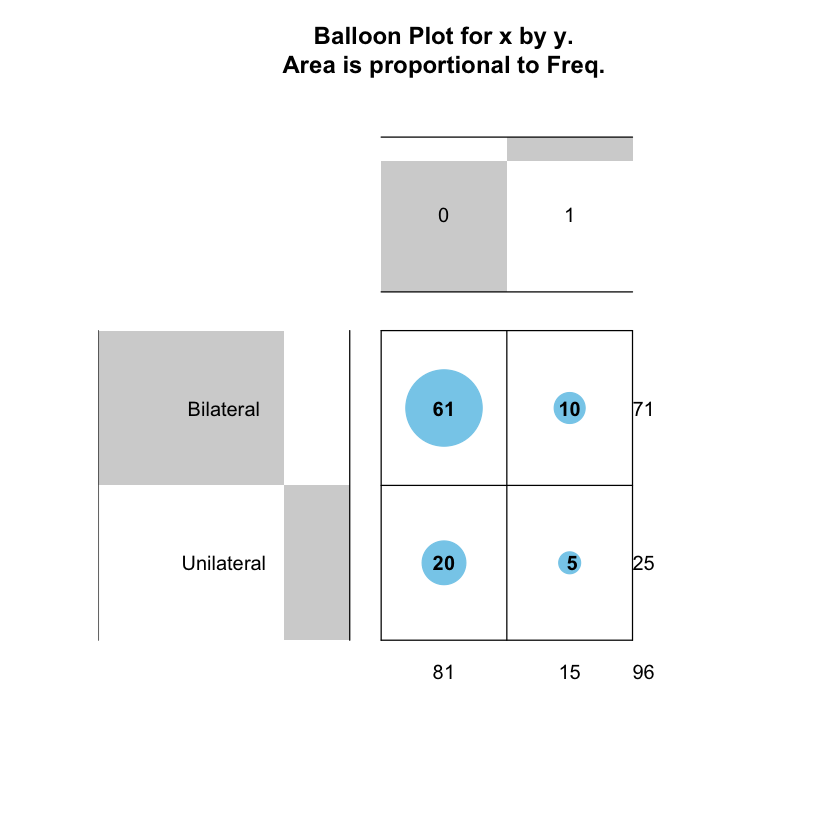

In [66]:
Prematurity_Laterality <- table(full_elssp$IsPremature, full_elssp$Laterality)
Prematurity_Laterality <- Prematurity_Laterality[, c("Bilateral", "Unilateral")]
chisq.test(Prematurity_Laterality)
balloonplot(Prematurity_Laterality)


	Pearson's Chi-squared test with Yates' continuity correction

data:  Prematurity_Meets136
X-squared = 1.3488, df = 1, p-value = 0.2455


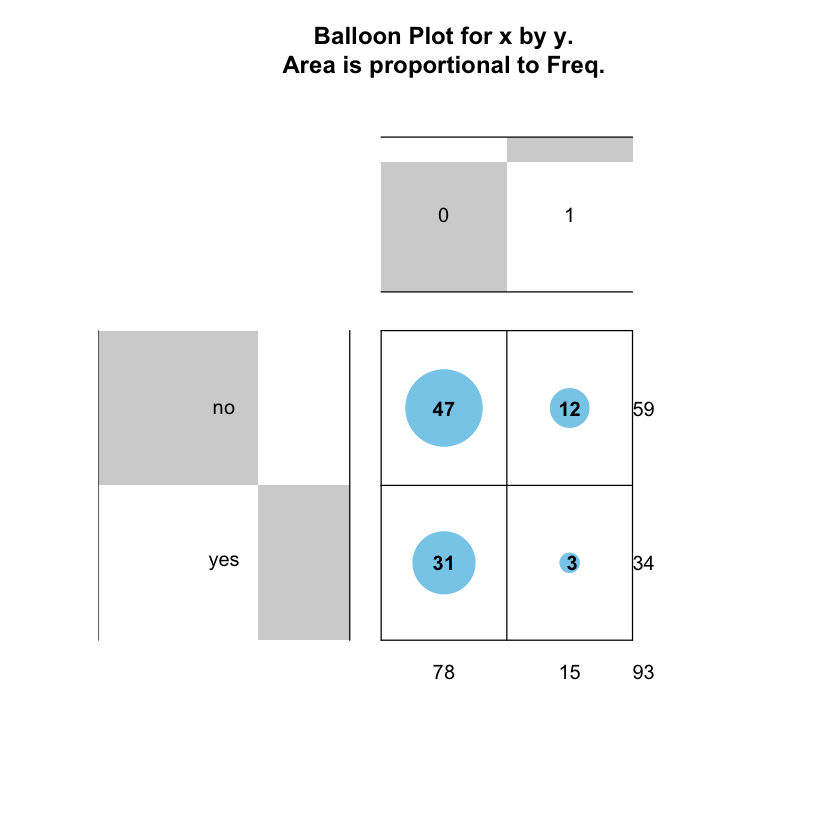

In [67]:
Prematurity_Meets136 <- table(full_elssp$IsPremature, full_elssp$Meets136)
Prematurity_Meets136 <- Prematurity_Meets136[, -1]
chisq.test(Prematurity_Meets136)
balloonplot(Prematurity_Meets136)

   
    no yes
  0 72   9
  1  8   7

Warning message in chisq.test(Prematurity_DevConcerns):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test with Yates' continuity correction

data:  Prematurity_DevConcerns
X-squared = 9.1022, df = 1, p-value = 0.002553


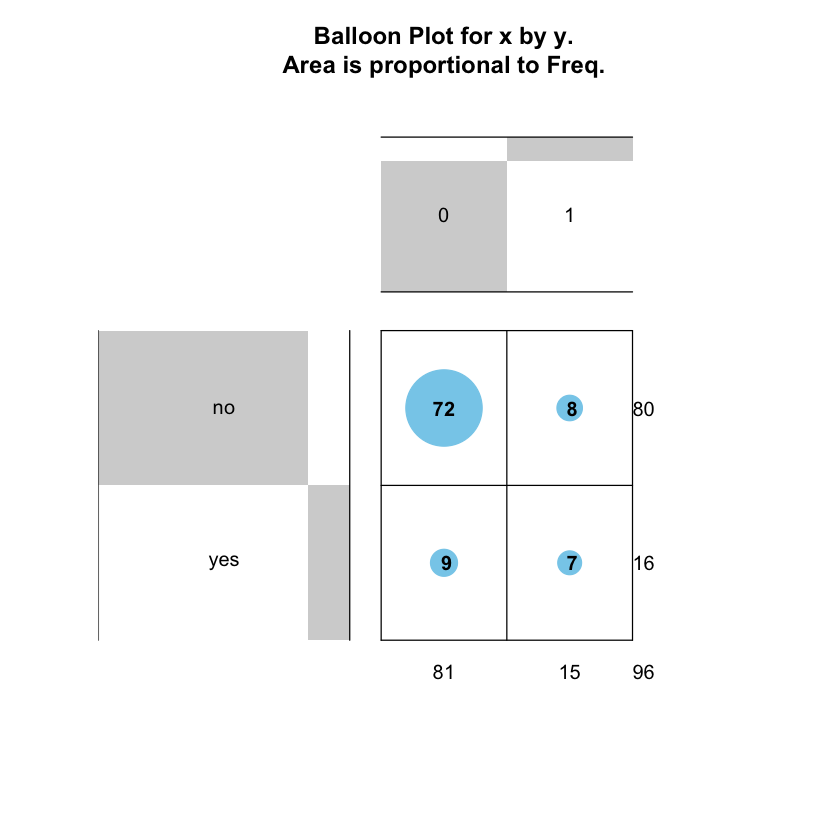

In [70]:
Prematurity_DevConcerns <- table(full_elssp$IsPremature, full_elssp$DevelopmentalConcerns)
Prematurity_DevConcerns
chisq.test(Prematurity_DevConcerns)
balloonplot(Prematurity_DevConcerns)

Warning message in chisq.test(Prematurity_Amplification):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  Prematurity_Amplification
X-squared = 5.6768, df = 2, p-value = 0.05852


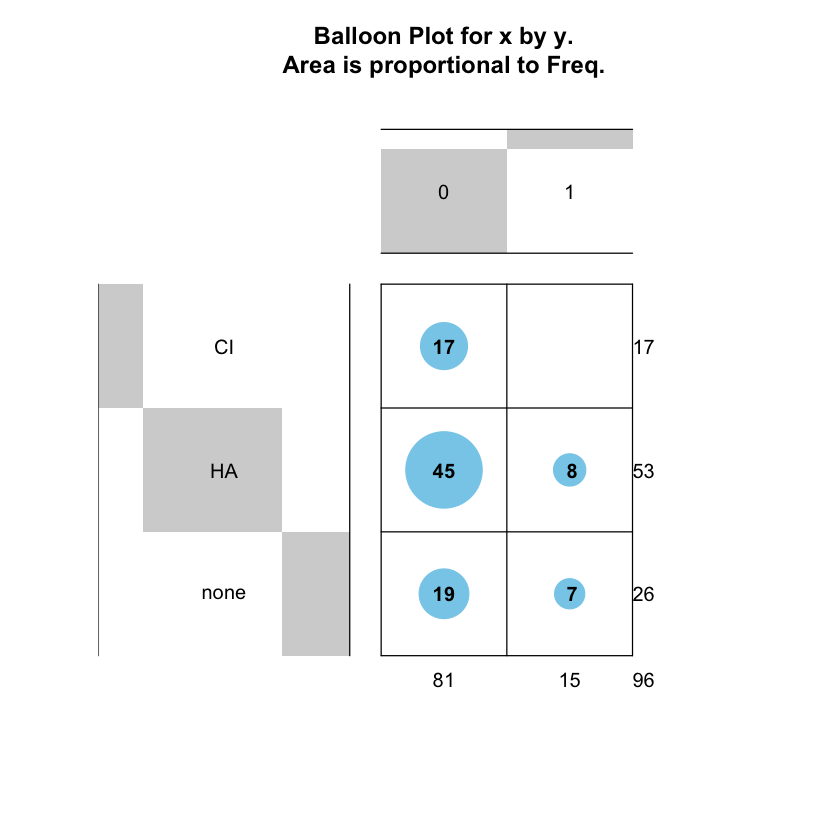

In [75]:
Prematurity_Amplification <- table(full_elssp$IsPremature, full_elssp$Amplification)
Prematurity_Amplification <- Prematurity_Amplification[, -1]
chisq.test(Prematurity_Amplification)
balloonplot(Prematurity_Amplification)

Warning message in chisq.test(Prematurity_Etiology):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  Prematurity_Etiology
X-squared = 2.1424, df = 2, p-value = 0.3426


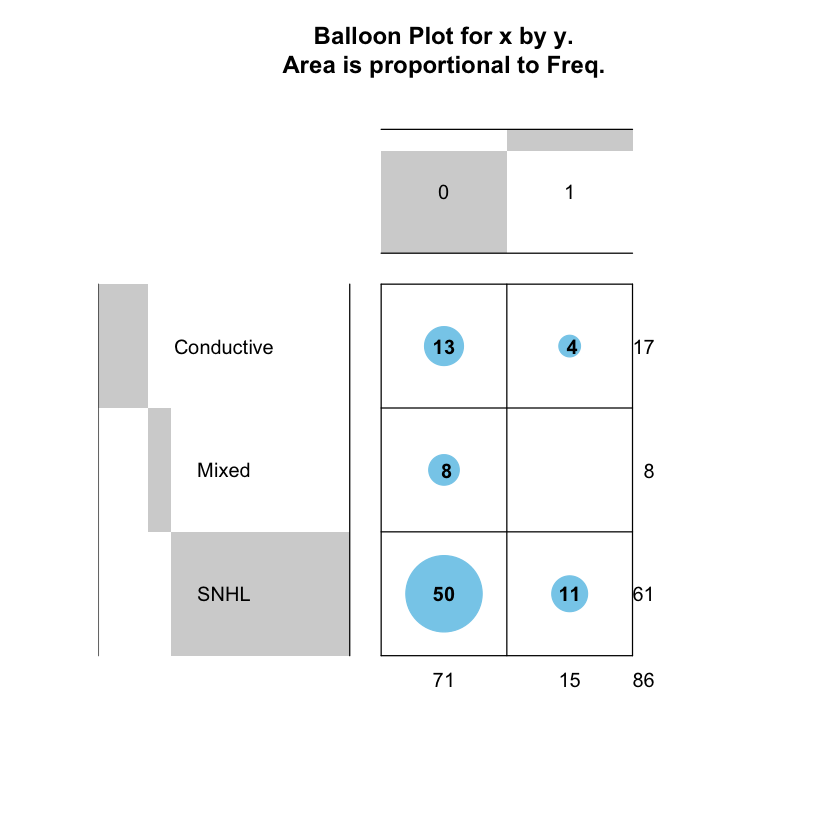

In [77]:
Prematurity_Etiology <- table(full_elssp$IsPremature, full_elssp$Etiology)
Prematurity_Etiology <- Prematurity_Etiology[, -1]
chisq.test(Prematurity_Etiology)
balloonplot(Prematurity_Etiology)

Warning message in chisq.test(Prematurity_Communication):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  Prematurity_Communication
X-squared = 1.4252, df = 2, p-value = 0.4904


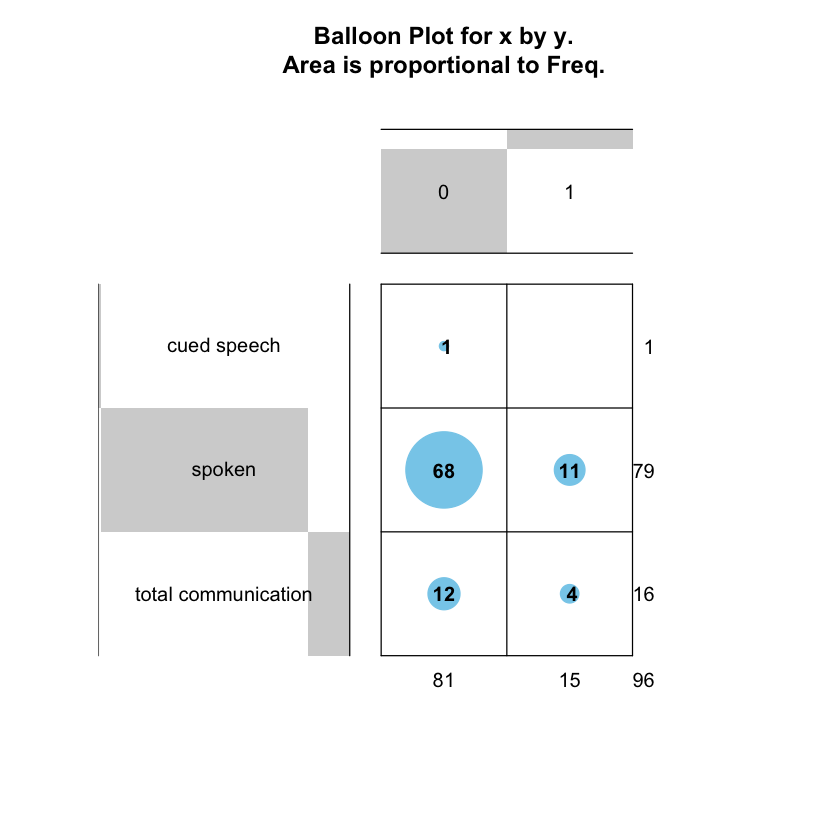

In [78]:
Prematurity_Communication <- table(full_elssp$IsPremature, full_elssp$Communication)
Prematurity_Communication <- Prematurity_Communication[, -1]
chisq.test(Prematurity_Communication)
balloonplot(Prematurity_Communication)

Warning message in chisq.test(Meets136_Laterality):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  Meets136_Laterality
X-squared = 1.2685, df = 2, p-value = 0.5303


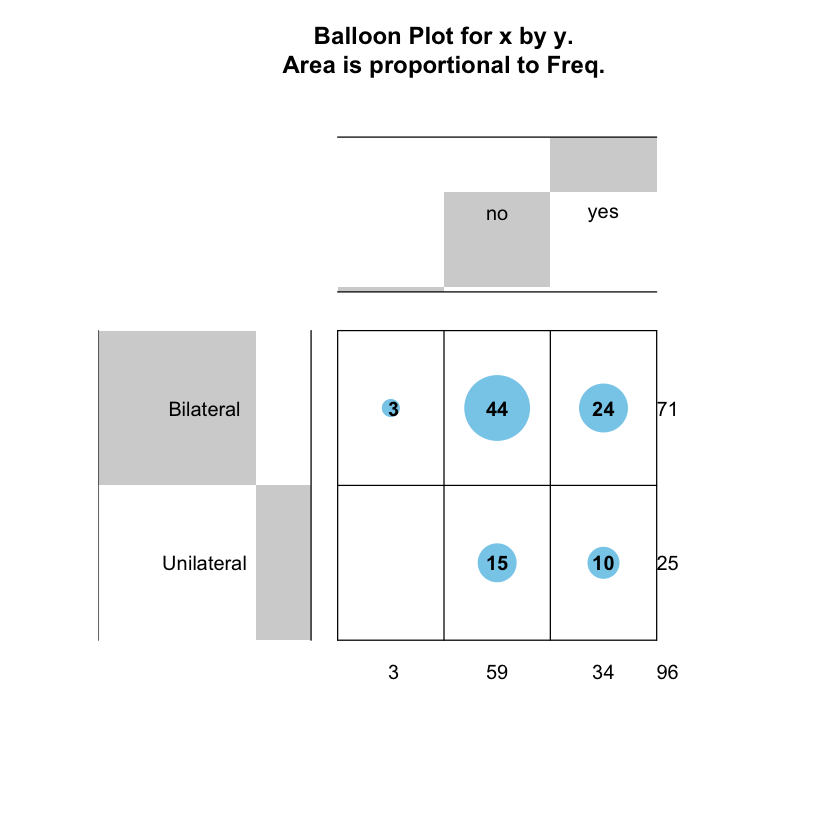

In [83]:
Meets136_Laterality <- table(full_elssp$Meets136, full_elssp$Laterality)
Meets136_Laterality <- Meets136_Laterality[, c("Bilateral", "Unilateral")]
chisq.test(Meets136_Laterality)
balloonplot(Meets136_Laterality)

Warning message in chisq.test(Amplification_Laterality):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  Amplification_Laterality
X-squared = 17.191, df = 2, p-value = 0.0001849


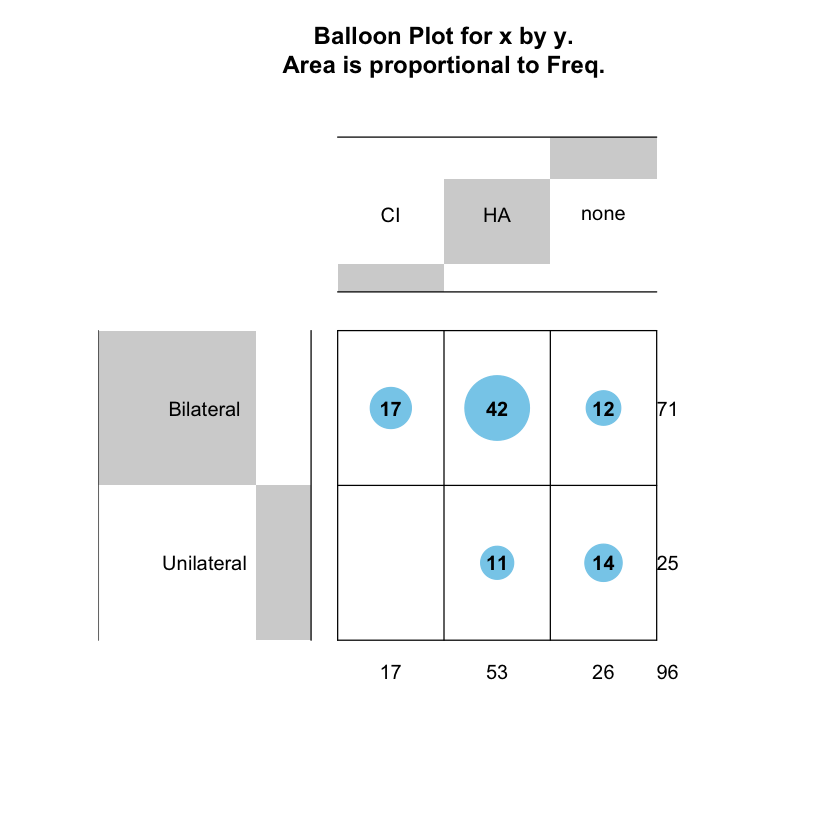

In [80]:
Amplification_Laterality <- table(full_elssp$Amplification, full_elssp$Laterality)
Amplification_Laterality <- Amplification_Laterality[-1, c("Bilateral", "Unilateral")]
chisq.test(Amplification_Laterality)
balloonplot(Amplification_Laterality)

Warning message in chisq.test(DevConcerns_Laterality):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test with Yates' continuity correction

data:  DevConcerns_Laterality
X-squared = 0.17307, df = 1, p-value = 0.6774


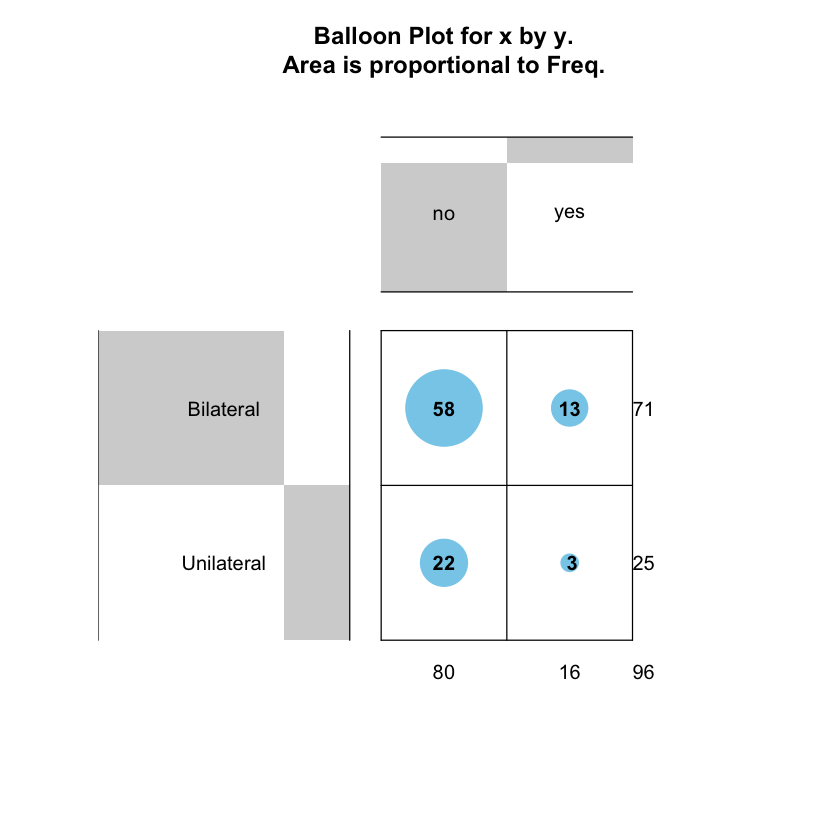

In [76]:
DevConcerns_Laterality <- table(full_elssp$DevelopmentalConcerns, full_elssp$Laterality)
DevConcerns_Laterality <- DevConcerns_Laterality[, c("Bilateral", "Unilateral")]
chisq.test(DevConcerns_Laterality)
balloonplot(DevConcerns_Laterality)

Warning message in chisq.test(Etiology_Laterality):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  Etiology_Laterality
X-squared = 14.836, df = 2, p-value = 0.0006005


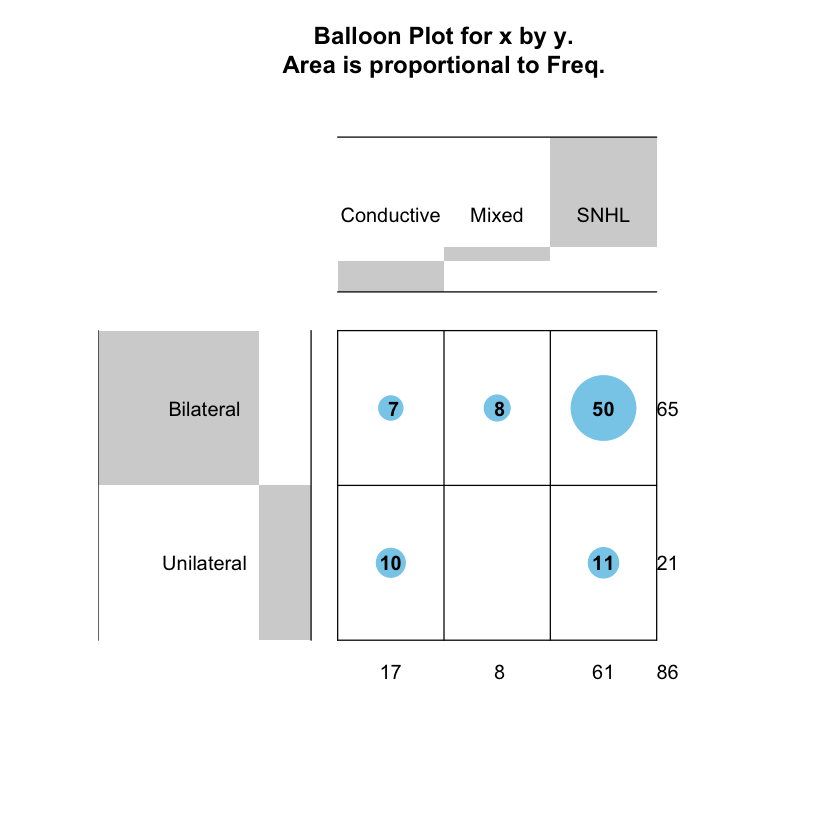

In [84]:
Etiology_Laterality <- table(full_elssp$Etiology, full_elssp$Laterality)
Etiology_Laterality <- Etiology_Laterality[-1, c("Bilateral", "Unilateral")]
chisq.test(Etiology_Laterality)
balloonplot(Etiology_Laterality)

Warning message in chisq.test(Communication_Laterality):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  Communication_Laterality
X-squared = 0.37311, df = 2, p-value = 0.8298


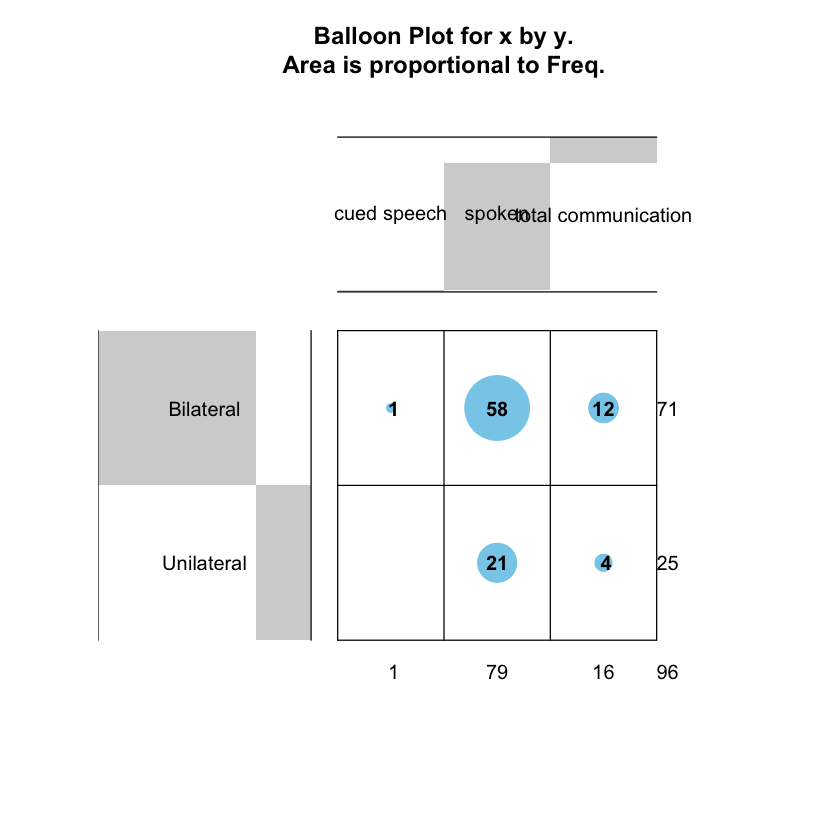

In [85]:
Communication_Laterality <- table(full_elssp$Communication, full_elssp$Laterality)
Communication_Laterality <- Communication_Laterality[-1, c("Bilateral", "Unilateral")]
chisq.test(Communication_Laterality)
balloonplot(Communication_Laterality)


	Pearson's Chi-squared test with Yates' continuity correction

data:  Meets136_DevDelay
X-squared = 3.0514, df = 1, p-value = 0.08067


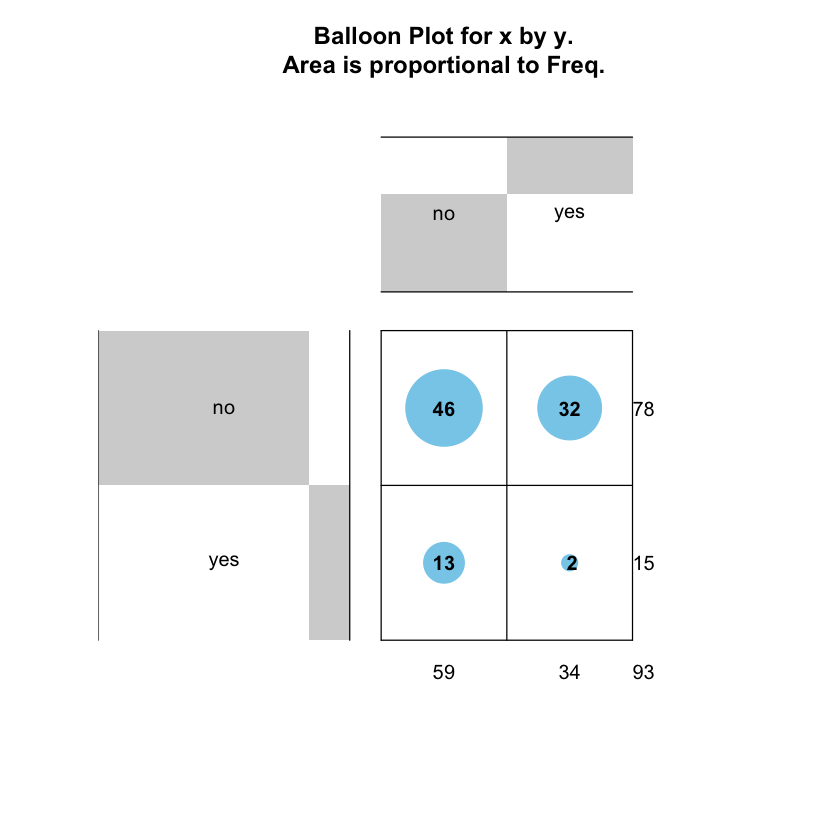

In [87]:
Meets136_DevDelay <- table(full_elssp$Meets136, full_elssp$DevelopmentalConcerns)
Meets136_DevDelay <- Meets136_DevDelay[-1, ]
chisq.test(Meets136_DevDelay)
balloonplot(Meets136_DevDelay)


	Pearson's Chi-squared test

data:  Meets136_Amplification
X-squared = 13.52, df = 2, p-value = 0.001159


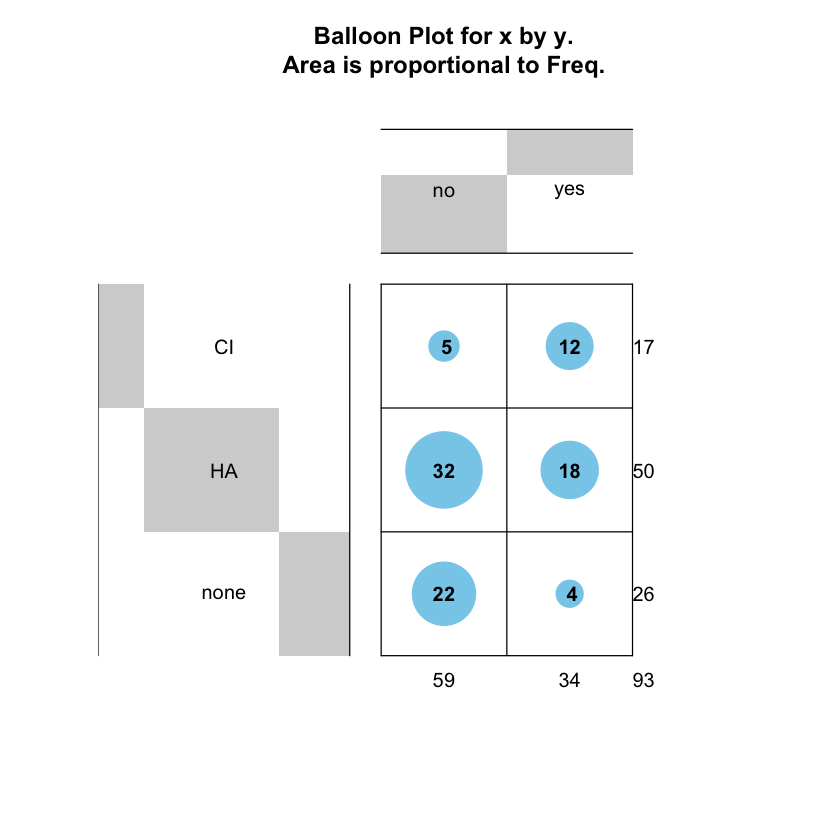

In [88]:
Meets136_Amplification <- table(full_elssp$Meets136, full_elssp$Amplification)
Meets136_Amplification <- Meets136_Amplification[-1, -1]
chisq.test(Meets136_Amplification)
balloonplot(Meets136_Amplification)

Warning message in chisq.test(Meets136_Etiology):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  Meets136_Etiology
X-squared = 2.0793, df = 2, p-value = 0.3536


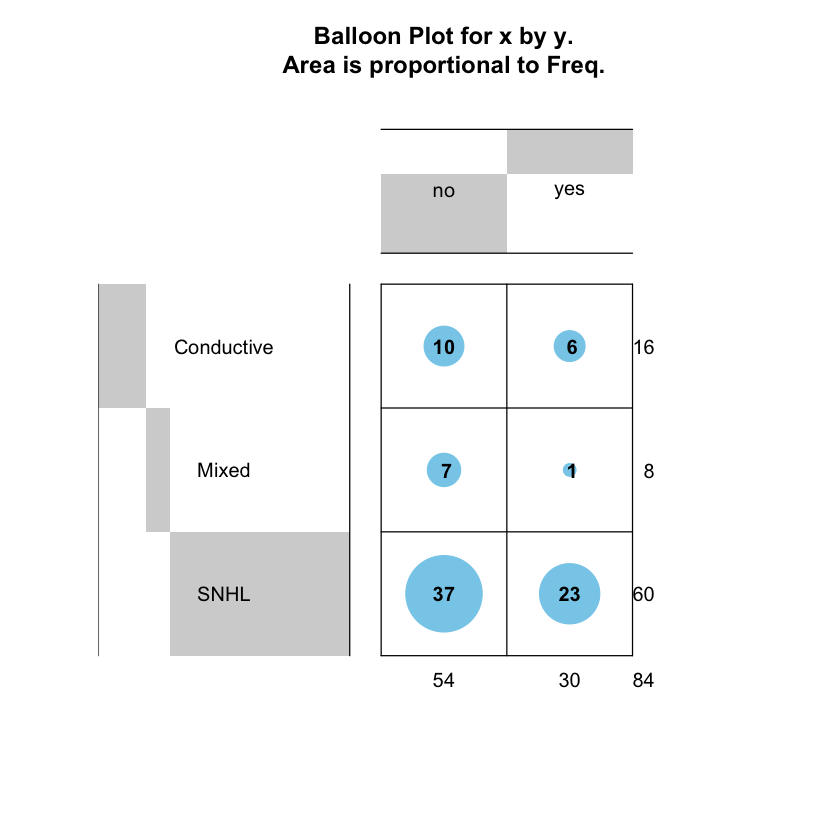

In [89]:
Meets136_Etiology <- table(full_elssp$Meets136, full_elssp$Etiology)
Meets136_Etiology <- Meets136_Etiology[-1, -1]
chisq.test(Meets136_Etiology)
balloonplot(Meets136_Etiology)

Warning message in chisq.test(Meets136_Communication):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  Meets136_Communication
X-squared = 3.7002, df = 2, p-value = 0.1572


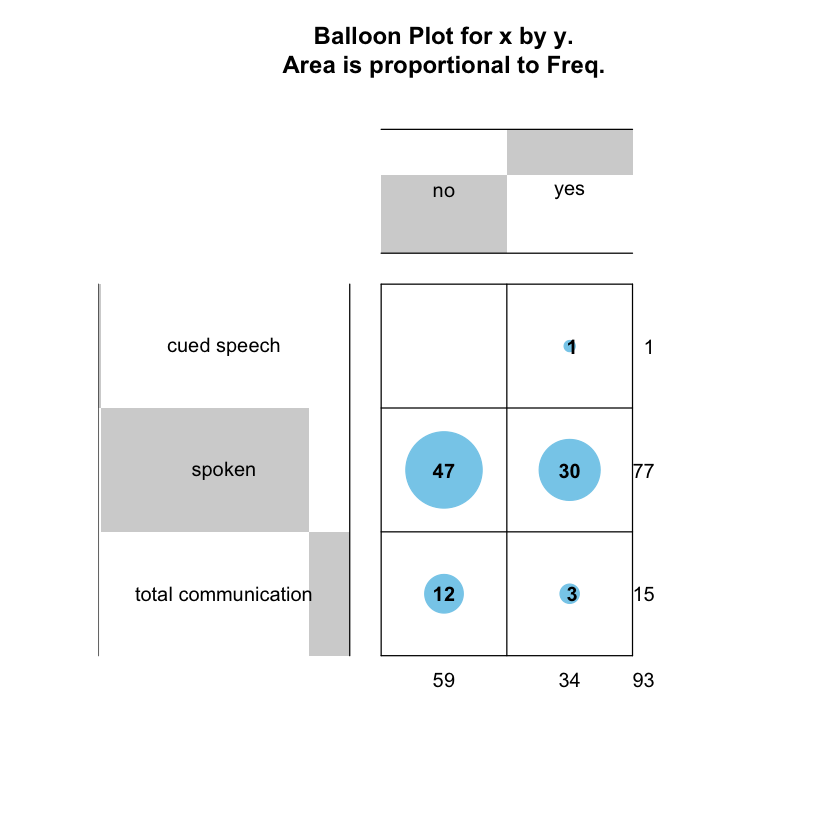

In [92]:
Meets136_Communication <- table(full_elssp$Meets136, full_elssp$Communication)
Meets136_Communication <- Meets136_Communication[-1, -1]
chisq.test(Meets136_Communication)
balloonplot(Meets136_Communication)

Warning message in chisq.test(Amplification_DevConcerns):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  Amplification_DevConcerns
X-squared = 9.8874, df = 2, p-value = 0.007128


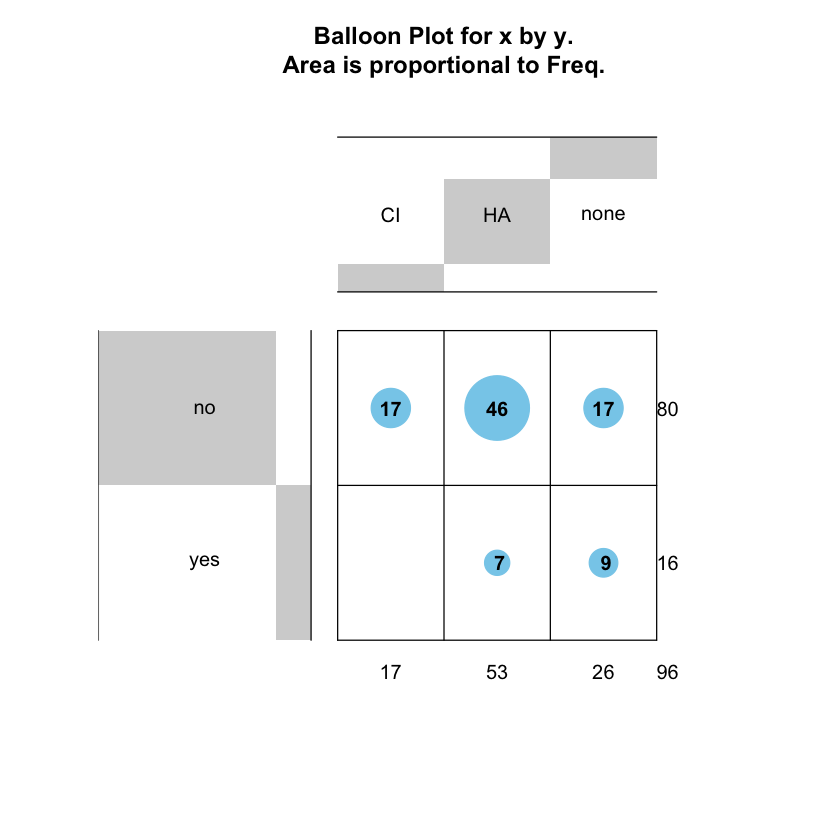

In [94]:
Amplification_DevConcerns <- table(full_elssp$Amplification, full_elssp$DevelopmentalConcerns)
Amplification_DevConcerns <- Amplification_DevConcerns[-1, ]
chisq.test(Amplification_DevConcerns)
balloonplot(Amplification_DevConcerns)

Warning message in chisq.test(Amplification_Etiology):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  Amplification_Etiology
X-squared = 15.971, df = 4, p-value = 0.003058


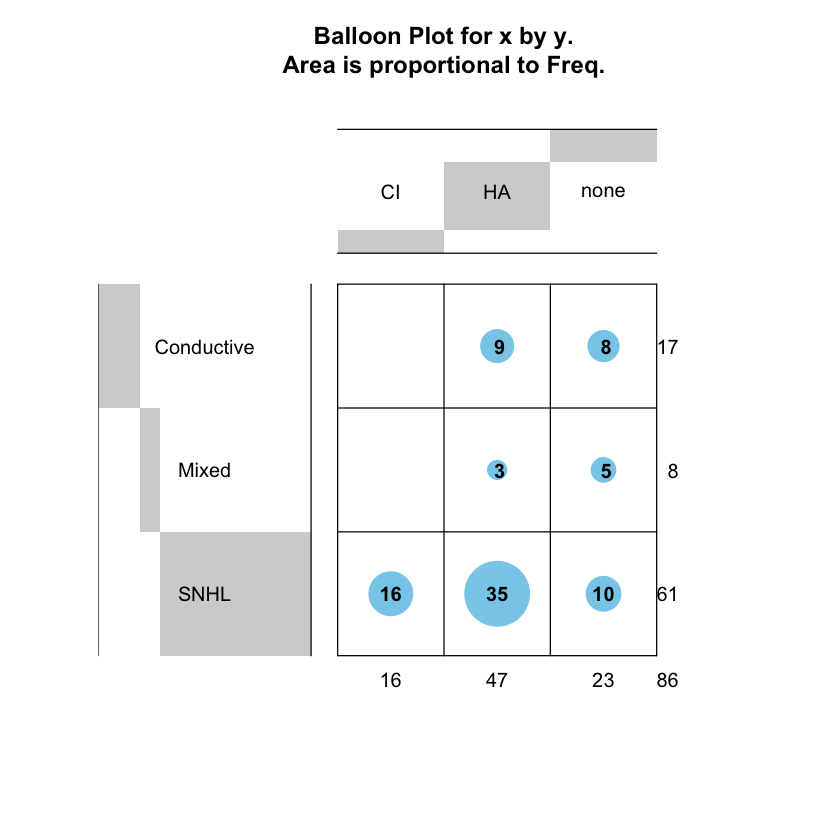

In [96]:
Amplification_Etiology <- table(full_elssp$Amplification, full_elssp$Etiology)
Amplification_Etiology <- Amplification_Etiology[-1, -1]
chisq.test(Amplification_Etiology)
balloonplot(Amplification_Etiology)

Warning message in chisq.test(Amplification_Communication):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  Amplification_Communication
X-squared = 11.533, df = 4, p-value = 0.02118


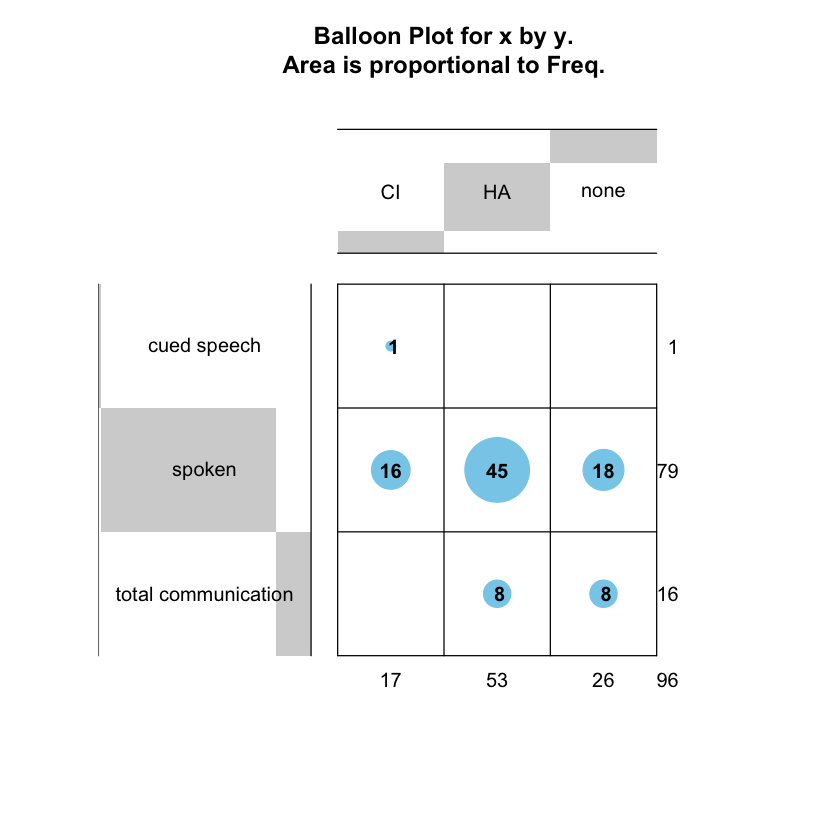

In [93]:
Amplification_Communication <- table(full_elssp$Amplification, full_elssp$Communication)
Amplification_Communication <- Amplification_Communication[-1, -1]
chisq.test(Amplification_Communication)
balloonplot(Amplification_Communication)

Warning message in chisq.test(DevConcerns_Etiology):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  DevConcerns_Etiology
X-squared = 1.705, df = 2, p-value = 0.4264


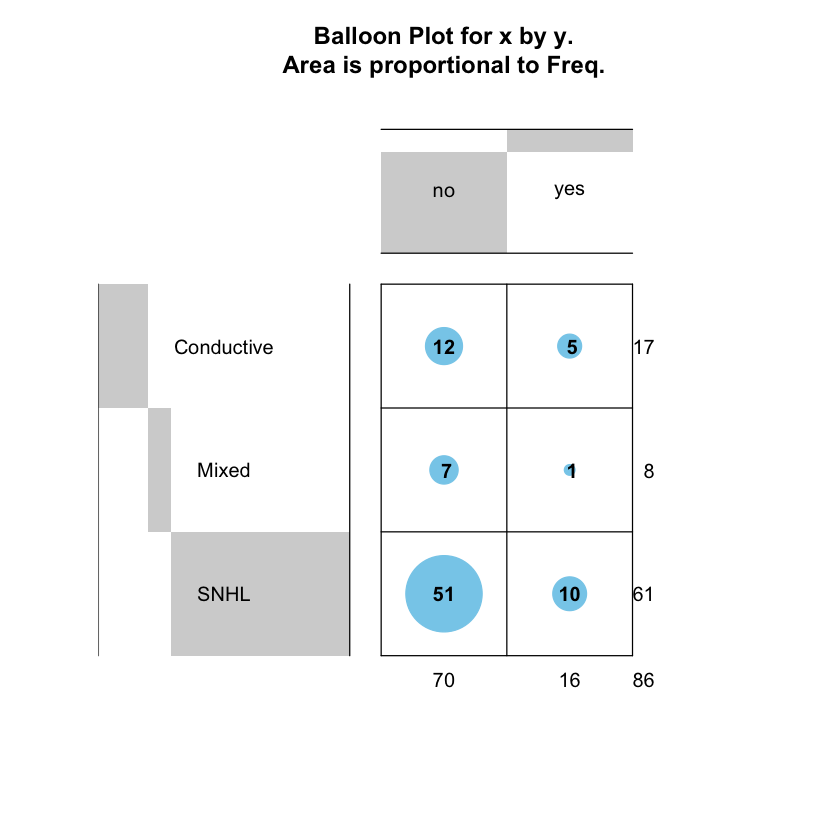

In [98]:
DevConcerns_Etiology <- table(full_elssp$DevelopmentalConcerns, full_elssp$Etiology)
DevConcerns_Etiology <- DevConcerns_Etiology[, -1]
chisq.test(DevConcerns_Etiology)
balloonplot(DevConcerns_Etiology)

Warning message in chisq.test(DevConcerns_Communication):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  DevConcerns_Communication
X-squared = 15.433, df = 2, p-value = 0.0004454


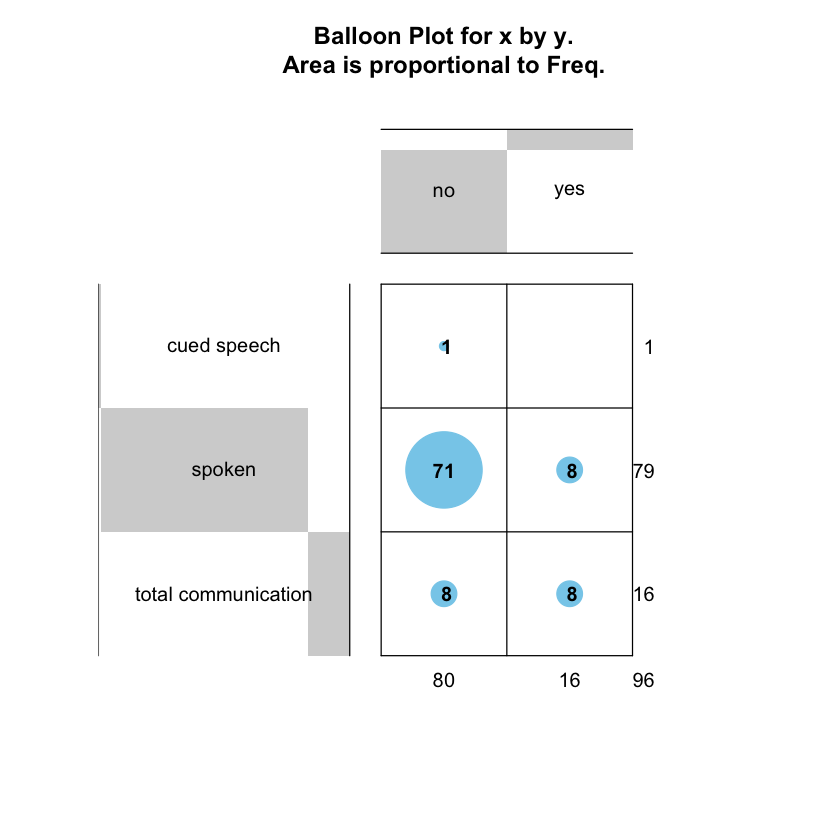

In [101]:
DevConcerns_Communication <- table(full_elssp$DevelopmentalConcerns, full_elssp$Communication)
DevConcerns_Communication <- DevConcerns_Communication[, -1]
chisq.test(DevConcerns_Communication)
balloonplot(DevConcerns_Communication)

Warning message in chisq.test(Communication_Etiology):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  Communication_Etiology
X-squared = 8.5471, df = 4, p-value = 0.07347


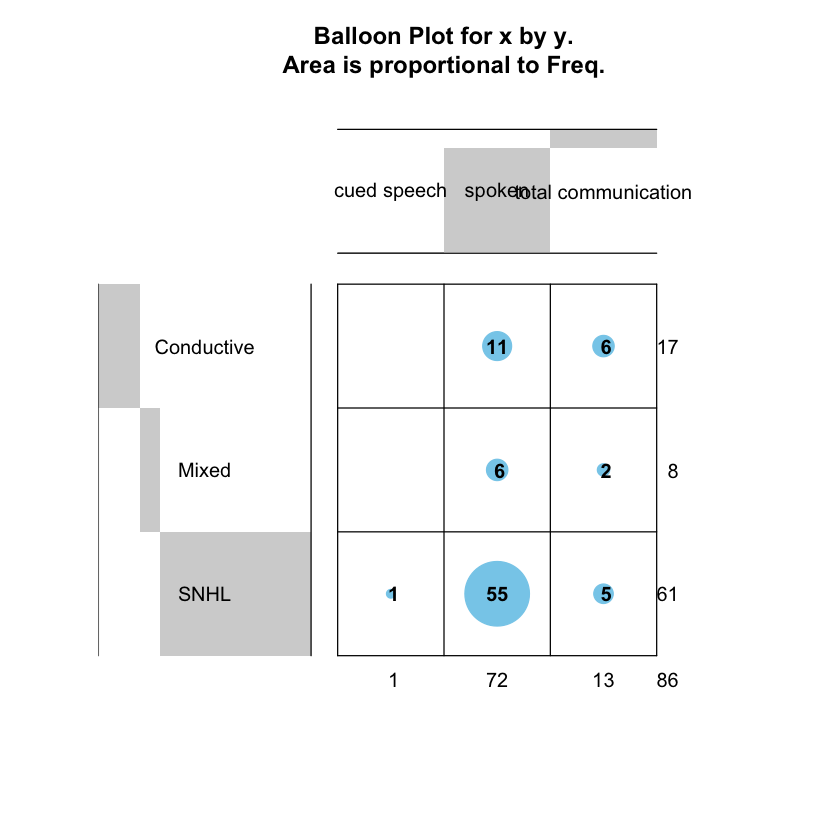

In [100]:
Communication_Etiology <- table(full_elssp$Communication, full_elssp$Etiology)
Communication_Etiology <- Communication_Etiology[-1, -1]
chisq.test(Communication_Etiology)
balloonplot(Communication_Etiology)


	Shapiro-Wilk normality test

data:  full_elssp$HLworse
W = 0.91837, p-value = 4.387e-05


Warning message in wilcox.test.default(x = c(52.375, 48, 64.25, 91, 74, 48, 48, :
“cannot compute exact p-value with ties”


	Wilcoxon rank sum test with continuity correction

data:  HLworse by Gender
W = 695.5, p-value = 0.05361
alternative hypothesis: true location shift is not equal to 0


Warning message:
“Removed 12 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 12 rows containing missing values (geom_point).”

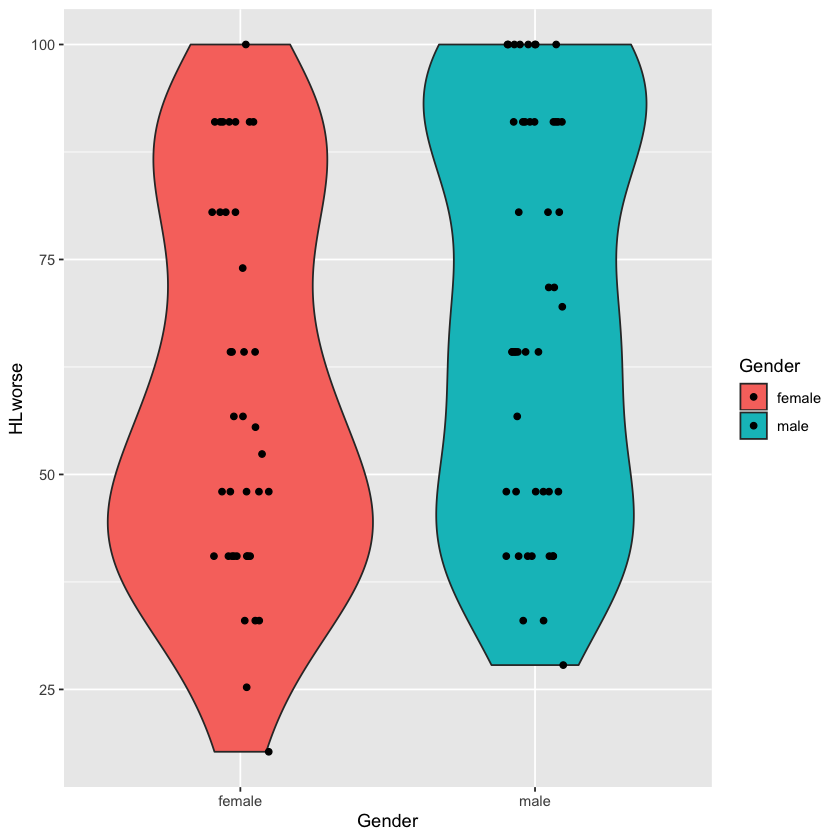

In [108]:
shapiro.test(full_elssp$HLworse)
wilcox.test(HLworse ~ Gender, data=full_elssp)
ggplot(data=full_elssp, aes(Gender, HLworse, fill=Gender))+
geom_violin() + geom_jitter(height = 0, width = 0.1)



	Shapiro-Wilk normality test

data:  full_elssp$ServicesReceivedPerMonth
W = 0.73088, p-value = 6.653e-12



	Wilcoxon rank sum test with continuity correction

data:  ServicesReceivedPerMonth by Gender
W = 1038.5, p-value = 0.5767
alternative hypothesis: true location shift is not equal to 0


Warning message:
“Removed 3 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 3 rows containing missing values (geom_point).”

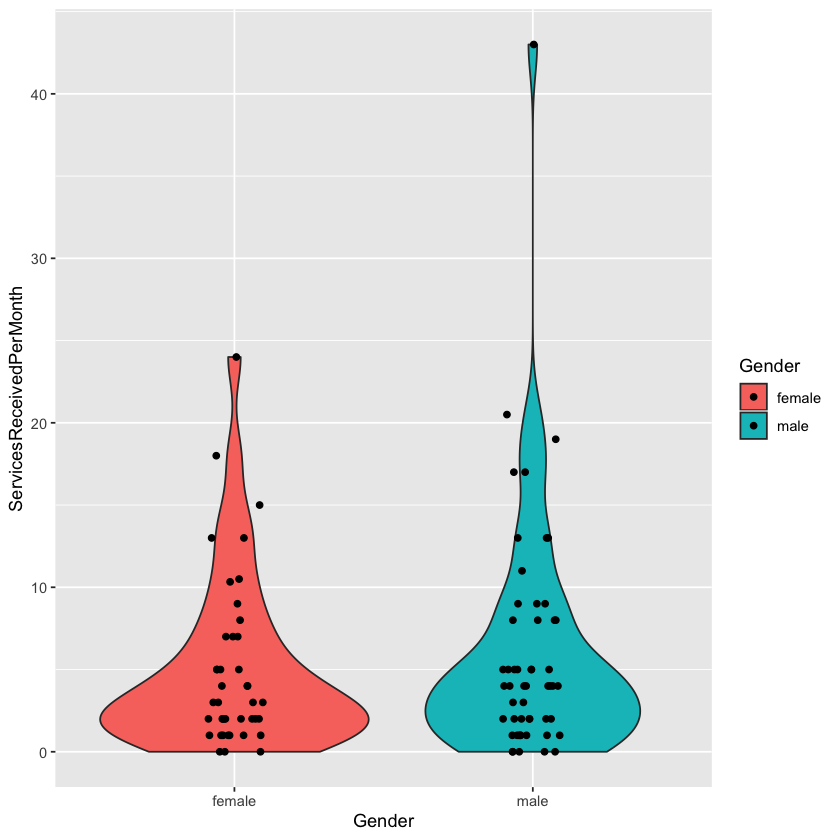

In [109]:
shapiro.test(full_elssp$ServicesReceivedPerMonth)
wilcox.test(ServicesReceivedPerMonth ~ Gender, data=full_elssp)
ggplot(data=full_elssp, aes(Gender, ServicesReceivedPerMonth, fill=Gender))+
geom_violin() + geom_jitter(height = 0, width = 0.1)


	Shapiro-Wilk normality test

data:  full_elssp$HLworse
W = 0.91837, p-value = 4.387e-05



	Wilcoxon rank sum test with continuity correction

data:  HLworse by HealthIssues
W = 993.5, p-value = 0.3313
alternative hypothesis: true location shift is not equal to 0


Warning message:
“Removed 12 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 12 rows containing missing values (geom_point).”

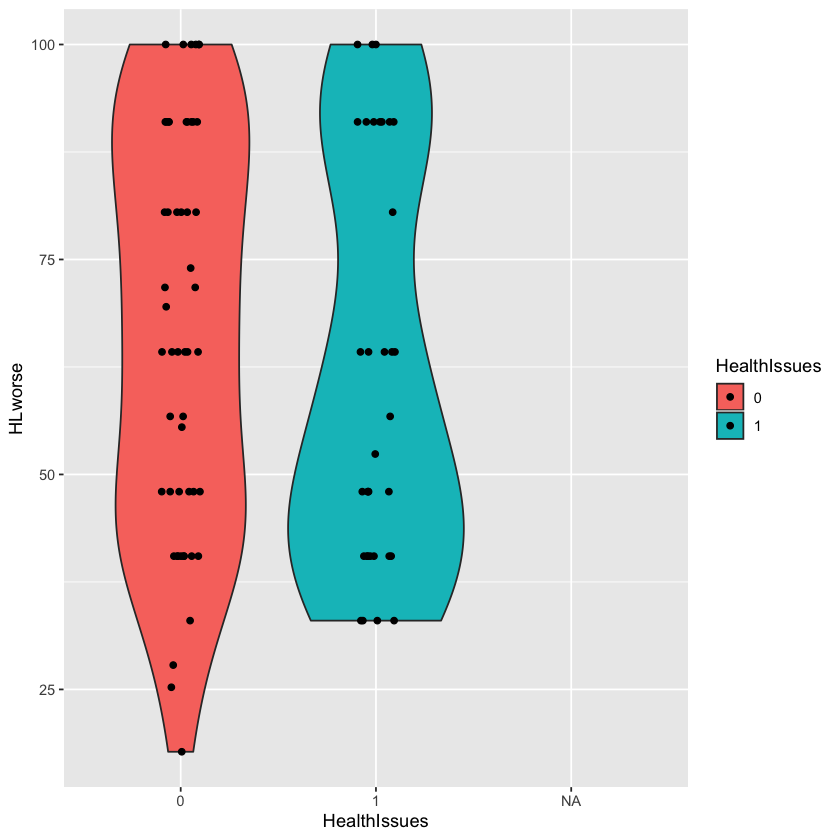

In [110]:
shapiro.test(full_elssp$HLworse)
wilcox.test(HLworse ~ HealthIssues, data=full_elssp)
ggplot(data=full_elssp, aes(HealthIssues, HLworse, fill=HealthIssues))+
geom_violin() + geom_jitter(height = 0, width = 0.1)


	Shapiro-Wilk normality test

data:  full_elssp$ServicesReceivedPerMonth
W = 0.73088, p-value = 6.653e-12



	Wilcoxon rank sum test with continuity correction

data:  ServicesReceivedPerMonth by HealthIssues
W = 794, p-value = 0.03887
alternative hypothesis: true location shift is not equal to 0


Warning message:
“Removed 3 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 3 rows containing missing values (geom_point).”

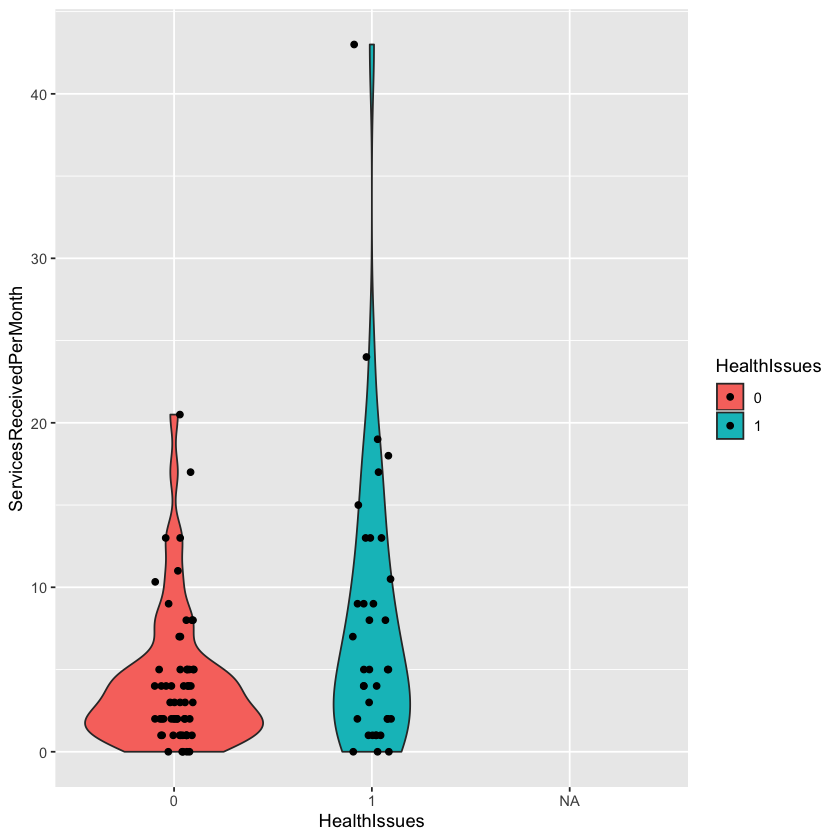

In [111]:
shapiro.test(full_elssp$ServicesReceivedPerMonth)
wilcox.test(ServicesReceivedPerMonth ~ HealthIssues, data=full_elssp)
ggplot(data=full_elssp, aes(HealthIssues, ServicesReceivedPerMonth, fill=HealthIssues))+
geom_violin() + geom_jitter(height = 0, width = 0.1)


	Shapiro-Wilk normality test

data:  full_elssp$HLworse
W = 0.91837, p-value = 4.387e-05



	Wilcoxon rank sum test with continuity correction

data:  HLworse by IsPremature
W = 595.5, p-value = 0.1427
alternative hypothesis: true location shift is not equal to 0


Warning message:
“Removed 12 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 12 rows containing missing values (geom_point).”

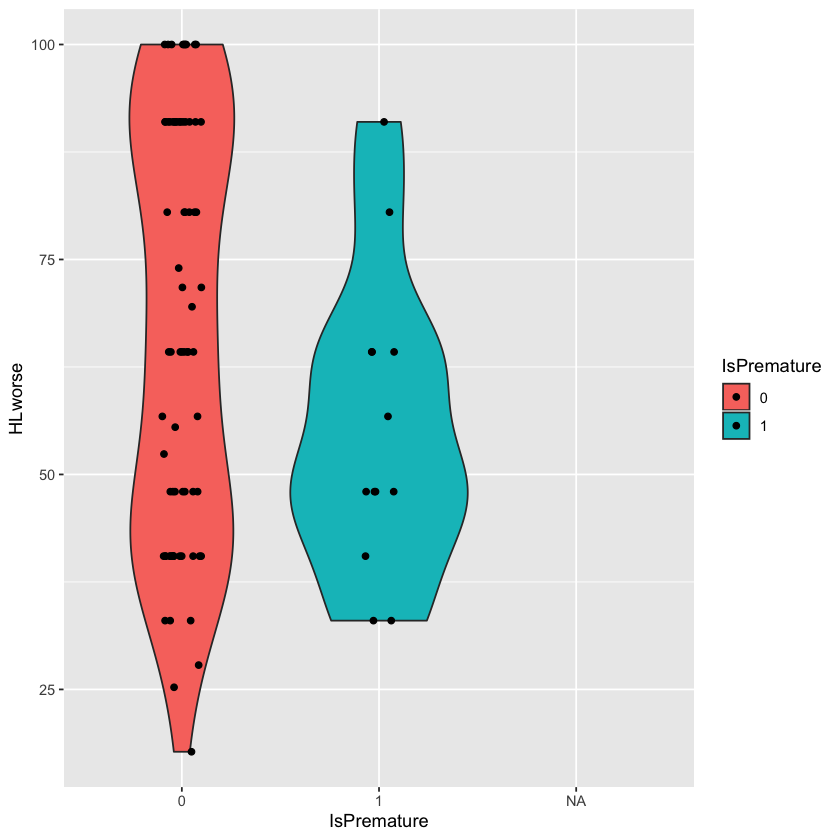

In [113]:
shapiro.test(full_elssp$HLworse)
wilcox.test(HLworse ~ IsPremature, data=full_elssp)
ggplot(data=full_elssp, aes(IsPremature, HLworse, fill=IsPremature))+
geom_violin() + geom_jitter(height = 0, width = 0.1)


	Shapiro-Wilk normality test

data:  full_elssp$ServicesReceivedPerMonth
W = 0.73088, p-value = 6.653e-12



	Wilcoxon rank sum test with continuity correction

data:  ServicesReceivedPerMonth by IsPremature
W = 467.5, p-value = 0.1751
alternative hypothesis: true location shift is not equal to 0


Warning message:
“Removed 3 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 3 rows containing missing values (geom_point).”

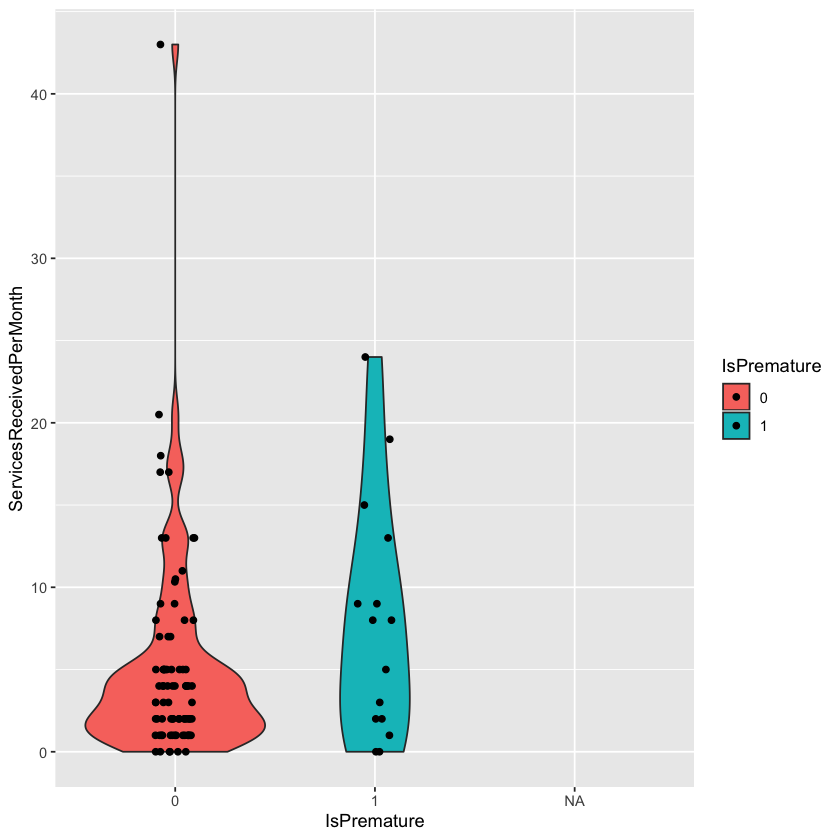

In [112]:
shapiro.test(full_elssp$ServicesReceivedPerMonth)
wilcox.test(ServicesReceivedPerMonth ~ IsPremature, data=full_elssp)
ggplot(data=full_elssp, aes(IsPremature, ServicesReceivedPerMonth, fill=IsPremature))+
geom_violin() + geom_jitter(height = 0, width = 0.1)


	Shapiro-Wilk normality test

data:  full_elssp$HLworse
W = 0.91837, p-value = 4.387e-05



	Wilcoxon rank sum test with continuity correction

data:  HLworse by Laterality
W = 545, p-value = 0.6537
alternative hypothesis: true location shift is not equal to 0


Warning message:
“Removed 12 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 12 rows containing missing values (geom_point).”

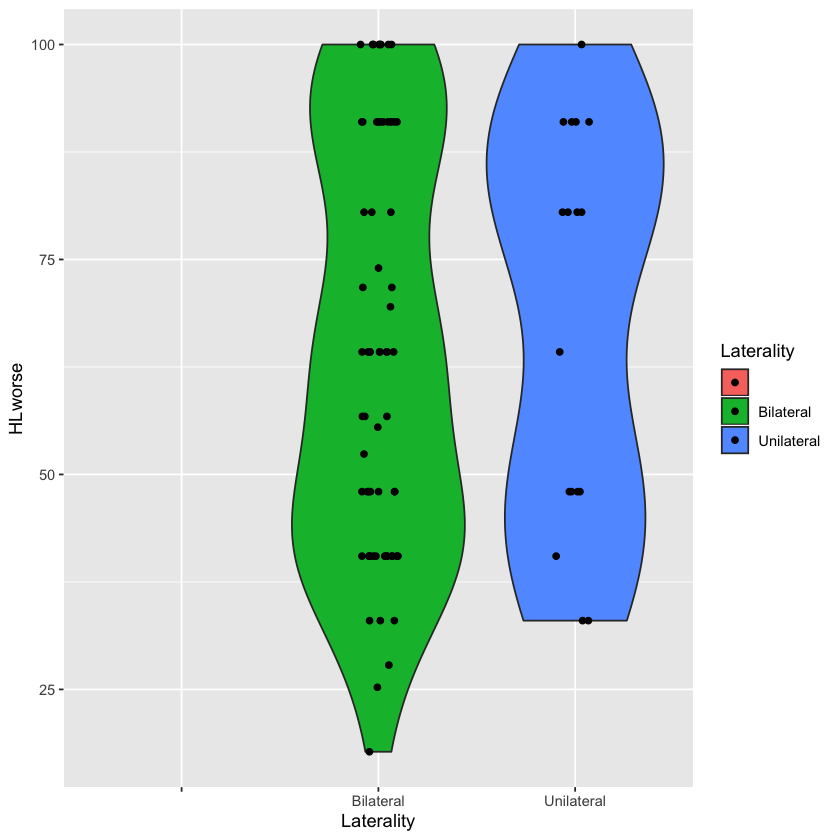

In [116]:
shapiro.test(full_elssp$HLworse)
wilcox.test(HLworse ~ Laterality, data=full_elssp)
ggplot(data=full_elssp, aes(Laterality, HLworse, fill=Laterality))+
geom_violin() + geom_jitter(height = 0, width = 0.1)


	Shapiro-Wilk normality test

data:  full_elssp$ServicesReceivedPerMonth
W = 0.73088, p-value = 6.653e-12



	Wilcoxon rank sum test with continuity correction

data:  ServicesReceivedPerMonth by Laterality
W = 1061, p-value = 0.07226
alternative hypothesis: true location shift is not equal to 0


Warning message:
“Removed 3 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 3 rows containing missing values (geom_point).”

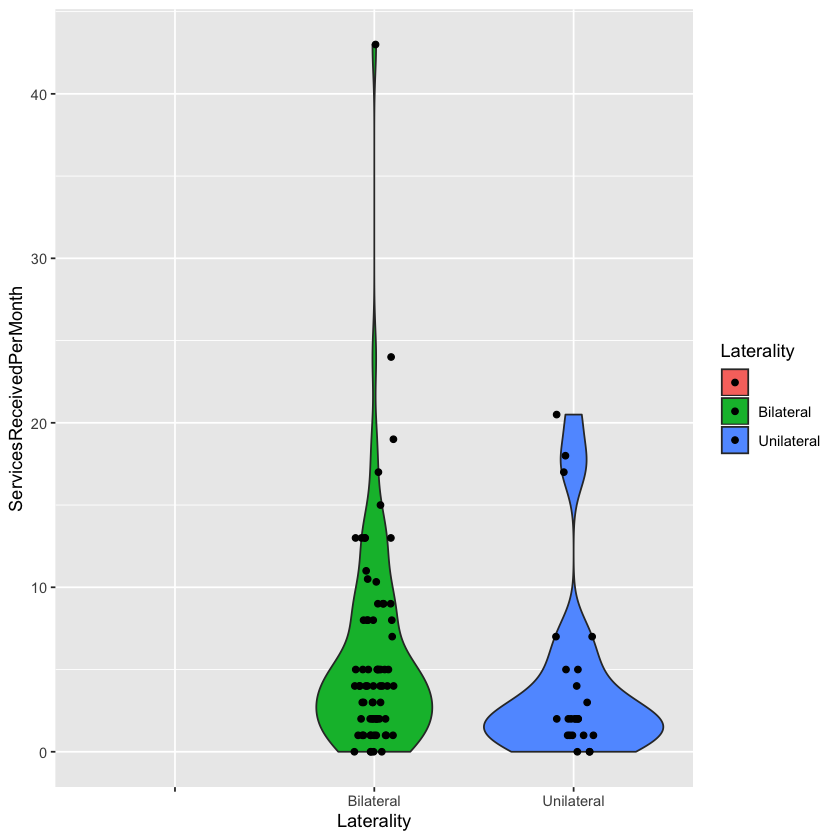

In [117]:
shapiro.test(full_elssp$ServicesReceivedPerMonth)
wilcox.test(ServicesReceivedPerMonth ~ Laterality, data=full_elssp)
ggplot(data=full_elssp, aes(Laterality, ServicesReceivedPerMonth, fill=Laterality))+
geom_violin() + geom_jitter(height = 0, width = 0.1)


	Shapiro-Wilk normality test

data:  full_elssp$HLworse
W = 0.91837, p-value = 4.387e-05



	Wilcoxon rank sum test with continuity correction

data:  HLworse by Meets136
W = 455, p-value = 0.001173
alternative hypothesis: true location shift is not equal to 0


Warning message:
“Removed 12 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 12 rows containing missing values (geom_point).”

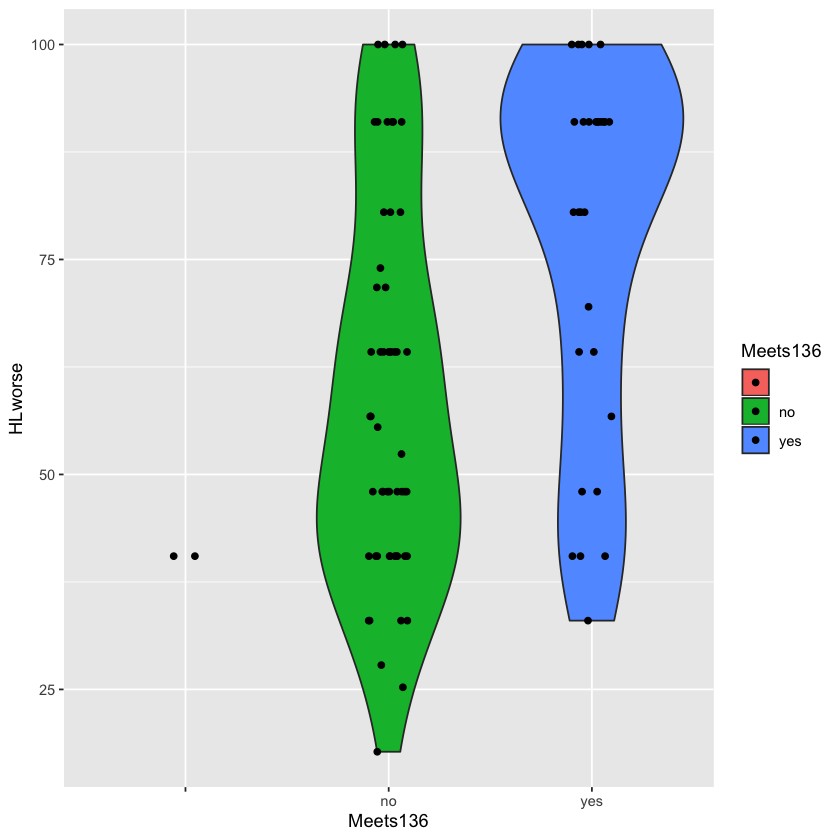

In [123]:
shapiro.test(full_elssp$HLworse)
wilcox.test(HLworse ~ Meets136, 
            data=(full_elssp %>% filter(full_elssp$Meets136=="yes"|full_elssp$Meets136=="no")))
ggplot(data=full_elssp, aes(Meets136, HLworse, fill=Meets136))+
geom_violin() + geom_jitter(height = 0, width = 0.1)


	Shapiro-Wilk normality test

data:  full_elssp$ServicesReceivedPerMonth
W = 0.73088, p-value = 6.653e-12



	Wilcoxon rank sum test with continuity correction

data:  ServicesReceivedPerMonth by Meets136
W = 1089, p-value = 0.4038
alternative hypothesis: true location shift is not equal to 0


Warning message:
“Removed 3 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 3 rows containing missing values (geom_point).”

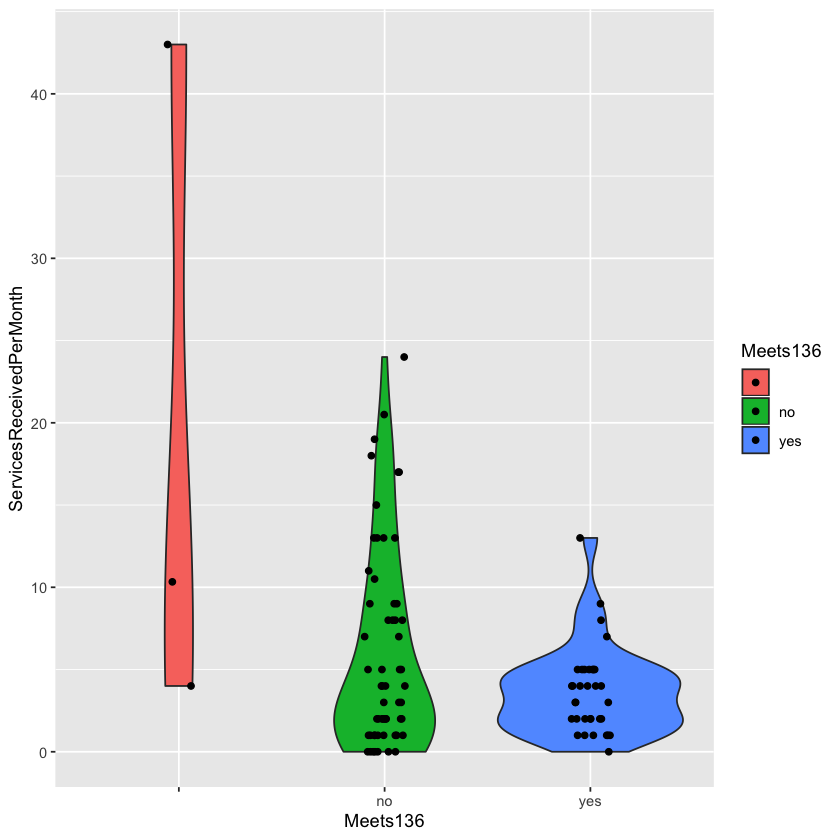

In [122]:
shapiro.test(full_elssp$ServicesReceivedPerMonth)
wilcox.test(ServicesReceivedPerMonth ~ Meets136, 
            data=(full_elssp %>% filter(full_elssp$Meets136=="yes"|full_elssp$Meets136=="no")))
ggplot(data=full_elssp, aes(Meets136, ServicesReceivedPerMonth, fill=Meets136))+
geom_violin() + geom_jitter(height = 0, width = 0.1)


	Shapiro-Wilk normality test

data:  full_elssp$HLworse
W = 0.91837, p-value = 4.387e-05



	Wilcoxon rank sum test with continuity correction

data:  HLworse by DevelopmentalConcerns
W = 644, p-value = 0.2025
alternative hypothesis: true location shift is not equal to 0


Warning message:
“Removed 12 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 12 rows containing missing values (geom_point).”

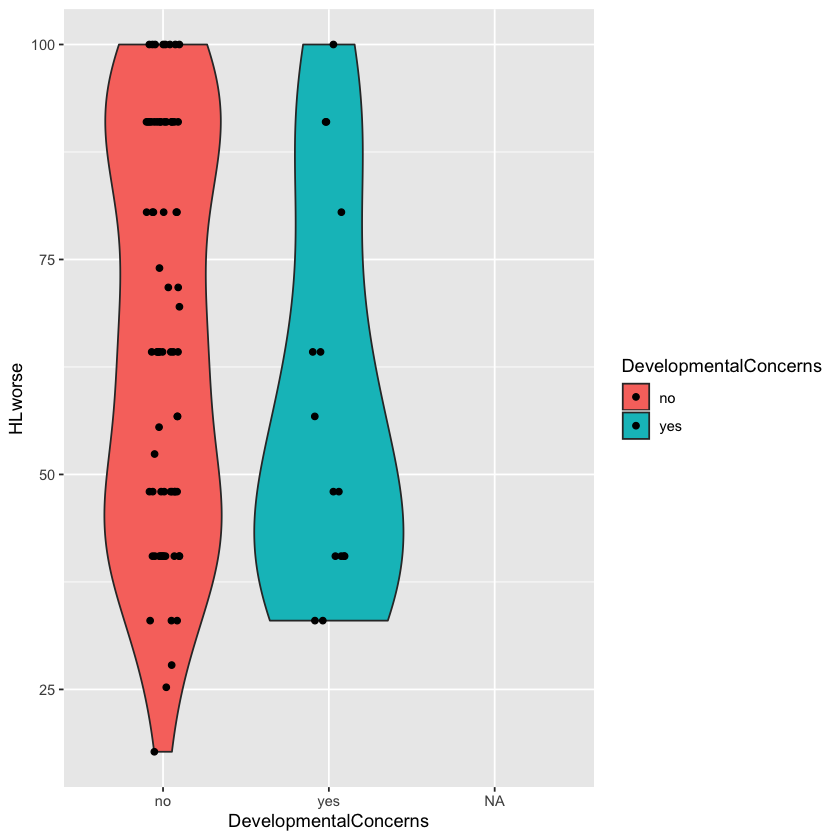

In [124]:
shapiro.test(full_elssp$HLworse)
wilcox.test(HLworse ~ DevelopmentalConcerns, 
            data=(full_elssp %>% filter(full_elssp$DevelopmentalConcerns=="yes"|full_elssp$DevelopmentalConcerns=="no")))
ggplot(data=full_elssp, aes(DevelopmentalConcerns, HLworse, fill=DevelopmentalConcerns))+
geom_violin() + geom_jitter(height = 0, width = 0.1)


	Shapiro-Wilk normality test

data:  full_elssp$ServicesReceivedPerMonth
W = 0.73088, p-value = 6.653e-12



	Wilcoxon rank sum test with continuity correction

data:  ServicesReceivedPerMonth by DevelopmentalConcerns
W = 202, p-value = 1.715e-05
alternative hypothesis: true location shift is not equal to 0


Warning message:
“Removed 3 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 3 rows containing missing values (geom_point).”

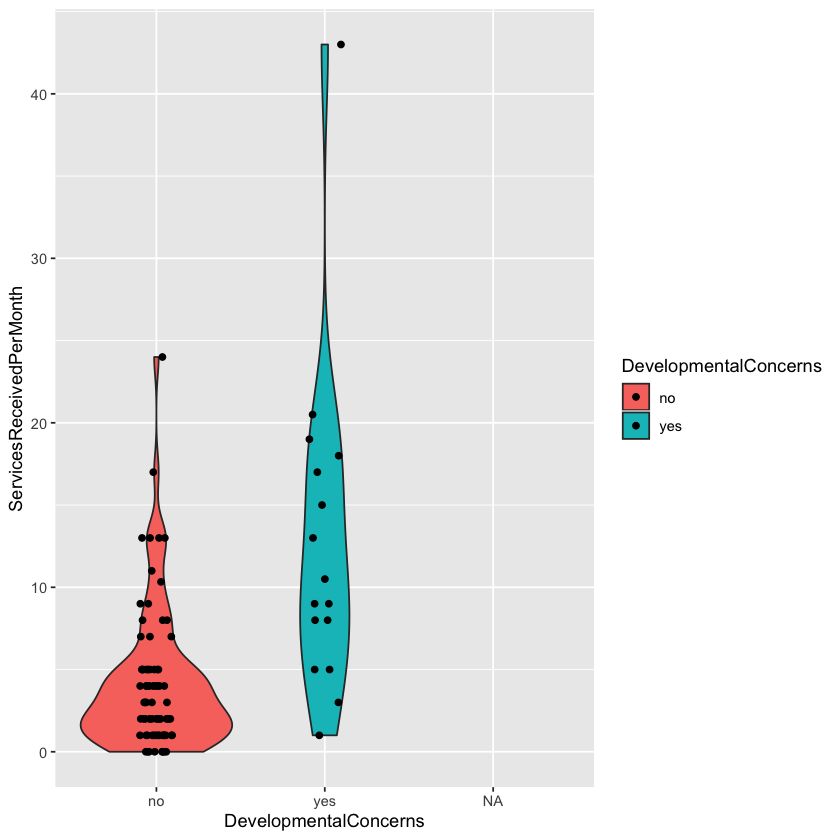

In [125]:
shapiro.test(full_elssp$ServicesReceivedPerMonth)
wilcox.test(ServicesReceivedPerMonth ~ DevelopmentalConcerns, 
            data=(full_elssp %>% filter(full_elssp$DevelopmentalConcerns=="yes"|full_elssp$DevelopmentalConcerns=="no")))
ggplot(data=full_elssp, aes(DevelopmentalConcerns, ServicesReceivedPerMonth, fill=DevelopmentalConcerns))+
geom_violin() + geom_jitter(height = 0, width = 0.1)


	Shapiro-Wilk normality test

data:  full_elssp$HLworse
W = 0.91837, p-value = 4.387e-05



	Kruskal-Wallis rank sum test

data:  HLworse by Amplification
Kruskal-Wallis chi-squared = 23.803, df = 2, p-value = 6.779e-06


Warning message:
“Removed 12 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 12 rows containing missing values (geom_point).”

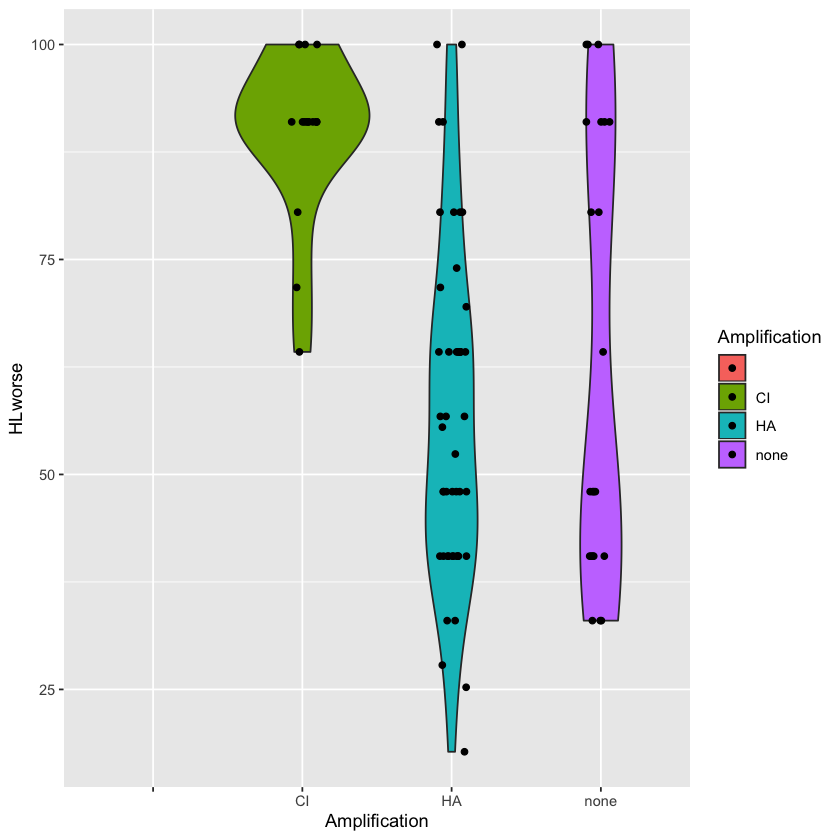

In [126]:
shapiro.test(full_elssp$HLworse)
kruskal.test(HLworse ~ Amplification, 
            data=(full_elssp %>% filter(full_elssp$Amplification=="CI"|full_elssp$Amplification=="HA"|full_elssp$Amplification=="none")))
ggplot(data=full_elssp, aes(Amplification, HLworse, fill=Amplification))+
geom_violin() + geom_jitter(height = 0, width = 0.1)


	Shapiro-Wilk normality test

data:  full_elssp$ServicesReceivedPerMonth
W = 0.73088, p-value = 6.653e-12



	Kruskal-Wallis rank sum test

data:  ServicesReceivedPerMonth by Amplification
Kruskal-Wallis chi-squared = 0.57152, df = 2, p-value = 0.7514


Warning message:
“Removed 3 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 3 rows containing missing values (geom_point).”

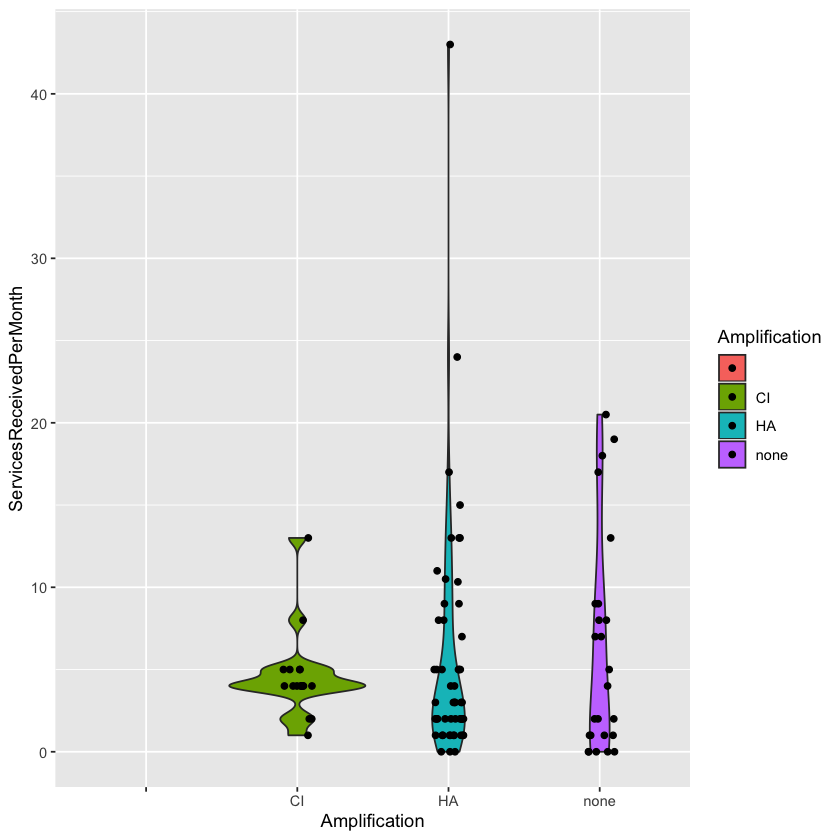

In [127]:
shapiro.test(full_elssp$ServicesReceivedPerMonth)
kruskal.test(ServicesReceivedPerMonth ~ Amplification, 
            data=(full_elssp %>% filter(full_elssp$Amplification=="CI"|full_elssp$Amplification=="HA"|full_elssp$Amplification=="none")))
ggplot(data=full_elssp, aes(Amplification, ServicesReceivedPerMonth, fill=Amplification))+
geom_violin() + geom_jitter(height = 0, width = 0.1)


	Shapiro-Wilk normality test

data:  full_elssp$HLworse
W = 0.91837, p-value = 4.387e-05



	Kruskal-Wallis rank sum test

data:  HLworse by Etiology
Kruskal-Wallis chi-squared = 4.5769, df = 2, p-value = 0.1014


Warning message:
“Removed 12 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 12 rows containing missing values (geom_point).”

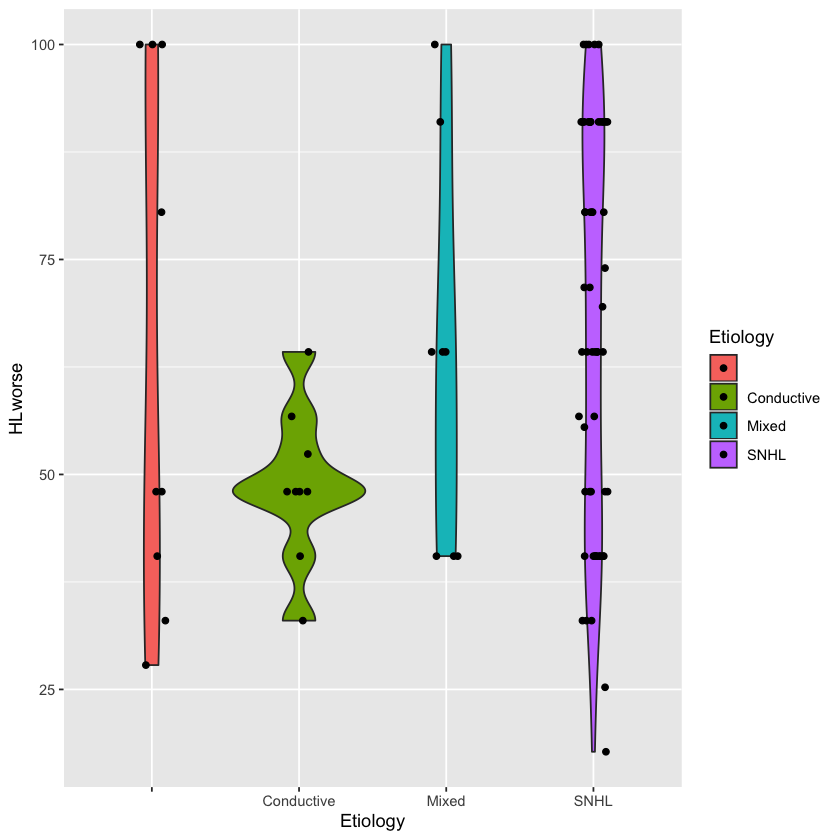

In [128]:
shapiro.test(full_elssp$HLworse)
kruskal.test(HLworse ~ Etiology, 
            data=(full_elssp %>% filter(full_elssp$Etiology=="Conductive"|full_elssp$Etiology=="Mixed"|full_elssp$Etiology=="SNHL")))
ggplot(data=full_elssp, aes(Etiology, HLworse, fill=Etiology))+
geom_violin() + geom_jitter(height = 0, width = 0.1)


	Shapiro-Wilk normality test

data:  full_elssp$ServicesReceivedPerMonth
W = 0.73088, p-value = 6.653e-12



	Kruskal-Wallis rank sum test

data:  ServicesReceivedPerMonth by Etiology
Kruskal-Wallis chi-squared = 2.646, df = 2, p-value = 0.2663


Warning message:
“Removed 3 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 3 rows containing missing values (geom_point).”

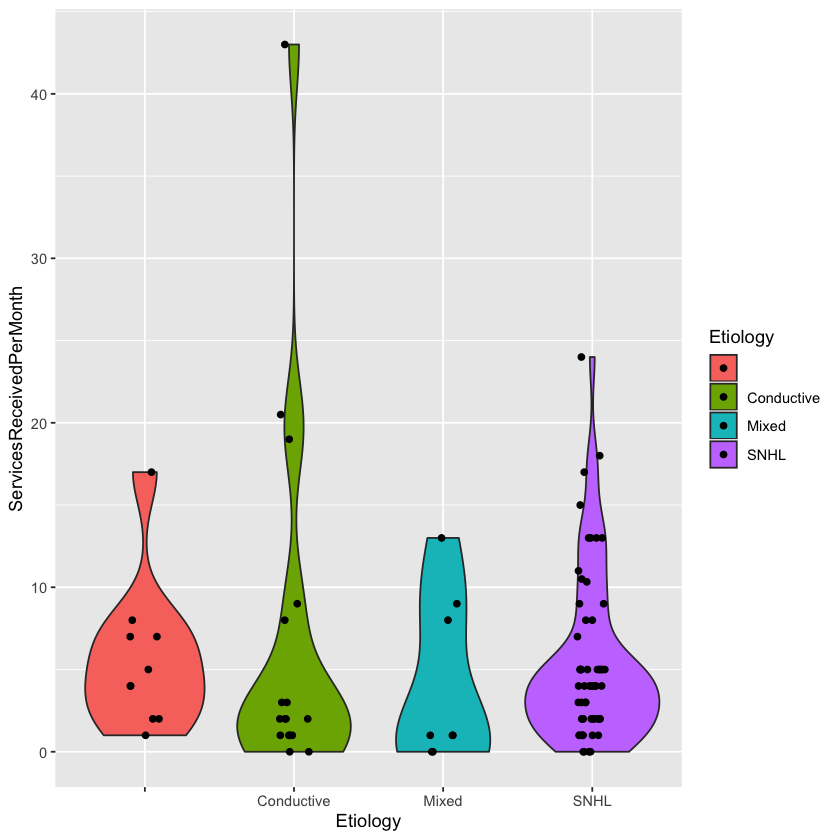

In [129]:
shapiro.test(full_elssp$ServicesReceivedPerMonth)
kruskal.test(ServicesReceivedPerMonth ~ Etiology, 
            data=(full_elssp %>% filter(full_elssp$Etiology=="Conductive"|full_elssp$Etiology=="Mixed"|full_elssp$Etiology=="SNHL")))
ggplot(data=full_elssp, aes(Etiology, ServicesReceivedPerMonth, fill=Etiology))+
geom_violin() + geom_jitter(height = 0, width = 0.1)


	Shapiro-Wilk normality test

data:  wg_elssp$diff_score_from_expected
W = 0.83977, p-value = 2.06e-07


[1] 388.726


	Kruskal-Wallis rank sum test

data:  HLworse by Communication
Kruskal-Wallis chi-squared = 0.0091414, df = 1, p-value = 0.9238


Warning message:
“Removed 12 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 12 rows containing missing values (geom_point).”

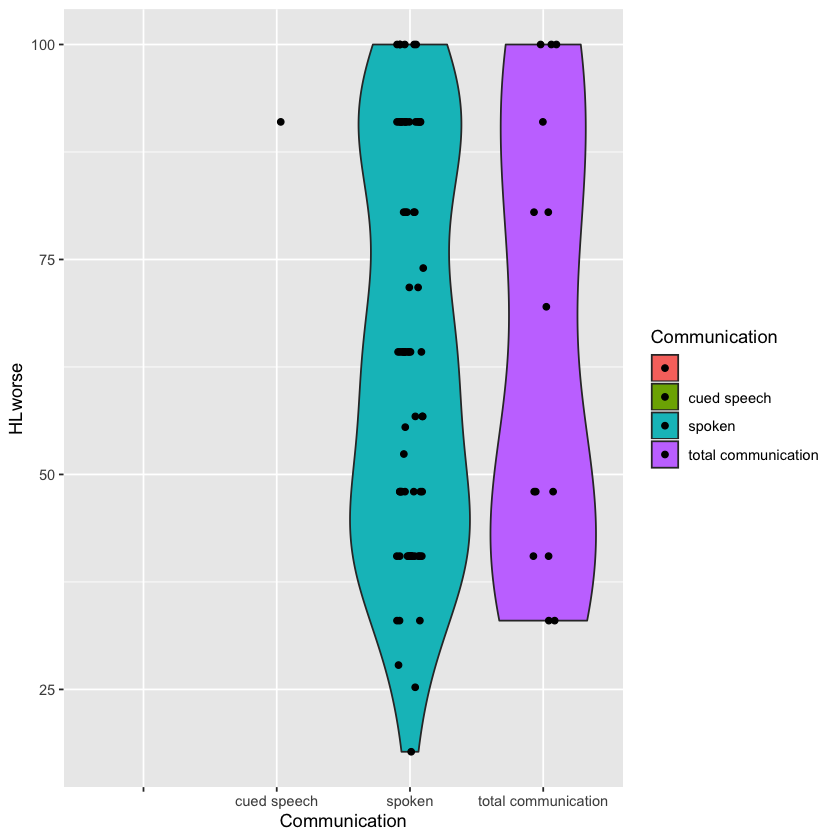

In [180]:
shapiro.test(full_elssp$HLworse)
kruskal.test(HLworse ~ Communication, 
            data=(full_elssp %>% filter(full_elssp$Communication=="total communication"|full_elssp$Communication=="spoken")))
ggplot(data=full_elssp, aes(Communication, HLworse, fill=Communication))+
geom_violin() + geom_jitter(height = 0, width = 0.1)


	Shapiro-Wilk normality test

data:  full_elssp$ServicesReceivedPerMonth
W = 0.73088, p-value = 6.653e-12



	Kruskal-Wallis rank sum test

data:  ServicesReceivedPerMonth by Communication
Kruskal-Wallis chi-squared = 15.603, df = 1, p-value = 7.815e-05


Warning message:
“Removed 3 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 3 rows containing missing values (geom_point).”

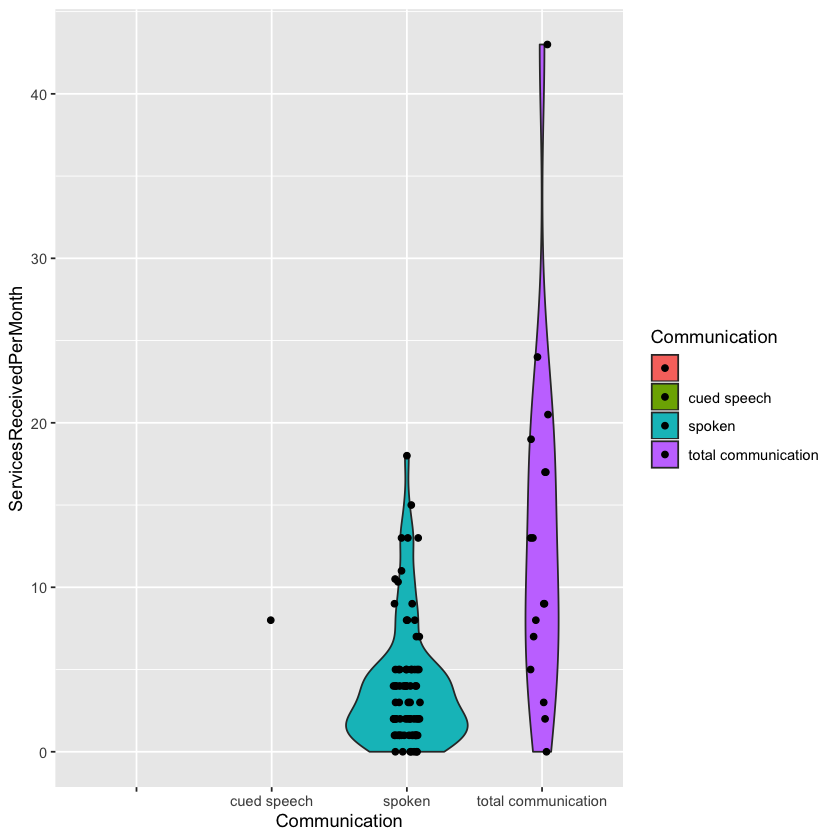

In [130]:
shapiro.test(full_elssp$ServicesReceivedPerMonth)
kruskal.test(ServicesReceivedPerMonth ~ Communication, 
            data=(full_elssp %>% filter(full_elssp$Communication=="total communication"|full_elssp$Communication=="spoken")))
ggplot(data=full_elssp, aes(Communication, ServicesReceivedPerMonth, fill=Communication))+
geom_violin() + geom_jitter(height = 0, width = 0.1)

In [132]:
cor.test(full_elssp$HLworse, full_elssp$ServicesReceivedPerMonth, method="kendall")


	Kendall's rank correlation tau

data:  full_elssp$HLworse and full_elssp$ServicesReceivedPerMonth
z = 0.33179, p-value = 0.74
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
0.02676364 


### Meets 1-3-6 predictors

In [164]:
diagnosis_full <- lm(IdentificationOfHLMonths ~ Gender + Etiology +HLbetter + 
                     HLworse + Laterality + IsPremature + HealthIssues + 
                     DevelopmentalConcerns + Monolingual_English + VisionLoss + ANSD, (data=full_elssp %>% 
                                                                   filter(DevelopmentalConcerns=="yes"|DevelopmentalConcerns=="no") 
                                                                  %>% filter(HLworse!="NA")))
summary(diagnosis_full)
stepAIC(diagnosis_full)


Call:
lm(formula = IdentificationOfHLMonths ~ Gender + Etiology + HLbetter + 
    HLworse + Laterality + IsPremature + HealthIssues + DevelopmentalConcerns + 
    Monolingual_English + VisionLoss + ANSD, data = (data = full_elssp %>% 
    filter(DevelopmentalConcerns == "yes" | DevelopmentalConcerns == 
        "no") %>% filter(HLworse != "NA")))

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5906 -3.2281 -1.5311  0.9452 25.9928 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)  
(Intercept)               5.97678    4.17036   1.433   0.1563  
Gendermale               -1.56686    1.70999  -0.916   0.3627  
EtiologyConductive        0.52497    3.56837   0.147   0.8835  
EtiologyMixed             0.50776    3.69315   0.137   0.8910  
EtiologySNHL              1.41130    2.67280   0.528   0.5992  
HLbetter                  0.06507    0.05996   1.085   0.2815  
HLworse                  -0.06094    0.05598  -1.089   0.2801  
LateralityUnilateral      2.7

Start:  AIC=336.23
IdentificationOfHLMonths ~ Gender + Etiology + HLbetter + HLworse + 
    Laterality + IsPremature + HealthIssues + DevelopmentalConcerns + 
    Monolingual_English + VisionLoss + ANSD

                        Df Sum of Sq    RSS    AIC
- Etiology               3    18.372 3313.4 330.69
- ANSD                   1    15.683 3310.7 334.62
- Laterality             1    22.589 3317.6 334.80
- VisionLoss             1    31.652 3326.7 335.03
- Gender                 1    39.522 3334.5 335.23
- IsPremature            1    46.269 3341.3 335.40
- HLbetter               1    55.447 3350.5 335.63
- HLworse                1    55.774 3350.8 335.64
<none>                               3295.0 336.23
- DevelopmentalConcerns  1    87.469 3382.5 336.43
- Monolingual_English    1   182.759 3477.8 338.76
- HealthIssues           1   227.935 3522.9 339.84

Step:  AIC=330.69
IdentificationOfHLMonths ~ Gender + HLbetter + HLworse + Laterality + 
    IsPremature + HealthIssues + Developmen


Call:
lm(formula = IdentificationOfHLMonths ~ HealthIssues + Monolingual_English, 
    data = (data = full_elssp %>% filter(DevelopmentalConcerns == 
        "yes" | DevelopmentalConcerns == "no") %>% filter(HLworse != 
        "NA")))

Coefficients:
           (Intercept)           HealthIssues1  Monolingual_Englishyes  
                 5.721                   4.210                  -4.079  



Call:
lm(formula = IdentificationOfHLMonths ~ HealthIssues + Monolingual_English, 
    data = full_elssp)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.6873  -3.2792  -1.7885   0.2115  27.2115 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)               8.697      1.988   4.376 3.25e-05 ***
HealthIssues1             3.491      1.440   2.423 0.017379 *  
Monolingual_Englishyes   -6.908      2.023  -3.414 0.000961 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.753 on 90 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.1714,	Adjusted R-squared:  0.153 
F-statistic:  9.31 on 2 and 90 DF,  p-value: 0.0002114


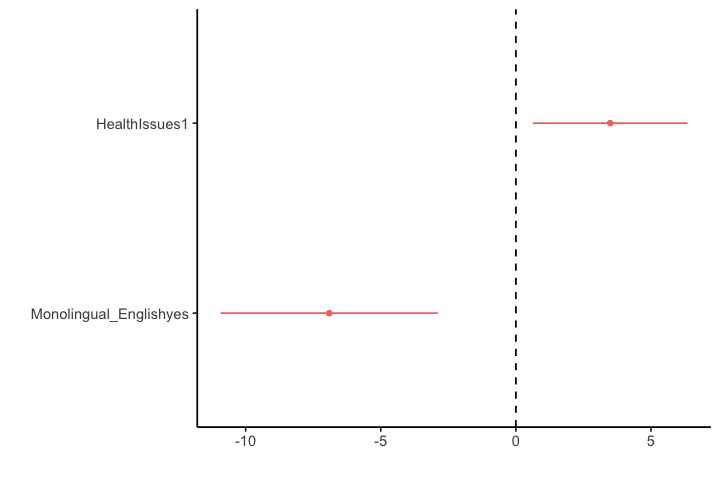

In [12]:
diagnosis_aic <- lm(formula = IdentificationOfHLMonths ~ HealthIssues + Monolingual_English, 
    data = full_elssp)
summary(diagnosis_aic)
dw_diagnosis = dwplot(diagnosis_aic)
dw_diagnosis = dw_diagnosis + geom_vline(xintercept=0, linetype = 'dashed') + theme_classic(
)+ theme(legend.position="none")
options(repr.plot.width=6, repr.plot.height=4)
print(dw_diagnosis)

In [7]:
services_full <- lm(AgeStartedServices ~ Gender + Etiology +HLbetter + 
                     HLworse + Laterality + IsPremature + HealthIssues + 
                     DevelopmentalConcerns + Monolingual_English + Communication+
                     VisionLoss + ANSD + IdentificationOfHLMonths, (data=full_elssp %>% 
                                                                   filter(HLworse!="NA")))
summary(services_full)
stepAIC(services_full)


Call:
lm(formula = AgeStartedServices ~ Gender + Etiology + HLbetter + 
    HLworse + Laterality + IsPremature + HealthIssues + DevelopmentalConcerns + 
    Monolingual_English + Communication + VisionLoss + ANSD + 
    IdentificationOfHLMonths, data = (data = full_elssp %>% filter(HLworse != 
    "NA")))

Residuals:
    Min      1Q  Median      3Q     Max 
-11.148  -3.967  -1.226   3.378  21.589 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      12.887506   8.549876   1.507   0.1364    
Gendermale                        0.381893   1.843144   0.207   0.8365    
EtiologyConductive                0.634110   3.685376   0.172   0.8639    
EtiologyMixed                     4.426515   3.773537   1.173   0.2449    
EtiologySNHL                     -0.774718   2.904059  -0.267   0.7905    
HLbetter                          0.008785   0.063387   0.139   0.8902    
HLworse                          -0.088632   0.058307  -1.

Start:  AIC=342.51
AgeStartedServices ~ Gender + Etiology + HLbetter + HLworse + 
    Laterality + IsPremature + HealthIssues + DevelopmentalConcerns + 
    Monolingual_English + Communication + VisionLoss + ANSD + 
    IdentificationOfHLMonths

                           Df Sum of Sq    RSS    AIC
- Communication             2     37.91 3344.1 339.47
- HLbetter                  1      0.95 3307.1 340.53
- Etiology                  3    162.50 3468.7 340.54
- Gender                    1      2.12 3308.3 340.56
- HealthIssues              1      2.38 3308.5 340.57
- VisionLoss                1      4.83 3311.0 340.63
- ANSD                      1     17.33 3323.5 340.95
- Laterality                1     18.82 3325.0 340.99
- Monolingual_English       1     22.52 3328.7 341.08
- DevelopmentalConcerns     1     47.82 3354.0 341.72
<none>                                  3306.2 342.51
- HLworse                   1    114.02 3420.2 343.36
- IsPremature               1    258.73 3564.9 346.8


Call:
lm(formula = AgeStartedServices ~ HLworse + Laterality + IsPremature + 
    IdentificationOfHLMonths, data = (data = full_elssp %>% filter(HLworse != 
    "NA")))

Coefficients:
             (Intercept)                   HLworse      LateralityUnilateral  
                14.47270                  -0.08754                  -2.74538  
            IsPremature1  IdentificationOfHLMonths  
                 4.28194                   0.62559  



Call:
lm(formula = AgeStartedServices ~ HLworse + Laterality + HealthIssues, 
    data = full_elssp)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.443  -5.838  -2.721   3.726  20.633 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          16.59050    2.72500   6.088 3.51e-08 ***
HLworse              -0.09687    0.03728  -2.598   0.0111 *  
LateralityUnilateral -3.11077    2.17067  -1.433   0.1556    
HealthIssues1         4.16024    1.77323   2.346   0.0214 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.999 on 82 degrees of freedom
  (12 observations deleted due to missingness)
Multiple R-squared:  0.1635,	Adjusted R-squared:  0.1329 
F-statistic: 5.341 on 3 and 82 DF,  p-value: 0.002069



Call:
lm(formula = AgeStartedServices ~ HLworse + Laterality + IsPremature + 
    IdentificationOfHLMonths, data = (data = full_elssp %>% filter(HLworse != 
    "NA")))

Residuals:
    Min      1Q  Median      3Q     Max 
-12.871  -3.836  -2.200   2.551  22.151 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              14.47270    2.41643   5.989 5.91e-08 ***
HLworse                  -0.08754    0.03265  -2.681  0.00894 ** 
LateralityUnilateral     -2.74538    1.85817  -1.477  0.14353    
IsPremature1              4.28194    2.09374   2.045  0.04417 *  
IdentificationOfHLMonths  0.62559    0.10594   5.905 8.42e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.819 on 79 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.4104,	Adjusted R-squared:  0.3806 
F-statistic: 13.75 on 4 and 79 DF,  p-value: 1.488e-08


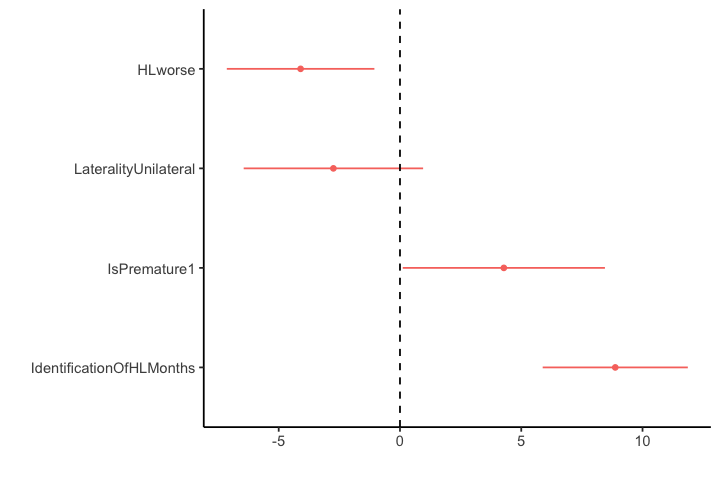

In [10]:
services_aic <- lm(formula = AgeStartedServices ~ HLworse + Laterality + HealthIssues, data = full_elssp)

services_aic_2 <- lm(formula = AgeStartedServices ~ HLworse + Laterality + IsPremature + 
    IdentificationOfHLMonths, data = (data = full_elssp %>% filter(HLworse != 
    "NA")))
summary(services_aic)
summary(services_aic_2)
dw_services = dwplot(services_aic_2)
dw_services = dw_services + geom_vline(xintercept=0, linetype = 'dashed') + theme_classic(
)+ theme(legend.position="none")
options(repr.plot.width=6, repr.plot.height=4)
print(dw_services)

In [174]:
meets136_full <- glm(Meets136 ~ HealthIssues + DevelopmentalConcerns + Monolingual_English, data=full_elssp, family=binomial)
summary(meets136_full)


Call:
glm(formula = Meets136 ~ HealthIssues + DevelopmentalConcerns + 
    Monolingual_English, family = binomial, data = full_elssp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6825   0.1706   0.2356   0.3053   0.6906  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)   
(Intercept)                3.0427     1.1736   2.593  0.00952 **
HealthIssues1              1.1801     1.8026   0.655  0.51266   
DevelopmentalConcernsyes  -1.7307     1.8388  -0.941  0.34660   
Monolingual_Englishyes     0.5273     1.3145   0.401  0.68829   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 26.700  on 95  degrees of freedom
Residual deviance: 25.424  on 92  degrees of freedom
  (2 observations deleted due to missingness)
AIC: 33.424

Number of Fisher Scoring iterations: 7


In [1]:
corr_data <- full_elssp %>% dplyr::select("SubjectNumber", "DevelopmentalConcerns", "IsPremature", "HealthIssues", "Gender", "HLworse", 
                          "Laterality", "ServicesReceivedPerMonth", "Amplification", "Communication", 
                          "Meets136", "Etiology")

corr_data <- corr_data$DevelopmentalConcerns %>% as.numeric(corr_data$DevelopmentalConcerns)

summary(corr_data)
cor(corr_data)

ERROR: Error in full_elssp %>% dplyr::select("SubjectNumber", "DevelopmentalConcerns", : could not find function "%>%"


In [95]:
event <- c('Diagnosis','Intervention','Amplification', 'Implantation')
eventmin <- c(min(full_elssp$IdentificationOfHLMonths, na.rm = TRUE), min(full_elssp$AgeStartedServices, na.rm = TRUE), 
              min(full_elssp$AgeAmplification, na.rm = TRUE), min(full_elssp$AgeImplantation, na.rm = TRUE))
eventmax <- c(max(full_elssp$IdentificationOfHLMonths, na.rm = TRUE), max(full_elssp$AgeStartedServices, na.rm = TRUE), 
              max(full_elssp$AgeAmplification, na.rm = TRUE), max(full_elssp$AgeImplantation, na.rm = TRUE))
eventmean <- c(mean(full_elssp$IdentificationOfHLMonths, na.rm = TRUE), mean(full_elssp$AgeStartedServices, na.rm = TRUE), 
              mean(full_elssp$AgeAmplification, na.rm = TRUE), mean(full_elssp$AgeImplantation, na.rm = TRUE))
eventsd <- c(sd(full_elssp$IdentificationOfHLMonths, na.rm = TRUE), sd(full_elssp$AgeStartedServices, na.rm = TRUE), 
              sd(full_elssp$AgeAmplification, na.rm = TRUE), sd(full_elssp$AgeImplantation, na.rm = TRUE))
event.data <- data.frame(event, eventmin, eventmax, eventmean, eventsd)

summary(event.data)

           event      eventmin       eventmax       eventmean     
 Amplification:1   Min.   :0.00   Min.   :30.00   Min.   : 4.105  
 Diagnosis    :1   1st Qu.:0.75   1st Qu.:30.75   1st Qu.: 8.189  
 Implantation :1   Median :1.50   Median :31.50   Median :10.434  
 Intervention :1   Mean   :2.50   Mean   :31.50   Mean   : 9.773  
                   3rd Qu.:3.25   3rd Qu.:32.25   3rd Qu.:12.018  
                   Max.   :7.00   Max.   :33.00   Max.   :14.118  
    eventsd     
 Min.   :7.024  
 1st Qu.:7.144  
 Median :7.261  
 Mean   :7.574  
 3rd Qu.:7.691  
 Max.   :8.749  

Warning message:
“Ignoring unknown parameters: width”

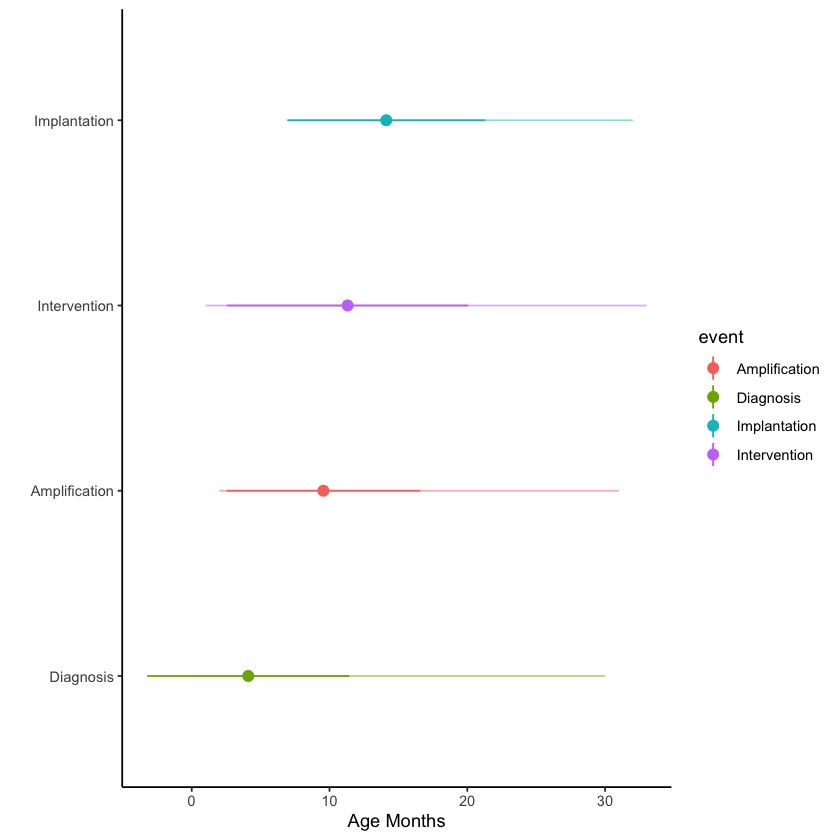

In [96]:
eventplot <- ggplot(data = event.data, 
       mapping = aes(x = reorder(event, eventmean), 
                     y = eventmean, color=event)) + 
  geom_pointrange(mapping = aes(ymin = eventmean - eventsd,
                                ymax = eventmean + eventsd)) +
  geom_pointrange(mapping = aes(ymin = eventmin,
                                ymax = eventmax), width=2, alpha=0.5) +
  labs(x= "", y= "Age Months") + 
  coord_flip() +
  theme(legend.position = "none") +
  theme_classic()

print(eventplot)

# Deprecated: Regression for Severity of Delay

This model is retained for reference, but should be considered deprecated, in that it doesn't reflect that a 2-month delay is worse at 8 months than 36 months. This reflected in the fact that the intercept and Age at Evaluation are the only sig. predictors: the model is picking up the trivial fact that delays increase as kids get older.

In [20]:
names(elssp_datasets[[2]]$elssp_df)

[1] "VIHI_ID"                     "SubjectNumber"              
 [3] "VisitNumber"                 "VisitTotal"                 
 [5] "OldEnough"                   "InSample"                   
 [7] "Age"                         "HearingAge"                 
 [9] "Gender"                      "Meets136"                   
[11] "meets13"                     "meets6"                     
[13] "IdentificationOfHLMonths"    "Etiology"                   
[15] "HLbetter"                    "HLworse"                    
[17] "Hlaverage"                   "Laterality"                 
[19] "Side"                        "ANSD"                       
[21] "AgeAmplification"            "AgeImplantation"            
[23] "Amplification"               "AgeStartedServices"         
[25] "ServicesReceivedPerMonth"    "Communication"              
[27] "IsPremature"                 "HealthIssues"               
[29] "DevelopmentalConcerns"       "VisionLoss"                 
[31] "LabEligible"                 "CDIversion"                 
[33] "ProductionCDI"               "ComprehensionCDI"           
[35] "Monolingual_English"         "Attendance"                 
[37] "AgeAtEvaluationMonths"       "subject_id"                 
[39] "admin_id"                    "expected_score_at_chron_age"
[41] "expected_age_for_score"      "diff_score_from_expected"   
[43] "diff_age_from_expected"

In [21]:
head(elssp_datasets[[1]]$elssp_df)$diff_age_from_expected

[1]  9.987493 16.088776 23.394872 16.270868 13.363733 18.008474

In [22]:
summary(lm(diff_age_from_expected ~ AgeAtEvaluationMonths * (
    DevelopmentalConcerns + Gender + IsPremature + 
   HealthIssues + Meets136), subset(elssp_datasets[[1]]$elssp_df,  
    !is.infinite(diff_age_from_expected) 
    & Meets136 %in% c('yes','no'))))


Call:
lm(formula = diff_age_from_expected ~ AgeAtEvaluationMonths * 
    (DevelopmentalConcerns + Gender + IsPremature + HealthIssues + 
        Meets136), data = subset(elssp_datasets[[1]]$elssp_df, 
    !is.infinite(diff_age_from_expected) & Meets136 %in% c("yes", 
        "no")))

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9089 -1.7047 -0.0391  2.2601  5.1876 

Coefficients:
                                            Estimate Std. Error t value
(Intercept)                                 -7.10886    2.21460  -3.210
AgeAtEvaluationMonths                        0.68190    0.09555   7.137
DevelopmentalConcerns                        0.64732    4.31692   0.150
Gendermale                                  -0.23121    2.40569  -0.096
IsPremature                                  5.25285    4.74935   1.106
HealthIssues                                -0.17871    2.85725  -0.063
Meets136yes                                  2.21982    3.64653   0.609
AgeAtEvaluationMonths:Developm

# Binomial Model - Predict # of Yes/No Production Observations

In [23]:
table(elssp_datasets[[1]]$elssp_df$InSample)


 no yes 
 17  67 

In [24]:
table(elssp_datasets[[2]]$elssp_df$InSample)


 no yes 
 19  41 

In [25]:
elssp_datasets[[1]]$elssp_df$ProductionCDI_no = 398 - elssp_datasets[[1]]$elssp_df$ProductionCDI 
wg_model <- stats::glm(cbind(ProductionCDI, ProductionCDI_no) ~ AgeAtEvaluationMonths * 
    (Gender + DevelopmentalConcerns + IsPremature + Amplification + Monolingual_English + 
     Hlaverage + Communication + HealthIssues + Meets136), subset(elssp_datasets[[1]]$elssp_df,
        Meets136 %in% c("yes","no") &
        Monolingual_English %in% c("yes",'no') &
        Communication %in% c('spoken','total communication') &
        InSample == 'yes'
    ), family = "binomial")
summary(wg_model)


Call:
stats::glm(formula = cbind(ProductionCDI, ProductionCDI_no) ~ 
    AgeAtEvaluationMonths * (Gender + DevelopmentalConcerns + 
        IsPremature + Amplification + Monolingual_English + Hlaverage + 
        Communication + HealthIssues + Meets136), family = "binomial", 
    data = subset(elssp_datasets[[1]]$elssp_df, Meets136 %in% 
        c("yes", "no") & Monolingual_English %in% c("yes", "no") & 
        Communication %in% c("spoken", "total communication") & 
        InSample == "yes"))

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-7.909  -3.216  -1.256   2.359  10.646  

Coefficients:
                                                         Estimate Std. Error
(Intercept)                                            -3.266e+00  1.113e+00
AgeAtEvaluationMonths                                   1.741e-01  3.632e-02
Gendermale                                              9.038e-01  2.743e-01
DevelopmentalConcerns                                  -3.018e+00  6.22

In [26]:
elssp_datasets[[1]]$elssp_df$ProductionCDI_no = 398 - elssp_datasets[[1]]$elssp_df$ProductionCDI 
wg_model2 <- stats::glm(cbind(ProductionCDI, ProductionCDI_no) ~ AgeAtEvaluationMonths * 
    (Gender + DevelopmentalConcerns + Laterality + 
     HLworse + Meets136), subset(elssp_datasets[[1]]$elssp_df,
        Meets136 %in% c("yes","no") &
        InSample == 'yes'
    ), family = "binomial")
summary(wg_model2)


Call:
stats::glm(formula = cbind(ProductionCDI, ProductionCDI_no) ~ 
    AgeAtEvaluationMonths * (Gender + DevelopmentalConcerns + 
        Laterality + HLworse + Meets136), family = "binomial", 
    data = subset(elssp_datasets[[1]]$elssp_df, Meets136 %in% 
        c("yes", "no") & InSample == "yes"))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-12.2403   -3.5119   -0.8341    2.1981   12.5744  

Coefficients:
                                              Estimate Std. Error z value
(Intercept)                                 -5.041e+00  3.258e-01 -15.472
AgeAtEvaluationMonths                        1.461e-01  1.218e-02  11.990
Gendermale                                  -3.644e-02  1.981e-01  -0.184
DevelopmentalConcerns                       -4.181e+00  5.556e-01  -7.525
LateralityUnilateral                        -3.067e-01  2.779e-01  -1.103
HLworse                                     -1.272e-02  4.921e-03  -2.584
Meets136yes                           

In [27]:
elssp_datasets[[2]]$elssp_df$ProductionCDI_no = 680 - elssp_datasets[[2]]$elssp_df$ProductionCDI 
ws_model <- stats::glm(cbind(ProductionCDI, ProductionCDI_no) ~ AgeAtEvaluationMonths * 
    (Gender + DevelopmentalConcerns +   
     HLworse + Meets136 + Laterality), subset(elssp_datasets[[2]]$elssp_df,
        Meets136 %in% c("yes","no") &
        InSample == 'yes'
    ), family = "binomial")
summary(ws_model)


Call:
stats::glm(formula = cbind(ProductionCDI, ProductionCDI_no) ~ 
    AgeAtEvaluationMonths * (Gender + DevelopmentalConcerns + 
        HLworse + Meets136 + Laterality), family = "binomial", 
    data = subset(elssp_datasets[[2]]$elssp_df, Meets136 %in% 
        c("yes", "no") & InSample == "yes"))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-17.7498   -6.1408   -0.6443    4.2486   15.4163  

Coefficients:
                                              Estimate Std. Error z value
(Intercept)                                 -1.309e+01  3.657e-01 -35.796
AgeAtEvaluationMonths                        4.563e-01  1.270e-02  35.938
Gendermale                                   4.086e+00  2.401e-01  17.015
DevelopmentalConcerns                        4.990e+00  6.385e-01   7.816
HLworse                                      1.016e-01  6.267e-03  16.217
Meets136yes                                  1.409e+00  3.290e-01   4.284
LateralityUnilateral                  

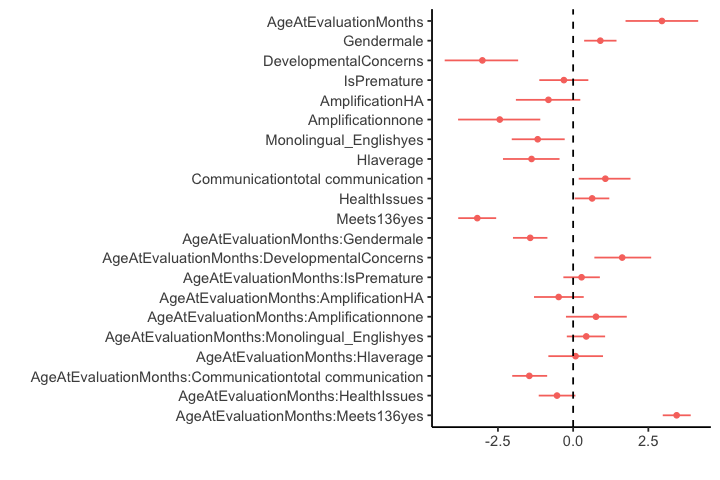

In [28]:
p1 = dwplot(wg_model)
p1 = p1 + geom_vline(xintercept=0, linetype = 'dashed') + theme_classic(
)+ theme(legend.position="none")
options(repr.plot.width=6, repr.plot.height=4)
print(p1)

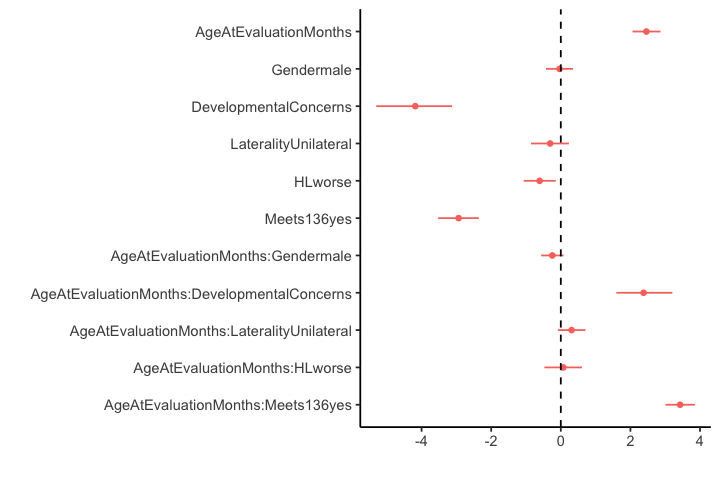

In [29]:
p3 = dwplot(wg_model2)
p3 = p3 + geom_vline(xintercept=0, linetype = 'dashed') + theme_classic(
)+ theme(legend.position="none")
options(repr.plot.width=6, repr.plot.height=4)
print(p3)

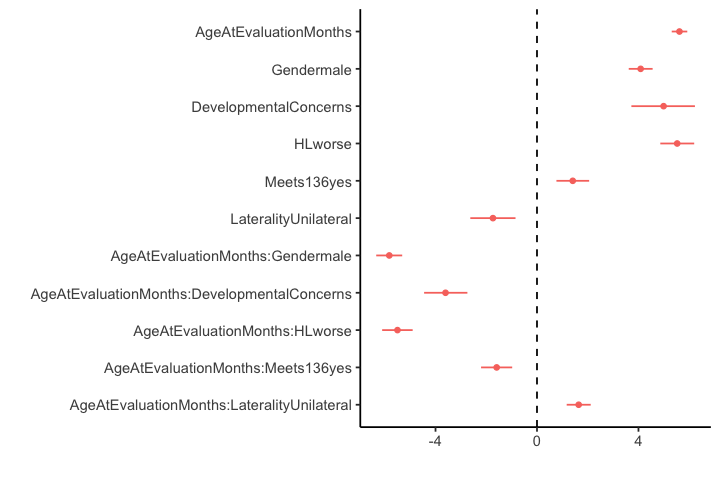

In [30]:
p2 = dwplot(ws_model)
p2 = p2 + geom_vline(xintercept=0, linetype = 'dashed') + theme_classic(
)+ theme(legend.position="none")
options(repr.plot.width=6, repr.plot.height=4)
print(p2)

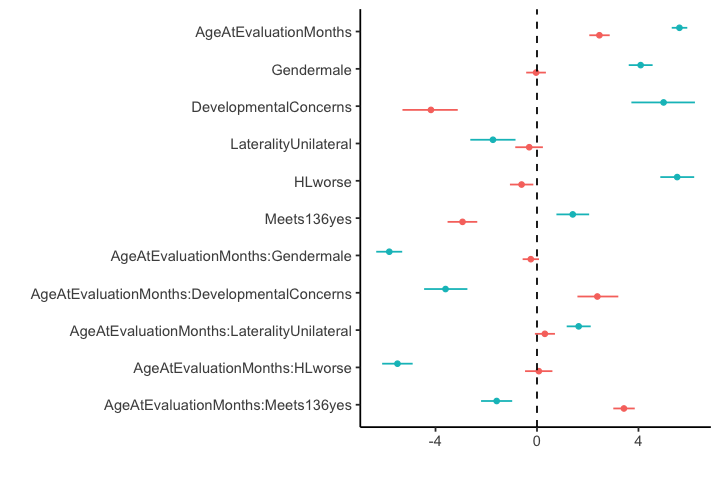

In [31]:
p4 = dwplot(list(wg_model2, ws_model))
p4 = p4 + geom_vline(xintercept=0, linetype = 'dashed') + theme_classic(
)+ theme(legend.position="none")
options(repr.plot.width=6, repr.plot.height=4)
print(p4)

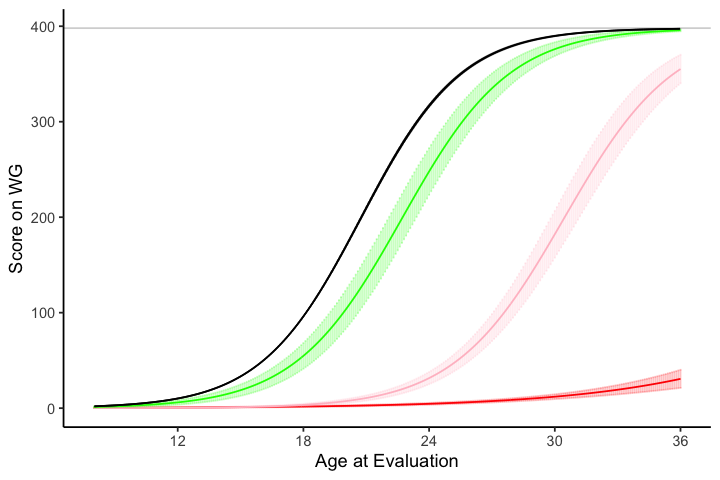

In [37]:
wg_worst = predictFromModel(wg_model, worst_characteristics, 398)
wg_worst_meets136 = predictFromModel(wg_model, worst_meets136, 398)
wg_best = predictFromModel(wg_model, best_characteristics, 398)

seq_and_labels = seq(from=0,to=48,by=6)
options(repr.plot.width=6, repr.plot.height=4)
ggplot(wg_worst) + geom_line(aes(x=AgeAtEvaluationMonths, y=score), color='red'
)+ geom_errorbar(aes(x=AgeAtEvaluationMonths, ymin=se_low,
ymax = se_high), alpha =.25, color='red') + geom_line(data= wg_worst_meets136,
aes(x=AgeAtEvaluationMonths, y=score), color='pink'
) + geom_errorbar(data= wg_worst_meets136, aes(x=AgeAtEvaluationMonths, ymin=se_low,
ymax = se_high), alpha =.25, color='pink') + geom_line(data= wg_best, 
aes(x=AgeAtEvaluationMonths, y=score), color='green'
) + geom_errorbar(data= wg_best, aes(x=AgeAtEvaluationMonths, ymin=se_low,
ymax = se_high), alpha =.25, color='green') + geom_line(data= subset(
elssp_datasets[[1]]$samples_from_growth_curve_model, predict_ages < 36 & predict_ages > 8),
aes(x=predict_ages, y=scores), color='black') + geom_errorbar(data= subset(
elssp_datasets[[1]]$samples_from_growth_curve_model, predict_ages < 36 & predict_ages > 8),
aes(x=predict_ages, ymin=se_low,
ymax = se_high), alpha =.75, color='black') + theme_classic() + ylab('Score on WG') + xlab('Age at Evaluation') + scale_x_continuous(
breaks = seq_and_labels, labels = seq_and_labels) + geom_hline(yintercept=398, color='black',
    alpha=.2)


In [32]:
# not clear why the intercept-only model treateats the ageInEvaluationInMonths * gender 
# interaction differently

In [41]:
worst_no136 = list()
worst_no136[['Gender']] = 'male'
worst_no136[['DevelopmentalConcerns']] = 1
worst_no136[['HLworse']] = max(elssp_datasets[[1]]$elssp_df$HLworse, na.rm=T)
worst_no136[['Laterality']] = 'Bilateral'
worst_no136[['Meets136']] = 'no'

worst_meets136 = list()
worst_meets136[['Gender']] = 'male'
worst_meets136[['DevelopmentalConcerns']] = 1
worst_meets136[['HLworse']] = max(elssp_datasets[[1]]$elssp_df$HLworse, na.rm=T)
worst_meets136[['Laterality']] = 'Bilateral'
worst_meets136[['Meets136']] = 'no'

best_no136 = list()
best_no136[['Gender']] = 'female'
best_no136[['DevelopmentalConcerns']] = 0
best_no136[['HLworse']] = min(elssp_datasets[[1]]$elssp_df$HLworse, na.rm=T)
best_no136[['Laterality']] = 'Unilateral'
best_no136[['Meets136']] = 'no'

best_meets136 = list()
best_meets136[['Gender']] = 'male'
best_meets136[['DevelopmentalConcerns']] = 1
best_meets136[['HLworse']] = min(elssp_datasets[[1]]$elssp_df$HLworse, na.rm=T)
best_meets136[['Laterality']] = 'Unilateral'
best_meets136[['Meets136']] = 'yes'


predictFromModel = function(model, participant_properties, num_items){
    # build a dataframe with predictions over the range of ages
    AgeAtEvaluationMonths = seq(from=8, to=36, by=.1)
    rdf = data.frame(AgeAtEvaluationMonths)
    for (property in names(participant_properties)){
        rdf[[property]] = participant_properties[[property]]
    }   
    
    predicted_probs = data.frame(predict(model, rdf, type='response', se.fit=T))
    predicted_probs$se_high = predicted_probs$fit + predicted_probs$se.fit
    predicted_probs$se_low = predicted_probs$fit - predicted_probs$se.fit
    rdf$score = predicted_probs$fit * num_items
    rdf$se_high = predicted_probs$se_high * num_items
    rdf$se_low = predicted_probs$se_low * num_items
    return(rdf)
}

In [34]:
worst_characteristics = list()
worst_characteristics[['Gender']] = 'male'
worst_characteristics[['DevelopmentalConcerns']] = 1
worst_characteristics[['IsPremature']] = 0
worst_characteristics[['Amplification']] = 'none'
worst_characteristics[['Monolingual_English']] = 'yes'
worst_characteristics[['Hlaverage']] = min(elssp_datasets[[1]]$elssp_df$Hlaverage, na.rm=T)
worst_characteristics[['Communication']] = 'total communication'
worst_characteristics[['HealthIssues']] = 0
worst_characteristics[['Meets136']] = 'no'

worst_meets136 = list()
worst_meets136[['Gender']] = 'male'
worst_meets136[['DevelopmentalConcerns']] = 1
worst_meets136[['IsPremature']] = 0
worst_meets136[['Amplification']] = 'none'
worst_meets136[['Monolingual_English']] = 'yes'
worst_meets136[['Hlaverage']] = min(elssp_datasets[[1]]$elssp_df$Hlaverage, na.rm=T)
worst_meets136[['Communication']] = 'total communication'
worst_meets136[['HealthIssues']] = 0
worst_meets136[['Meets136']] = 'yes'

best_characteristics = list()
best_characteristics[['Gender']] = 'female'
best_characteristics[['DevelopmentalConcerns']] = 0
best_characteristics[['IsPremature']] = 1
best_characteristics[['Amplification']] = 'CI'
best_characteristics[['Monolingual_English']] = 'no'
best_characteristics[['Hlaverage']] = max(elssp_datasets[[1]]$elssp_df$Hlaverage, na.rm=T)
best_characteristics[['Communication']] = 'spoken'
best_characteristics[['HealthIssues']] = 1
best_characteristics[['Meets136']] = 'yes'

predictFromModel = function(model, participant_properties, num_items){
    # build a dataframe with predictions over the range of ages
    AgeAtEvaluationMonths = seq(from=8, to=36, by=.1)
    rdf = data.frame(AgeAtEvaluationMonths)
    for (property in names(participant_properties)){
        rdf[[property]] = participant_properties[[property]]
    }   
    
    predicted_probs = data.frame(predict(model, rdf, type='response', se.fit=T))
    predicted_probs$se_high = predicted_probs$fit + predicted_probs$se.fit
    predicted_probs$se_low = predicted_probs$fit - predicted_probs$se.fit
    rdf$score = predicted_probs$fit * num_items
    rdf$se_high = predicted_probs$se_high * num_items
    rdf$se_low = predicted_probs$se_low * num_items
    return(rdf)
}

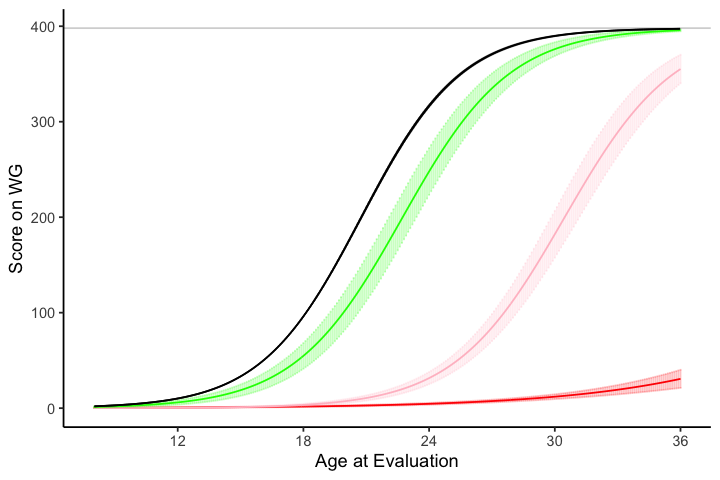

In [39]:
wg_worst = predictFromModel(wg_model, worst_characteristics, 398)
wg_worst_meets136 = predictFromModel(wg_model, worst_meets136, 398)
wg_best = predictFromModel(wg_model, best_characteristics, 398)

seq_and_labels = seq(from=0,to=48,by=6)
options(repr.plot.width=6, repr.plot.height=4)
ggplot(wg_worst) + geom_line(aes(x=AgeAtEvaluationMonths, y=score), color='red'
)+ geom_errorbar(aes(x=AgeAtEvaluationMonths, ymin=se_low,
ymax = se_high), alpha =.25, color='red') + geom_line(data= wg_worst_meets136,
aes(x=AgeAtEvaluationMonths, y=score), color='pink'
) + geom_errorbar(data= wg_worst_meets136, aes(x=AgeAtEvaluationMonths, ymin=se_low,
ymax = se_high), alpha =.25, color='pink') + geom_line(data= wg_best, 
aes(x=AgeAtEvaluationMonths, y=score), color='green'
) + geom_errorbar(data= wg_best, aes(x=AgeAtEvaluationMonths, ymin=se_low,
ymax = se_high), alpha =.25, color='green') + geom_line(data= subset(
elssp_datasets[[1]]$samples_from_growth_curve_model, predict_ages < 36 & predict_ages > 8),
aes(x=predict_ages, y=scores), color='black') + geom_errorbar(data= subset(
elssp_datasets[[1]]$samples_from_growth_curve_model, predict_ages < 36 & predict_ages > 8),
aes(x=predict_ages, ymin=se_low,
ymax = se_high), alpha =.75, color='black') + theme_classic() + ylab('Score on WG') + xlab('Age at Evaluation') + scale_x_continuous(
breaks = seq_and_labels, labels = seq_and_labels) + geom_hline(yintercept=398, color='black',
    alpha=.2)


Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Warning message:
“Removed 80 rows containing missing values (geom_path).”Warning message:
“Removed 80 rows containing missing values (geom_errorbar).”Warning message:
“Removed 80 rows containing missing values (geom_path).”Warning message:
“Removed 80 rows containing missing values (geom_errorbar).”Warning message:
“Removed 80 rows containing missing values (geom_path).”Warning message:
“Removed 80 rows containing missing values (geom_errorbar).”Warning message:
“Removed 80 rows containing missing values (geom_path).”Warning message:
“Removed 80 rows containing missing values (geom_errorbar).”

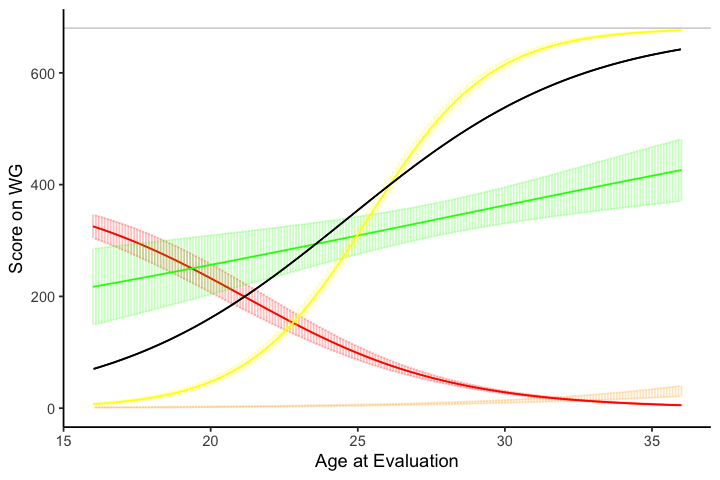

In [46]:
ws_worst_yes136 = predictFromModel(ws_model, worst_meets136, 398)
ws_worst_no136 = predictFromModel(ws_model, worst_no136, 398)
ws_best_yes136 = predictFromModel(ws_model, best_meets136, 680)
ws_best_no136 = predictFromModel(ws_model, best_no136, 680)

seq_and_labels = seq(from=0,to=48,by=6)
options(repr.plot.width=6, repr.plot.height=4)
ggplot(wg_worst) + 
geom_line(data=ws_worst_yes136, aes(x=AgeAtEvaluationMonths, y=score), color='orange'
)+ geom_errorbar(aes(x=AgeAtEvaluationMonths, ymin=se_low,
ymax = se_high), alpha =.25, color='orange') + 
geom_line(data= ws_worst_no136,
aes(x=AgeAtEvaluationMonths, y=score), color='red'
) + geom_errorbar(data= ws_worst_no136, aes(x=AgeAtEvaluationMonths, ymin=se_low,
ymax = se_high), alpha =.25, color='red') + 
geom_line(data= ws_best_yes136, 
aes(x=AgeAtEvaluationMonths, y=score), color='green'
) + geom_errorbar(data= ws_best_yes136, aes(x=AgeAtEvaluationMonths, ymin=se_low,
ymax = se_high), alpha =.25, color='green') + 
geom_line(data= ws_best_no136, 
aes(x=AgeAtEvaluationMonths, y=score), color='yellow'
) + geom_errorbar(data= ws_best_no136, aes(x=AgeAtEvaluationMonths, ymin=se_low,
ymax = se_high), alpha =.25, color='yellow') + 
geom_line(data= subset(
elssp_datasets[[2]]$samples_from_growth_curve_model, predict_ages < 36 & predict_ages > 16),
aes(x=predict_ages, y=scores), color='black') + geom_errorbar(data= subset(
elssp_datasets[[2]]$samples_from_growth_curve_model, predict_ages < 36 & predict_ages > 16),
aes(x=predict_ages, ymin=se_low,
ymax = se_high), alpha =.75, color='black') + theme_classic() + ylab('Score on WG') + xlab('Age at Evaluation') + 
scale_x_continuous(
breaks = seq_and_labels, labels = seq_and_labels) + geom_hline(yintercept=680, color='black',
    alpha=.2) +
xlim(16,36)


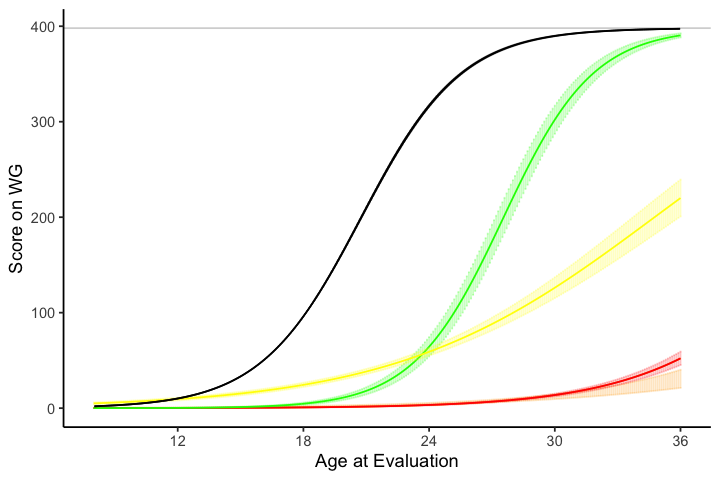

In [44]:
wg_worst_yes136 = predictFromModel(wg_model2, worst_meets136, 398)
wg_worst_no136 = predictFromModel(wg_model2, worst_no136, 398)
wg_best_yes136 = predictFromModel(wg_model2, best_meets136, 398)
wg_best_no136 = predictFromModel(wg_model2, best_no136, 398)

seq_and_labels = seq(from=0,to=48,by=6)
options(repr.plot.width=6, repr.plot.height=4)
ggplot(wg_worst) + 
geom_line(data=wg_worst_yes136, aes(x=AgeAtEvaluationMonths, y=score), color='orange'
)+ geom_errorbar(aes(x=AgeAtEvaluationMonths, ymin=se_low,
ymax = se_high), alpha =.25, color='orange') + 
geom_line(data= wg_worst_no136,
aes(x=AgeAtEvaluationMonths, y=score), color='red'
) + geom_errorbar(data= wg_worst_no136, aes(x=AgeAtEvaluationMonths, ymin=se_low,
ymax = se_high), alpha =.25, color='red') + 
geom_line(data= wg_best_yes136, 
aes(x=AgeAtEvaluationMonths, y=score), color='green'
) + geom_errorbar(data= wg_best_yes136, aes(x=AgeAtEvaluationMonths, ymin=se_low,
ymax = se_high), alpha =.25, color='green') + 
geom_line(data= wg_best_no136, 
aes(x=AgeAtEvaluationMonths, y=score), color='yellow'
) + geom_errorbar(data= wg_best_no136, aes(x=AgeAtEvaluationMonths, ymin=se_low,
ymax = se_high), alpha =.25, color='yellow') + 
geom_line(data= subset(
elssp_datasets[[1]]$samples_from_growth_curve_model, predict_ages < 36 & predict_ages > 8),
aes(x=predict_ages, y=scores), color='black') + geom_errorbar(data= subset(
elssp_datasets[[1]]$samples_from_growth_curve_model, predict_ages < 36 & predict_ages > 8),
aes(x=predict_ages, ymin=se_low,
ymax = se_high), alpha =.75, color='black') + theme_classic() + ylab('Score on WG') + xlab('Age at Evaluation') + scale_x_continuous(
breaks = seq_and_labels, labels = seq_and_labels) + geom_hline(yintercept=398, color='black',
    alpha=.2)


In [43]:
elssp_datasets[[2]]$elssp_df$ProductionCDI_no = 680 - elssp_datasets[[2]]$elssp_df$ProductionCDI 
model <- stats::glm(cbind(ProductionCDI, ProductionCDI_no) ~ AgeAtEvaluationMonths * 
    (Gender + DevelopmentalConcerns + Laterality +  
     HLworse + Meets136), subset(elssp_datasets[[2]]$elssp_df, 
        Meets136 %in% c("yes","no") &
        Gender %in% c('male', 'female') &
        InSample == 'yes'
    ),
    family = "binomial")
summary(model)


Call:
stats::glm(formula = cbind(ProductionCDI, ProductionCDI_no) ~ 
    AgeAtEvaluationMonths * (Gender + DevelopmentalConcerns + 
        Laterality + HLworse + Meets136), family = "binomial", 
    data = subset(elssp_datasets[[2]]$elssp_df, Meets136 %in% 
        c("yes", "no") & Gender %in% c("male", "female") & InSample == 
        "yes"))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-17.7498   -6.1408   -0.6443    4.2486   15.4163  

Coefficients:
                                              Estimate Std. Error z value
(Intercept)                                 -1.309e+01  3.657e-01 -35.796
AgeAtEvaluationMonths                        4.563e-01  1.270e-02  35.938
Gendermale                                   4.086e+00  2.401e-01  17.015
DevelopmentalConcerns                        4.990e+00  6.385e-01   7.816
LateralityUnilateral                        -1.736e+00  4.546e-01  -3.820
HLworse                                      1.016e-01  6.267e-03  16

In [ ]:
# Remember that a predicted score for an age can be always be translated 
# to a delay in months wrt normative scores!

In [2]:
wg_elssp_df <- droplevels(elssp_datasets[[1]] %>% dplyr::filter (Gender=="male" | Gender=="female", 
                                                          DevelopmentalConcerns==1 | DevelopmentalConcerns==0,
                                                         Laterality=="Unilateral" | Laterality == "Bilateral",
                                                         InSample=="yes",
                                                         Meets136=="yes" | Meets136=="no"))

ERROR: Error in elssp_datasets[[1]] %>% dplyr::filter(Gender == "male" | Gender == : could not find function "%>%"


In [7]:
wg_elssp <- elssp %>% dplyr::filter(CDIversion=="WG")
ws_elssp <- elssp %>% dplyr::filter(CDIversion=="WS")

# Longitudinal Plots

In [ ]:
source('CDI_ELSSP.R')
longitudinal_plot_elssp_df(elssp_datasets[[1]])

In [ ]:
longitudinal_plot_elssp_df(elssp_datasets[[2]])

In [ ]:
names(elssp_datasets[[2]][['elssp_df']])

In [ ]:
source('CDI_ELSSP.R')
longitudinal_plot_elssp_df(elssp_datasets[[1]],'Gender')

In [ ]:
source('CDI_ELSSP.R')
longitudinal_plot_elssp_df(elssp_datasets[[2]],'Gender')

In [ ]:
source('CDI_ELSSP.R')
longitudinal_plot_elssp_df(elssp_datasets[[1]],'Laterality')

In [ ]:
source('CDI_ELSSP.R')
longitudinal_plot_elssp_df(elssp_datasets[[2]],'Laterality')

In [ ]:
source('CDI_ELSSP.R')
longitudinal_plot_elssp_df(elssp_datasets[[1]],'Meets136')

In [ ]:
source('CDI_ELSSP.R')
longitudinal_plot_elssp_df(elssp_datasets[[2]],'Meets136')

In [ ]:
length(filter_to_longitudinal_admins(rbind.fill(elssp_datasets[[1]][['elssp_df']], 
elssp_datasets[[2]][['elssp_df']]))$subject_id)

In [ ]:
length(filter_to_longitudinal_admins( 
elssp_datasets[[1]][['elssp_df']])$subject_id)

In [ ]:
length(filter_to_longitudinal_admins( 
elssp_datasets[[2]][['elssp_df']])$subject_id)

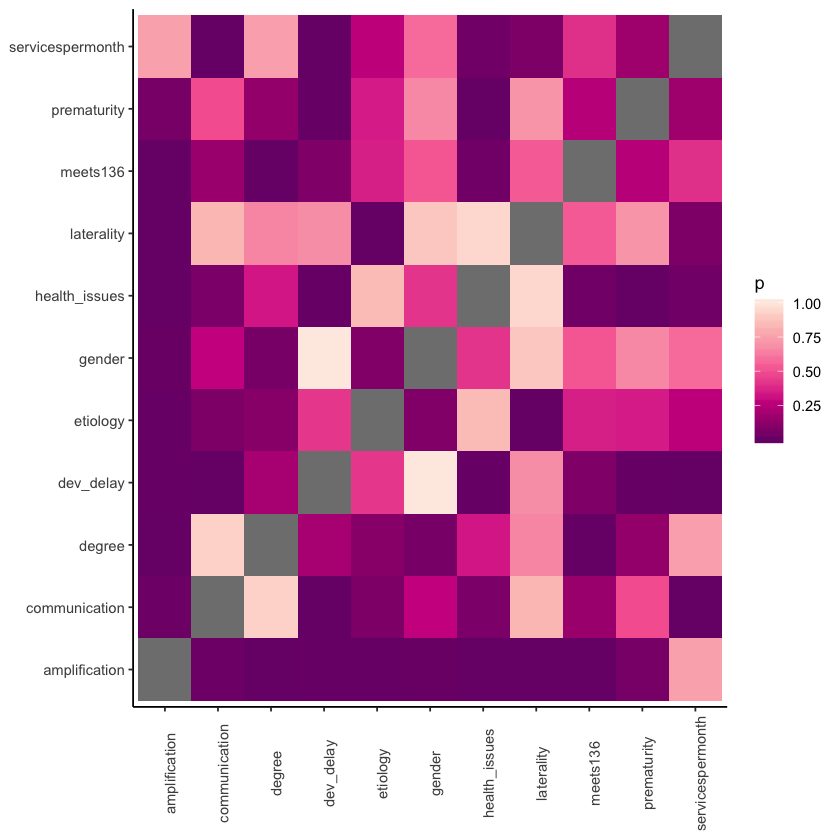

In [78]:
library(plotly)
hm_test <- read.csv("data/heat_map_test.csv")
plot <- ggplot(hm_test, aes(x=var1, y=var2)) +
geom_tile(aes(fill = p)) + theme_classic() +
theme(axis.text.x = element_text(angle = 90)) +
scale_fill_distiller(palette = "RdPu") +
xlab(NULL) + ylab(NULL) 

plot

#scale_fill_viridis_c(option = "D", direction = -1)

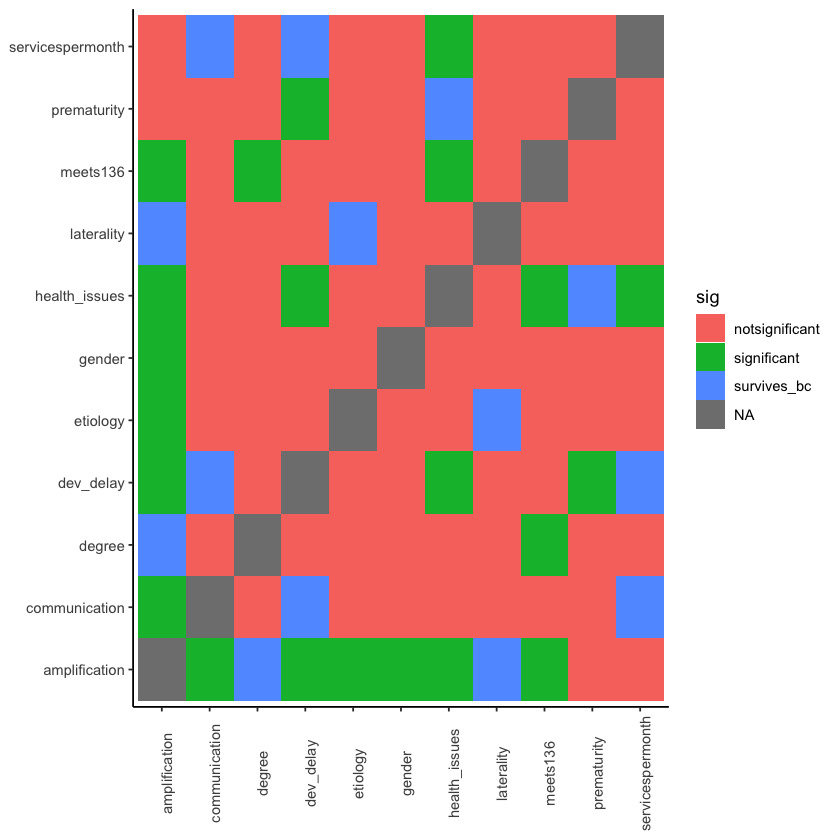

In [76]:
library(plotly)
hm_test <- read.csv("data/heat_map_test.csv")
plot <- ggplot(hm_test, aes(x=var1, y=var2)) +
geom_tile(aes(fill = sig)) + theme_classic() +
theme(axis.text.x = element_text(angle = 90)) +
xlab(NULL) + ylab(NULL) 

plot

ERROR while rich displaying an object: Error: Continuous value supplied to discrete scale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(cap

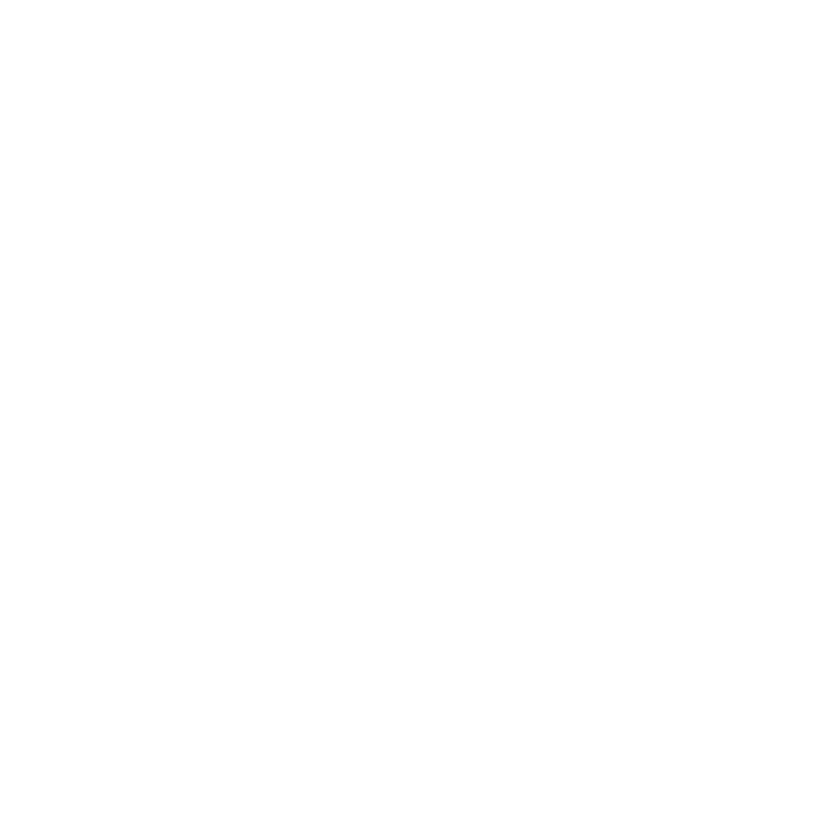

In [81]:
library(plotly)
hm_test <- read.csv("data/heat_map_test.csv")
plot <- ggplot(hm_test, aes(x=var1, y=var2)) +
geom_tile(aes(fill = p)) + theme_classic() +
theme(axis.text.x = element_text(angle = 90)) +
xlab(NULL) + ylab(NULL) +
scale_fill_manual(breaks = c("0.05", "0.001"), 
                       values=c("red", "blue"))

plot

# Next Step

[X] fix the path for WS  
[X] figure out what is going on with kids with production > comprehension -- Erin   investigated -- some transcription errors; some from the original where gesture is included in the production score  
[X] Relatoinship to gestures: gestures are not included, but credit is given for signs for both production and comprehension; same is true for Spanish    
[O] make a single plot for both instruments with faceting -- can do other things instead     
[X] make plots for the differeneces and consider statistical tests wrt demographic vars  
[X] redo these with rainplots  
[X] fix the inf issues -- these are for 0-scores on WS  
[X] fixed effects model  
[ ] mixed effects model -- repeated sampling within kids  
[ ] plot kids with repeated measures on percentile graph